In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sns.set_palette("YlOrBr")
# sns.set_palette("ch:s=-.2,r=.6")
# sns.set_palette(sns.dark_palette("#69d", reverse=True, as_cmap=True))

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_excel('./coal-world-consumption-data.xlsx')
df

Unnamed: 0  \
0                                                                                                                                      NaN   
1                                                                                                                         www.enerdata.net   
2                                                                                                                                    World   
3                                                                                                                                     OECD   
4                                                                                                                                       G7   
5                                                                                                                                    BRICS   
6                                                                                                                                   Europe   
7                                                                                                                           European Union   
8                                                                                                                                  Belgium   
9                                                                                                                                  Czechia   
10                                                                                                                                  France   
11                                                                                                                                 Germany   
12                                                                                                                                   Italy   
13                                                                                                                             Netherlands   
14                                                                                                                                  Poland   
15                                                                                                                                Portugal   
16                                                                                                                                 Romania   
17                                                                                                                                   Spain   
18                                                                                                                                  Sweden   
19                                                                                                                          United Kingdom   
20                                                                                                                                  Norway   
21                                                                                                                                  Turkey   
22                                                                                                                                     CIS   
23                                                                                                                              Kazakhstan   
24                                                                                                                                  Russia   
25                                                                                                                                 Ukraine   
26                                                                                                                              Uzbekistan   
27                                                                                                                                 America   
28        

In [5]:
df.drop([0], inplace = True)
df

Unnamed: 0  \
1                                                                                                                         www.enerdata.net   
2                                                                                                                                    World   
3                                                                                                                                     OECD   
4                                                                                                                                       G7   
5                                                                                                                                    BRICS   
6                                                                                                                                   Europe   
7                                                                                                                           European Union   
8                                                                                                                                  Belgium   
9                                                                                                                                  Czechia   
10                                                                                                                                  France   
11                                                                                                                                 Germany   
12                                                                                                                                   Italy   
13                                                                                                                             Netherlands   
14                                                                                                                                  Poland   
15                                                                                                                                Portugal   
16                                                                                                                                 Romania   
17                                                                                                                                   Spain   
18                                                                                                                                  Sweden   
19                                                                                                                          United Kingdom   
20                                                                                                                                  Norway   
21                                                                                                                                  Turkey   
22                                                                                                                                     CIS   
23                                                                                                                              Kazakhstan   
24                                                                                                                                  Russia   
25                                                                                                                                 Ukraine   
26                                                                                                                              Uzbekistan   
27                                                                                                                                 America   
28                                                                                                                           North America   
29        

In [6]:
header_row = 0
df.columns = df.iloc[header_row]
df = df.reset_index(drop=True)
df = df.drop(header_row)
df

1                                                                                                                         www.enerdata.net  \
1                                                                                                                                    World   
2                                                                                                                                     OECD   
3                                                                                                                                       G7   
4                                                                                                                                    BRICS   
5                                                                                                                                   Europe   
6                                                                                                                           European Union   
7                                                                                                                                  Belgium   
8                                                                                                                                  Czechia   
9                                                                                                                                   France   
10                                                                                                                                 Germany   
11                                                                                                                                   Italy   
12                                                                                                                             Netherlands   
13                                                                                                                                  Poland   
14                                                                                                                                Portugal   
15                                                                                                                                 Romania   
16                                                                                                                                   Spain   
17                                                                                                                                  Sweden   
18                                                                                                                          United Kingdom   
19                                                                                                                                  Norway   
20                                                                                                                                  Turkey   
21                                                                                                                                     CIS   
22                                                                                                                              Kazakhstan   
23                                                                                                                                  Russia   
24                                                                                                                                 Ukraine   
25                                                                                                                              Uzbekistan   
26                                                                                                                                 America   
27                                                                                                                           North America   
28                      

In [7]:
df.drop([58, 59, 60, 61, 62], inplace = True)
df

1       www.enerdata.net       1990.0       1991.0       1992.0       1993.0  \
1                  World  4665.270216  4583.369359  4531.347710  4511.045899   
2                   OECD  2334.307792  2248.659876  2182.300053  2157.945177   
3                     G7  1599.553542  1518.817582  1476.398159  1463.367441   
4                  BRICS  1760.786720  1801.582347  1829.946257  1859.980934   
5                 Europe  1351.414316  1242.582467  1164.802339  1104.401298   
6         European Union  1113.682316  1011.699499   942.205041   903.644822   
7                Belgium    16.620146    16.023028    14.235690    13.513577   
8                Czechia    84.788000    79.201000    73.631000    71.871000   
9                 France    31.208986    33.504171    29.658704    23.271134   
10               Germany   448.766260   368.315450   327.824000   305.929502   
11                 Italy    22.485274    21.174694    18.479219    16.098610   
12           Netherlands    12.528968    11.453563    11.435032    11.485031   
13                Poland   183.638681   183.185591   174.243867   175.808665   
14              Portugal     4.399000     4.619000     4.713000     4.982000   
15               Romania    46.953000    39.661000    43.853530    44.965304   
16                 Spain    47.563000    47.720000    47.222000    44.527000   
17                Sweden     4.878000     4.906000     4.577000     4.654000   
18        United Kingdom   106.681000   106.091968   100.057298    87.341476   
19                Norway     1.277000     1.156000     1.159000     1.239000   
20                Turkey    54.451000    57.877000    59.828000    54.862000   
21                   CIS   658.672000   616.165000   580.928000   506.880000   
22            Kazakhstan    90.361000    89.870000    90.809000    83.019000   
23                Russia   388.194000   365.580000   341.700000   291.703000   
24               Ukraine   149.853000   132.574000   129.105000   116.648000   
25            Uzbekistan     8.940000     9.290000     6.712000     5.193000   
26               America   902.823345   902.535368   912.977108   943.235776   
27         North America   868.657000   867.350000   878.877000   906.511000   
28                Canada    49.373000    51.486000    53.182000    50.198000   
29         United States   819.284000   815.864000   825.695000   856.313000   
30         Latin America    34.166345    35.185368    34.100108    36.724776   
31             Argentina     1.304016     1.039820     0.873526     1.046000   
32                Brazil    15.374000    17.757000    17.023000    17.216000   
33                 Chile     3.741330     2.976548     2.649448     2.672776   
34              Colombia     5.055000     5.210000     5.315000     5.922000   
35                Mexico     7.496000     7.402000     7.349135     8.910000   
36             Venezuela     0.646000     0.000000     0.005000     0.039000   
37                  Asia  1504.992512  1572.161419  1620.919016  1701.818028   
38                 China  1004.808980  1050.176724  1090.394176  1152.136287   
39                 India   218.234740   236.717623   251.135081   265.246647   
40             Indonesia     7.320000     8.101000     8.329000     8.297000   
41                 Japan   121.755022   122.381298   121.501939   124.215719   
42              Malaysia     2.104000     2.478000     2.602000     2.175000   
43           South Korea    44.776000    43.257000    40.144000    42.068000   
44                Taiwan    17.364769    19.035774    21.924820    23.904375   
45              Thailand    12.780000    15.063000    16.079000    16.822000   
46               Pacific    96.446124   100.270563   103.272722   101.400688   
47             Australia    94.100000    97.972000   100.720000    98.927000   
48           New Zealand     2.322124     2.280563     2.532722     2.453688   
49                Africa   145.837919   143.744542   141.803525   145.490110   


In [8]:
df.reset_index(drop=True)

1       www.enerdata.net       1990.0       1991.0       1992.0       1993.0  \
0                  World  4665.270216  4583.369359  4531.347710  4511.045899   
1                   OECD  2334.307792  2248.659876  2182.300053  2157.945177   
2                     G7  1599.553542  1518.817582  1476.398159  1463.367441   
3                  BRICS  1760.786720  1801.582347  1829.946257  1859.980934   
4                 Europe  1351.414316  1242.582467  1164.802339  1104.401298   
5         European Union  1113.682316  1011.699499   942.205041   903.644822   
6                Belgium    16.620146    16.023028    14.235690    13.513577   
7                Czechia    84.788000    79.201000    73.631000    71.871000   
8                 France    31.208986    33.504171    29.658704    23.271134   
9                Germany   448.766260   368.315450   327.824000   305.929502   
10                 Italy    22.485274    21.174694    18.479219    16.098610   
11           Netherlands    12.528968    11.453563    11.435032    11.485031   
12                Poland   183.638681   183.185591   174.243867   175.808665   
13              Portugal     4.399000     4.619000     4.713000     4.982000   
14               Romania    46.953000    39.661000    43.853530    44.965304   
15                 Spain    47.563000    47.720000    47.222000    44.527000   
16                Sweden     4.878000     4.906000     4.577000     4.654000   
17        United Kingdom   106.681000   106.091968   100.057298    87.341476   
18                Norway     1.277000     1.156000     1.159000     1.239000   
19                Turkey    54.451000    57.877000    59.828000    54.862000   
20                   CIS   658.672000   616.165000   580.928000   506.880000   
21            Kazakhstan    90.361000    89.870000    90.809000    83.019000   
22                Russia   388.194000   365.580000   341.700000   291.703000   
23               Ukraine   149.853000   132.574000   129.105000   116.648000   
24            Uzbekistan     8.940000     9.290000     6.712000     5.193000   
25               America   902.823345   902.535368   912.977108   943.235776   
26         North America   868.657000   867.350000   878.877000   906.511000   
27                Canada    49.373000    51.486000    53.182000    50.198000   
28         United States   819.284000   815.864000   825.695000   856.313000   
29         Latin America    34.166345    35.185368    34.100108    36.724776   
30             Argentina     1.304016     1.039820     0.873526     1.046000   
31                Brazil    15.374000    17.757000    17.023000    17.216000   
32                 Chile     3.741330     2.976548     2.649448     2.672776   
33              Colombia     5.055000     5.210000     5.315000     5.922000   
34                Mexico     7.496000     7.402000     7.349135     8.910000   
35             Venezuela     0.646000     0.000000     0.005000     0.039000   
36                  Asia  1504.992512  1572.161419  1620.919016  1701.818028   
37                 China  1004.808980  1050.176724  1090.394176  1152.136287   
38                 India   218.234740   236.717623   251.135081   265.246647   
39             Indonesia     7.320000     8.101000     8.329000     8.297000   
40                 Japan   121.755022   122.381298   121.501939   124.215719   
41              Malaysia     2.104000     2.478000     2.602000     2.175000   
42           South Korea    44.776000    43.257000    40.144000    42.068000   
43                Taiwan    17.364769    19.035774    21.924820    23.904375   
44              Thailand    12.780000    15.063000    16.079000    16.822000   
45               Pacific    96.446124   100.270563   103.272722   101.400688   
46             Australia    94.100000    97.972000   100.720000    98.927000   
47           New Zealand     2.322124     2.280563     2.532722     2.453688   
48                Africa   145.837919   143.744542   141.803525   145.490110   


In [9]:
for col in df.columns:
    print(col)

www.enerdata.net
1990.0
1991.0
1992.0
1993.0
1994.0
1995.0
1996.0
1997.0
1998.0
1999.0
2000.0
2001.0
2002.0
2003.0
2004.0
2005.0
2006.0
2007.0
2008.0
2009.0
2010.0
2011.0
2012.0
2013.0
2014.0
2015.0
2016.0
2017.0
2018.0
2019.0
2020.0
2019 - 2020 (%) 
2000 - 2020 (%/year) 


In [10]:
df = df.rename(columns={df.columns[0]: 'Region'}, index={})
df

1                 Region       1990.0       1991.0       1992.0       1993.0  \
1                  World  4665.270216  4583.369359  4531.347710  4511.045899   
2                   OECD  2334.307792  2248.659876  2182.300053  2157.945177   
3                     G7  1599.553542  1518.817582  1476.398159  1463.367441   
4                  BRICS  1760.786720  1801.582347  1829.946257  1859.980934   
5                 Europe  1351.414316  1242.582467  1164.802339  1104.401298   
6         European Union  1113.682316  1011.699499   942.205041   903.644822   
7                Belgium    16.620146    16.023028    14.235690    13.513577   
8                Czechia    84.788000    79.201000    73.631000    71.871000   
9                 France    31.208986    33.504171    29.658704    23.271134   
10               Germany   448.766260   368.315450   327.824000   305.929502   
11                 Italy    22.485274    21.174694    18.479219    16.098610   
12           Netherlands    12.528968    11.453563    11.435032    11.485031   
13                Poland   183.638681   183.185591   174.243867   175.808665   
14              Portugal     4.399000     4.619000     4.713000     4.982000   
15               Romania    46.953000    39.661000    43.853530    44.965304   
16                 Spain    47.563000    47.720000    47.222000    44.527000   
17                Sweden     4.878000     4.906000     4.577000     4.654000   
18        United Kingdom   106.681000   106.091968   100.057298    87.341476   
19                Norway     1.277000     1.156000     1.159000     1.239000   
20                Turkey    54.451000    57.877000    59.828000    54.862000   
21                   CIS   658.672000   616.165000   580.928000   506.880000   
22            Kazakhstan    90.361000    89.870000    90.809000    83.019000   
23                Russia   388.194000   365.580000   341.700000   291.703000   
24               Ukraine   149.853000   132.574000   129.105000   116.648000   
25            Uzbekistan     8.940000     9.290000     6.712000     5.193000   
26               America   902.823345   902.535368   912.977108   943.235776   
27         North America   868.657000   867.350000   878.877000   906.511000   
28                Canada    49.373000    51.486000    53.182000    50.198000   
29         United States   819.284000   815.864000   825.695000   856.313000   
30         Latin America    34.166345    35.185368    34.100108    36.724776   
31             Argentina     1.304016     1.039820     0.873526     1.046000   
32                Brazil    15.374000    17.757000    17.023000    17.216000   
33                 Chile     3.741330     2.976548     2.649448     2.672776   
34              Colombia     5.055000     5.210000     5.315000     5.922000   
35                Mexico     7.496000     7.402000     7.349135     8.910000   
36             Venezuela     0.646000     0.000000     0.005000     0.039000   
37                  Asia  1504.992512  1572.161419  1620.919016  1701.818028   
38                 China  1004.808980  1050.176724  1090.394176  1152.136287   
39                 India   218.234740   236.717623   251.135081   265.246647   
40             Indonesia     7.320000     8.101000     8.329000     8.297000   
41                 Japan   121.755022   122.381298   121.501939   124.215719   
42              Malaysia     2.104000     2.478000     2.602000     2.175000   
43           South Korea    44.776000    43.257000    40.144000    42.068000   
44                Taiwan    17.364769    19.035774    21.924820    23.904375   
45              Thailand    12.780000    15.063000    16.079000    16.822000   
46               Pacific    96.446124   100.270563   103.272722   101.400688   
47             Australia    94.100000    97.972000   100.720000    98.927000   
48           New Zealand     2.322124     2.280563     2.532722     2.453688   
49                Africa   145.837919   143.744542   141.803525   145.490110   


In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df

1                 Region       1990.0       1991.0       1992.0       1993.0  \
0                  World  4665.270216  4583.369359  4531.347710  4511.045899   
1                   OECD  2334.307792  2248.659876  2182.300053  2157.945177   
2                     G7  1599.553542  1518.817582  1476.398159  1463.367441   
3                  BRICS  1760.786720  1801.582347  1829.946257  1859.980934   
4                 Europe  1351.414316  1242.582467  1164.802339  1104.401298   
5         European Union  1113.682316  1011.699499   942.205041   903.644822   
6                Belgium    16.620146    16.023028    14.235690    13.513577   
7                Czechia    84.788000    79.201000    73.631000    71.871000   
8                 France    31.208986    33.504171    29.658704    23.271134   
9                Germany   448.766260   368.315450   327.824000   305.929502   
10                 Italy    22.485274    21.174694    18.479219    16.098610   
11           Netherlands    12.528968    11.453563    11.435032    11.485031   
12                Poland   183.638681   183.185591   174.243867   175.808665   
13              Portugal     4.399000     4.619000     4.713000     4.982000   
14               Romania    46.953000    39.661000    43.853530    44.965304   
15                 Spain    47.563000    47.720000    47.222000    44.527000   
16                Sweden     4.878000     4.906000     4.577000     4.654000   
17        United Kingdom   106.681000   106.091968   100.057298    87.341476   
18                Norway     1.277000     1.156000     1.159000     1.239000   
19                Turkey    54.451000    57.877000    59.828000    54.862000   
20                   CIS   658.672000   616.165000   580.928000   506.880000   
21            Kazakhstan    90.361000    89.870000    90.809000    83.019000   
22                Russia   388.194000   365.580000   341.700000   291.703000   
23               Ukraine   149.853000   132.574000   129.105000   116.648000   
24            Uzbekistan     8.940000     9.290000     6.712000     5.193000   
25               America   902.823345   902.535368   912.977108   943.235776   
26         North America   868.657000   867.350000   878.877000   906.511000   
27                Canada    49.373000    51.486000    53.182000    50.198000   
28         United States   819.284000   815.864000   825.695000   856.313000   
29         Latin America    34.166345    35.185368    34.100108    36.724776   
30             Argentina     1.304016     1.039820     0.873526     1.046000   
31                Brazil    15.374000    17.757000    17.023000    17.216000   
32                 Chile     3.741330     2.976548     2.649448     2.672776   
33              Colombia     5.055000     5.210000     5.315000     5.922000   
34                Mexico     7.496000     7.402000     7.349135     8.910000   
35             Venezuela     0.646000     0.000000     0.005000     0.039000   
36                  Asia  1504.992512  1572.161419  1620.919016  1701.818028   
37                 China  1004.808980  1050.176724  1090.394176  1152.136287   
38                 India   218.234740   236.717623   251.135081   265.246647   
39             Indonesia     7.320000     8.101000     8.329000     8.297000   
40                 Japan   121.755022   122.381298   121.501939   124.215719   
41              Malaysia     2.104000     2.478000     2.602000     2.175000   
42           South Korea    44.776000    43.257000    40.144000    42.068000   
43                Taiwan    17.364769    19.035774    21.924820    23.904375   
44              Thailand    12.780000    15.063000    16.079000    16.822000   
45               Pacific    96.446124   100.270563   103.272722   101.400688   
46             Australia    94.100000    97.972000   100.720000    98.927000   
47           New Zealand     2.322124     2.280563     2.532722     2.453688   
48                Africa   145.837919   143.744542   141.803525   145.490110   


In [13]:
df.columns

Index([               'Region',                  1990.0,
                        1991.0,                  1992.0,
                        1993.0,                  1994.0,
                        1995.0,                  1996.0,
                        1997.0,                  1998.0,
                        1999.0,                  2000.0,
                        2001.0,                  2002.0,
                        2003.0,                  2004.0,
                        2005.0,                  2006.0,
                        2007.0,                  2008.0,
                        2009.0,                  2010.0,
                        2011.0,                  2012.0,
                        2013.0,                  2014.0,
                        2015.0,                  2016.0,
                        2017.0,                  2018.0,
                        2019.0,                  2020.0,
            '2019 - 2020 (%) ', '2000 - 2020 (%/year) '],
      dtype='object', name=1)

In [14]:
df.describe()

1           1990.0       1991.0       1992.0       1993.0       1994.0  \
count    57.000000    57.000000    57.000000    57.000000    57.000000   
mean    373.869639   365.909618   361.170109   360.068434   361.056193   
std     784.812737   770.315201   762.063586   762.769870   768.259472   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.055000     5.210000     5.315000     5.193000     5.238000   
50%      46.953000    43.257000    43.853530    44.527000    43.196000   
75%     218.234740   236.717623   251.135081   265.246647   258.713000   
max    4665.270216  4583.369359  4531.347710  4511.045899  4513.215489   

1           1995.0       1996.0       1997.0       1998.0       1999.0  \
count    57.000000    57.000000    57.000000    57.000000    57.000000   
mean    371.215044   377.505332   376.592655   373.178406   365.976115   
std     795.286665   808.486233   807.562120   800.366830   783.167664   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.609000     5.173000     5.464000     4.985000     6.083000   
50%      44.407000    45.335214    45.462222    44.768935    45.528771   
75%     263.029000   263.708000   233.608000   224.625000   230.567000   
max    4659.157161  4722.178375  4706.297878  4667.073308  4566.473025   

1           2000.0       2001.0       2002.0       2003.0       2004.0  \
count    57.000000    57.000000    57.000000    57.000000    57.000000   
mean    383.131851   388.117831   398.630092   428.256413   450.053415   
std     822.057789   837.426012   865.112203   941.731491  1004.413239   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.888000     4.905000     5.689000     5.364000     5.424000   
50%      47.290258    47.963000    52.310000    56.622031    58.218000   
75%     231.980000   226.379000   219.912000   222.523000   215.065000   
max    4794.303577  4879.644644  5026.368656  5441.840272  5750.984234   

1           2005.0       2006.0       2007.0       2008.0       2009.0  \
count    57.000000    57.000000    57.000000    57.000000    57.000000   
mean    474.615309   498.001532   522.051646   529.714832   526.942931   
std    1077.198012  1146.307413  1213.062553  1242.423576  1272.823004   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.459000     5.756040     5.691741     6.901000     4.943000   
50%      56.924000    58.788040    61.446000    58.098364    51.930000   
75%     213.468000   219.455000   210.197000   227.494608   203.436000   
max    6100.755565  6445.770703  6783.015332  6918.962110  6953.849353   

1           2010.0       2011.0       2012.0       2013.0       2014.0  \
count    57.000000    57.000000    57.000000    57.000000    57.000000   
mean    554.871541   581.689535   588.177199   598.087579   591.649969   
std    1344.995097  1434.830746  1471.649237  1506.751167  1490.843988   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.710895     5.372575     5.103494     6.154000     6.341000   
50%      52.129746    52.836070    63.798593    60.804259    48.914200   
75%     212.390000   220.942000   231.773000   207.260688   215.824160   
max    7324.825274  7737.299736  7871.178678  7995.490614  7921.585718   

1           2015.0       2016.0       2017.0       2018.0       2019.0  \
count    57.000000    57.000000    57.000000    57.000000    57.000000   
mean    573.790676   560.889716   567.641141   569.540537   551.922039   
std    1460.279229  1439.434963  1464.135171  1480.892098  1472.192746   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.971000     6.008000     5.453806     6.641154     7.060263   
50%      46.075410    46.126702    44.580900    45.474094    41.341608   
75%     221.922000   215.090000   214.260200   215.711000   203.729945   
max    7733.457884  7606.043758  7724.293627  7792.358976  7644.214490   

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 57 non-null     object 
 1   1990.0                 57 non-null     float64
 2   1991.0                 57 non-null     float64
 3   1992.0                 57 non-null     float64
 4   1993.0                 57 non-null     float64
 5   1994.0                 57 non-null     float64
 6   1995.0                 57 non-null     float64
 7   1996.0                 57 non-null     float64
 8   1997.0                 57 non-null     float64
 9   1998.0                 57 non-null     float64
 10  1999.0                 57 non-null     float64
 11  2000.0                 57 non-null     float64
 12  2001.0                 57 non-null     float64
 13  2002.0                 57 non-null     float64
 14  2003.0                 57 non-null     float64
 15  2004.0  

In [16]:
df[['2019 - 2020 (%) ', '2000 - 2020 (%/year) ']] = df[['2019 - 2020 (%) ', '2000 - 2020 (%/year) ']].apply(pd.to_numeric)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 57 non-null     object 
 1   1990.0                 57 non-null     float64
 2   1991.0                 57 non-null     float64
 3   1992.0                 57 non-null     float64
 4   1993.0                 57 non-null     float64
 5   1994.0                 57 non-null     float64
 6   1995.0                 57 non-null     float64
 7   1996.0                 57 non-null     float64
 8   1997.0                 57 non-null     float64
 9   1998.0                 57 non-null     float64
 10  1999.0                 57 non-null     float64
 11  2000.0                 57 non-null     float64
 12  2001.0                 57 non-null     float64
 13  2002.0                 57 non-null     float64
 14  2003.0                 57 non-null     float64
 15  2004.0  

In [18]:
df_con = df.copy()
df_con

1                 Region       1990.0       1991.0       1992.0       1993.0  \
0                  World  4665.270216  4583.369359  4531.347710  4511.045899   
1                   OECD  2334.307792  2248.659876  2182.300053  2157.945177   
2                     G7  1599.553542  1518.817582  1476.398159  1463.367441   
3                  BRICS  1760.786720  1801.582347  1829.946257  1859.980934   
4                 Europe  1351.414316  1242.582467  1164.802339  1104.401298   
5         European Union  1113.682316  1011.699499   942.205041   903.644822   
6                Belgium    16.620146    16.023028    14.235690    13.513577   
7                Czechia    84.788000    79.201000    73.631000    71.871000   
8                 France    31.208986    33.504171    29.658704    23.271134   
9                Germany   448.766260   368.315450   327.824000   305.929502   
10                 Italy    22.485274    21.174694    18.479219    16.098610   
11           Netherlands    12.528968    11.453563    11.435032    11.485031   
12                Poland   183.638681   183.185591   174.243867   175.808665   
13              Portugal     4.399000     4.619000     4.713000     4.982000   
14               Romania    46.953000    39.661000    43.853530    44.965304   
15                 Spain    47.563000    47.720000    47.222000    44.527000   
16                Sweden     4.878000     4.906000     4.577000     4.654000   
17        United Kingdom   106.681000   106.091968   100.057298    87.341476   
18                Norway     1.277000     1.156000     1.159000     1.239000   
19                Turkey    54.451000    57.877000    59.828000    54.862000   
20                   CIS   658.672000   616.165000   580.928000   506.880000   
21            Kazakhstan    90.361000    89.870000    90.809000    83.019000   
22                Russia   388.194000   365.580000   341.700000   291.703000   
23               Ukraine   149.853000   132.574000   129.105000   116.648000   
24            Uzbekistan     8.940000     9.290000     6.712000     5.193000   
25               America   902.823345   902.535368   912.977108   943.235776   
26         North America   868.657000   867.350000   878.877000   906.511000   
27                Canada    49.373000    51.486000    53.182000    50.198000   
28         United States   819.284000   815.864000   825.695000   856.313000   
29         Latin America    34.166345    35.185368    34.100108    36.724776   
30             Argentina     1.304016     1.039820     0.873526     1.046000   
31                Brazil    15.374000    17.757000    17.023000    17.216000   
32                 Chile     3.741330     2.976548     2.649448     2.672776   
33              Colombia     5.055000     5.210000     5.315000     5.922000   
34                Mexico     7.496000     7.402000     7.349135     8.910000   
35             Venezuela     0.646000     0.000000     0.005000     0.039000   
36                  Asia  1504.992512  1572.161419  1620.919016  1701.818028   
37                 China  1004.808980  1050.176724  1090.394176  1152.136287   
38                 India   218.234740   236.717623   251.135081   265.246647   
39             Indonesia     7.320000     8.101000     8.329000     8.297000   
40                 Japan   121.755022   122.381298   121.501939   124.215719   
41              Malaysia     2.104000     2.478000     2.602000     2.175000   
42           South Korea    44.776000    43.257000    40.144000    42.068000   
43                Taiwan    17.364769    19.035774    21.924820    23.904375   
44              Thailand    12.780000    15.063000    16.079000    16.822000   
45               Pacific    96.446124   100.270563   103.272722   101.400688   
46             Australia    94.100000    97.972000   100.720000    98.927000   
47           New Zealand     2.322124     2.280563     2.532722     2.453688   
48                Africa   145.837919   143.744542   141.803525   145.490110   


In [19]:
df_con.columns

Index([               'Region',                  1990.0,
                        1991.0,                  1992.0,
                        1993.0,                  1994.0,
                        1995.0,                  1996.0,
                        1997.0,                  1998.0,
                        1999.0,                  2000.0,
                        2001.0,                  2002.0,
                        2003.0,                  2004.0,
                        2005.0,                  2006.0,
                        2007.0,                  2008.0,
                        2009.0,                  2010.0,
                        2011.0,                  2012.0,
                        2013.0,                  2014.0,
                        2015.0,                  2016.0,
                        2017.0,                  2018.0,
                        2019.0,                  2020.0,
            '2019 - 2020 (%) ', '2000 - 2020 (%/year) '],
      dtype='object', name=1)

In [20]:
year_list = df_con.columns.drop(['Region', '2019 - 2020 (%) ', '2000 - 2020 (%/year) ']);

In [21]:
year_list

Index([1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0,
       1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0,
       2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0,
       2017.0, 2018.0, 2019.0, 2020.0],
      dtype='object', name=1)

In [22]:
df_con.set_index('Region', inplace=True)

In [23]:
df_con

1                          1990.0       1991.0       1992.0       1993.0  \
Region                                                                     
World                 4665.270216  4583.369359  4531.347710  4511.045899   
OECD                  2334.307792  2248.659876  2182.300053  2157.945177   
G7                    1599.553542  1518.817582  1476.398159  1463.367441   
BRICS                 1760.786720  1801.582347  1829.946257  1859.980934   
Europe                1351.414316  1242.582467  1164.802339  1104.401298   
European Union        1113.682316  1011.699499   942.205041   903.644822   
Belgium                 16.620146    16.023028    14.235690    13.513577   
Czechia                 84.788000    79.201000    73.631000    71.871000   
France                  31.208986    33.504171    29.658704    23.271134   
Germany                448.766260   368.315450   327.824000   305.929502   
Italy                   22.485274    21.174694    18.479219    16.098610   
Netherlands             12.528968    11.453563    11.435032    11.485031   
Poland                 183.638681   183.185591   174.243867   175.808665   
Portugal                 4.399000     4.619000     4.713000     4.982000   
Romania                 46.953000    39.661000    43.853530    44.965304   
Spain                   47.563000    47.720000    47.222000    44.527000   
Sweden                   4.878000     4.906000     4.577000     4.654000   
United Kingdom         106.681000   106.091968   100.057298    87.341476   
Norway                   1.277000     1.156000     1.159000     1.239000   
Turkey                  54.451000    57.877000    59.828000    54.862000   
CIS                    658.672000   616.165000   580.928000   506.880000   
Kazakhstan              90.361000    89.870000    90.809000    83.019000   
Russia                 388.194000   365.580000   341.700000   291.703000   
Ukraine                149.853000   132.574000   129.105000   116.648000   
Uzbekistan               8.940000     9.290000     6.712000     5.193000   
America                902.823345   902.535368   912.977108   943.235776   
North America          868.657000   867.350000   878.877000   906.511000   
Canada                  49.373000    51.486000    53.182000    50.198000   
United States          819.284000   815.864000   825.695000   856.313000   
Latin America           34.166345    35.185368    34.100108    36.724776   
Argentina                1.304016     1.039820     0.873526     1.046000   
Brazil                  15.374000    17.757000    17.023000    17.216000   
Chile                    3.741330     2.976548     2.649448     2.672776   
Colombia                 5.055000     5.210000     5.315000     5.922000   
Mexico                   7.496000     7.402000     7.349135     8.910000   
Venezuela                0.646000     0.000000     0.005000     0.039000   
Asia                  1504.992512  1572.161419  1620.919016  1701.818028   
China                 1004.808980  1050.176724  1090.394176  1152.136287   
India                  218.234740   236.717623   251.135081   265.246647   
Indonesia                7.320000     8.101000     8.329000     8.297000   
Japan                  121.755022   122.381298   121.501939   124.215719   
Malaysia                 2.104000     2.478000     2.602000     2.175000   
South Korea             44.776000    43.257000    40.144000    42.068000   
Taiwan                  17.364769    19.035774    21.924820    23.904375   
Thailand                12.780000    15.063000    16.079000    16.822000   
Pacific                 96.446124   100.270563   103.272722   101.400688   
Australia               94.100000    97.972000   100.720000    98.927000   
New Zealand              2.322124     2.280563     2.532722     2.453688   
Africa                 145.837919   143.744542   141.803525   145.490110   
Algeria                  0.940000     1.171000     1.056000     1.015000   
Egypt                    1.199000     1.307000  

<AxesSubplot:xlabel='1', ylabel='Region'>

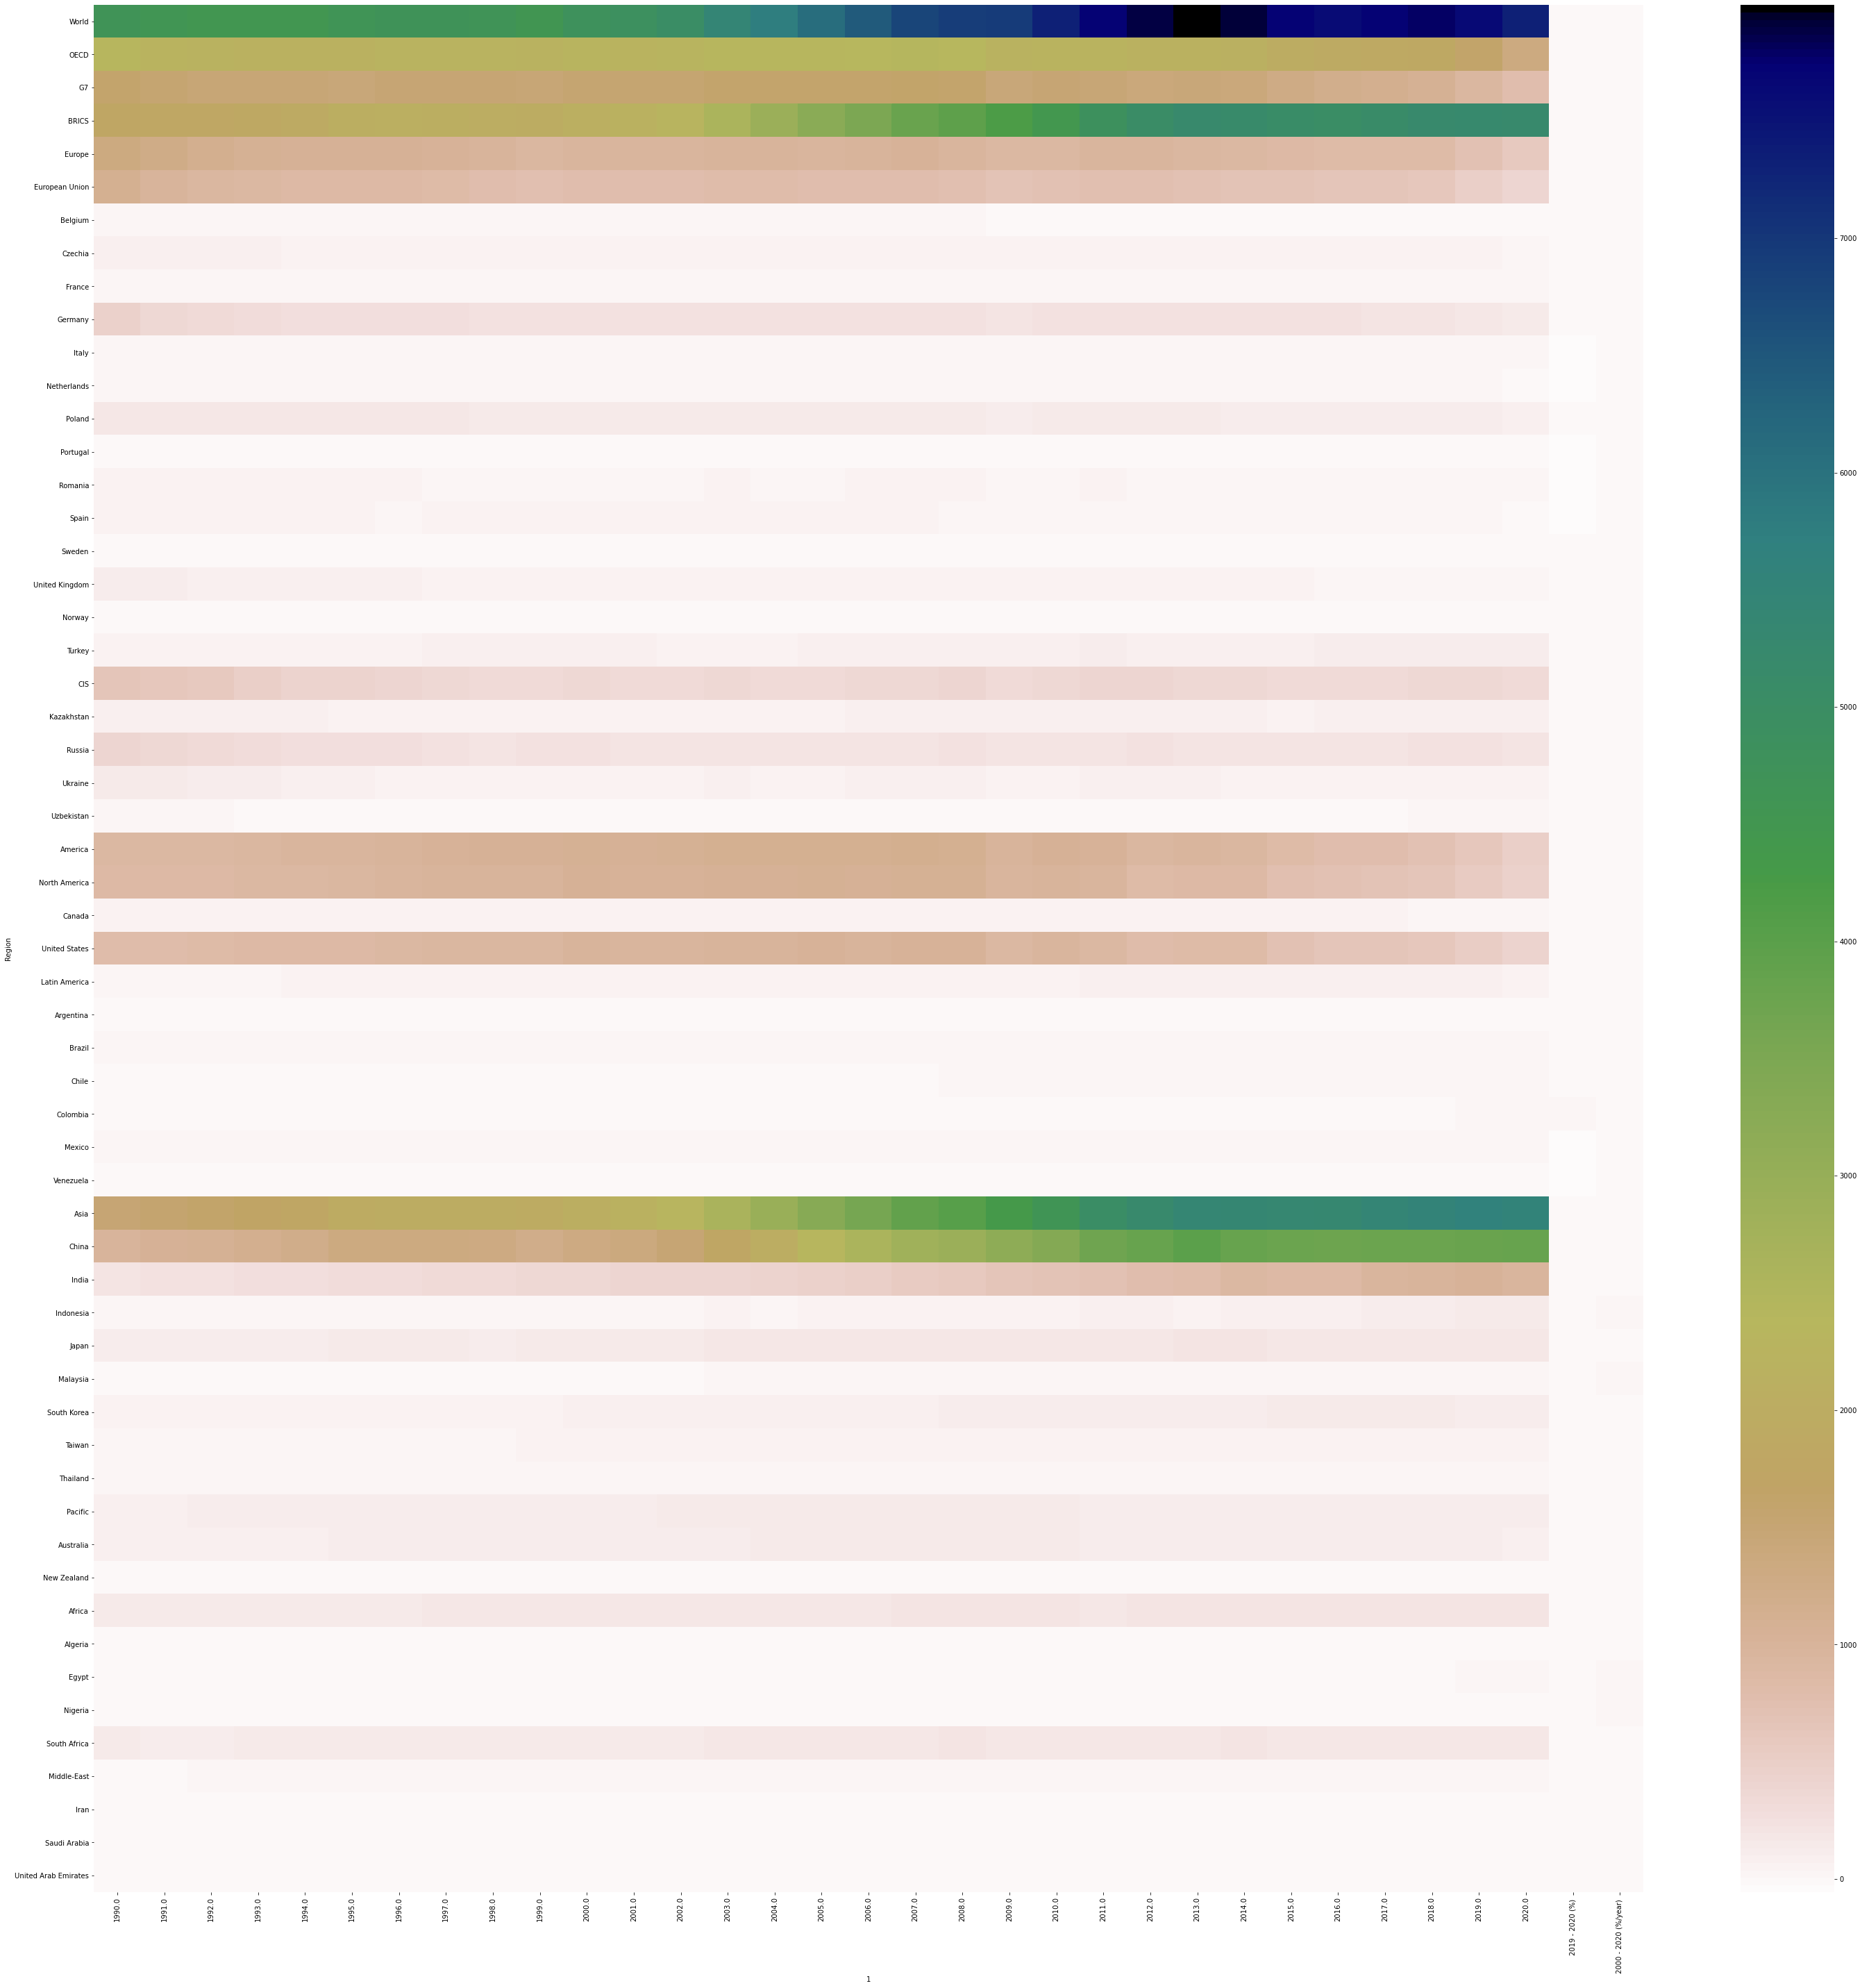

In [24]:
# import plotly.express as px
# sns.set_palette("YlOrBr")
plt.figure(figsize=(50,50))
sns.heatmap(df_con, cmap="gist_earth_r")

In [25]:
large_regions = ['Europe', 'European Union', 'United Kingdom', 'North America', 'Latin America', 'Asia', 'Australia', 'Middle-East', 'Africa']
large_regions

['Europe',
 'European Union',
 'United Kingdom',
 'North America',
 'Latin America',
 'Asia',
 'Australia',
 'Middle-East',
 'Africa']

In [26]:
df_large_regions = df[df['Region'].isin(large_regions)]
df_large_regions      

1           Region       1990.0       1991.0       1992.0       1993.0  \
4           Europe  1351.414316  1242.582467  1164.802339  1104.401298   
5   European Union  1113.682316  1011.699499   942.205041   903.644822   
17  United Kingdom   106.681000   106.091968   100.057298    87.341476   
26   North America   868.657000   867.350000   878.877000   906.511000   
29   Latin America    34.166345    35.185368    34.100108    36.724776   
36            Asia  1504.992512  1572.161419  1620.919016  1701.818028   
46       Australia    94.100000    97.972000   100.720000    98.927000   
48          Africa   145.837919   143.744542   141.803525   145.490110   
53     Middle-East     5.084000     5.910000     6.645000     7.820000   

1        1994.0       1995.0       1996.0       1997.0       1998.0  \
4   1065.072267  1052.297588  1053.974712  1023.218486   992.481481   
5    879.087234   862.392885   863.869032   830.094909   788.494847   
17    82.116033    77.213703    72.158680    63.519576    63.598634   
26   914.832000   924.955000   966.819000   994.691000  1003.709000   
29    39.108064    41.130026    43.422052    45.462222    44.768935   
36  1793.137467  1942.925308  1974.313633  1990.895809  1967.542145   
46    99.435000   101.706000   109.236000   114.978000   125.080000   
48   146.641074   155.627570   161.352428   166.907050   170.884313   
53     8.155000     8.777000    10.082000    10.976000    11.906000   

1        1999.0       2000.0       2001.0       2002.0       2003.0  \
4    931.945414   972.791424   977.527447   969.787105   997.968734   
5    749.786676   772.070037   780.025018   782.329806   804.490739   
17    56.508737    60.097386    63.855429    59.013298    63.741994   
26  1006.708032  1046.377968  1024.801968  1032.698968  1057.884032   
29    45.528771    47.290258    47.238659    47.187083    51.734691   
36  1926.684008  2059.371698  2171.341570  2310.360258  2641.187745   
46   127.636000   127.871000   128.067000   130.014000   130.253817   
48   163.917566   170.103791   169.224510   175.050349   183.501937   
53    11.627494    12.821569    14.080800    14.813153    15.445869   

1        2004.0       2005.0       2006.0       2007.0       2008.0  \
4    988.425175   972.118157   992.261885  1019.142292   971.766970   
5    795.514649   770.303121   775.858892   790.771628   744.072579   
17    61.326526    62.495036    68.227993    63.820664    59.134453   
26  1065.521000  1077.676969  1067.788000  1084.743031  1076.246000   
29    52.022808    56.155888    58.788040    58.766741    58.098364   
36  2946.328960  3295.919802  3606.956624  3896.435969  4047.600235   
46   135.624477   137.556932   140.223494   141.048367   140.207166   
48   194.209791   191.887841   193.845840   199.563780   213.367224   
53    15.601102    15.916514    16.056321    16.600521    15.708297   

1        2009.0       2010.0       2011.0       2012.0       2013.0  \
4    904.110472   914.047786   960.006662   967.599285   922.027433   
5    685.569158   698.954809   731.929874   734.301691   705.284143   
17    48.741377    50.731977    50.532820    63.798593    60.804259   
26   953.678000  1004.411000   958.760000   851.281000   879.961000   
29    53.029546    64.848992    71.374513    69.667546    76.621456   
36  4333.440338  4617.311585  5016.054551  5226.328598  5394.998916   
46   144.489414   133.158359   128.288000   126.977000   116.078000   
48   197.318400   204.245320   194.123954   202.552862   205.263465   
53    15.479034    16.028458    16.247726    19.136636    17.720556   

1        2014.0       2015.0       2016.0       2017.0       2018.0  \
4    890.432360   880.006874   841.200568   845.041324   826.844886   
5    683.752191   679.433922   643.625453   645.325579   620.861190   
17    48.914200    38.531952    18.844115    15.146659    12.844700   
26   872.714000   760.821000   702.076000   689.280000   656.575000   
29    76.313813    79.491471    73.885172    72.986066    71

In [27]:
df_large_regions.reset_index(drop=True, inplace=True)
df_large_regions

1          Region       1990.0       1991.0       1992.0       1993.0  \
0          Europe  1351.414316  1242.582467  1164.802339  1104.401298   
1  European Union  1113.682316  1011.699499   942.205041   903.644822   
2  United Kingdom   106.681000   106.091968   100.057298    87.341476   
3   North America   868.657000   867.350000   878.877000   906.511000   
4   Latin America    34.166345    35.185368    34.100108    36.724776   
5            Asia  1504.992512  1572.161419  1620.919016  1701.818028   
6       Australia    94.100000    97.972000   100.720000    98.927000   
7          Africa   145.837919   143.744542   141.803525   145.490110   
8     Middle-East     5.084000     5.910000     6.645000     7.820000   

1       1994.0       1995.0       1996.0       1997.0       1998.0  \
0  1065.072267  1052.297588  1053.974712  1023.218486   992.481481   
1   879.087234   862.392885   863.869032   830.094909   788.494847   
2    82.116033    77.213703    72.158680    63.519576    63.598634   
3   914.832000   924.955000   966.819000   994.691000  1003.709000   
4    39.108064    41.130026    43.422052    45.462222    44.768935   
5  1793.137467  1942.925308  1974.313633  1990.895809  1967.542145   
6    99.435000   101.706000   109.236000   114.978000   125.080000   
7   146.641074   155.627570   161.352428   166.907050   170.884313   
8     8.155000     8.777000    10.082000    10.976000    11.906000   

1       1999.0       2000.0       2001.0       2002.0       2003.0  \
0   931.945414   972.791424   977.527447   969.787105   997.968734   
1   749.786676   772.070037   780.025018   782.329806   804.490739   
2    56.508737    60.097386    63.855429    59.013298    63.741994   
3  1006.708032  1046.377968  1024.801968  1032.698968  1057.884032   
4    45.528771    47.290258    47.238659    47.187083    51.734691   
5  1926.684008  2059.371698  2171.341570  2310.360258  2641.187745   
6   127.636000   127.871000   128.067000   130.014000   130.253817   
7   163.917566   170.103791   169.224510   175.050349   183.501937   
8    11.627494    12.821569    14.080800    14.813153    15.445869   

1       2004.0       2005.0       2006.0       2007.0       2008.0  \
0   988.425175   972.118157   992.261885  1019.142292   971.766970   
1   795.514649   770.303121   775.858892   790.771628   744.072579   
2    61.326526    62.495036    68.227993    63.820664    59.134453   
3  1065.521000  1077.676969  1067.788000  1084.743031  1076.246000   
4    52.022808    56.155888    58.788040    58.766741    58.098364   
5  2946.328960  3295.919802  3606.956624  3896.435969  4047.600235   
6   135.624477   137.556932   140.223494   141.048367   140.207166   
7   194.209791   191.887841   193.845840   199.563780   213.367224   
8    15.601102    15.916514    16.056321    16.600521    15.708297   

1       2009.0       2010.0       2011.0       2012.0       2013.0  \
0   904.110472   914.047786   960.006662   967.599285   922.027433   
1   685.569158   698.954809   731.929874   734.301691   705.284143   
2    48.741377    50.731977    50.532820    63.798593    60.804259   
3   953.678000  1004.411000   958.760000   851.281000   879.961000   
4    53.029546    64.848992    71.374513    69.667546    76.621456   
5  4333.440338  4617.311585  5016.054551  5226.328598  5394.998916   
6   144.489414   133.158359   128.288000   126.977000   116.078000   
7   197.318400   204.245320   194.123954   202.552862   205.263465   
8    15.479034    16.028458    16.247726    19.136636    17.720556   

1       2014.0       2015.0       2016.0       2017.0       2018.0  \
0   890.432360   880.006874   841.200568   845.041324   826.844886   
1   683.752191   679.433922   643.625453   645.325579   620.861190   
2    48.914200    38.531952    18.844115    15.146659    12.844700   
3   872.714000   760.821000   702.076000   689.280000   656.575000   
4    76.313813    79.491471    73.885172    72.986066    71.267466   
5  5378.189794  5323.390723  5296.395137  542

In [28]:
associations = ['World', 'OECD', 'G7', 'BRICS']
associations

['World', 'OECD', 'G7', 'BRICS']

In [29]:
df_assoc = df[df['Region'].isin(associations)]
df_assoc  

1 Region       1990.0       1991.0       1992.0       1993.0       1994.0  \
0  World  4665.270216  4583.369359  4531.347710  4511.045899  4513.215489   
1   OECD  2334.307792  2248.659876  2182.300053  2157.945177  2150.652107   
2     G7  1599.553542  1518.817582  1476.398159  1463.367441  1454.338738   
3  BRICS  1760.786720  1801.582347  1829.946257  1859.980934  1918.809454   

1       1995.0       1996.0       1997.0       1998.0       1999.0  \
0  4659.157161  4722.178375  4706.297878  4667.073308  4566.473025   
1  2149.349649  2213.607453  2226.785885  2212.308354  2189.682550   
2  1452.297106  1489.862321  1497.107400  1489.999269  1480.356209   
3  2070.619920  2096.348355  2075.147676  2050.827136  1989.753842   

1       2000.0       2001.0       2002.0       2003.0       2004.0  \
0  4794.303577  4879.644644  5026.368656  5441.840272  5750.984234   
1  2277.367473  2267.863256  2276.774664  2337.095011  2346.520342   
2  1541.394839  1530.687131  1546.071202  1586.274510  1596.315537   
3  2090.842228  2169.451917  2295.973961  2607.105858  2902.664565   

1       2005.0       2006.0       2007.0       2008.0       2009.0  \
0  6100.755565  6445.770703  6783.015332  6918.962110  6953.849353   
1  2362.936100  2371.635201  2424.494268  2367.900663  2186.426823   
2  1608.019591  1602.289267  1631.945813  1596.688430  1434.123077   
3  3224.569276  3528.349960  3781.431345  3959.338081  4211.143595   

1       2010.0       2011.0       2012.0       2013.0       2014.0  \
0  7324.825274  7737.299736  7871.178678  7995.490614  7921.585718   
1  2267.964844  2250.632114  2172.117873  2164.504425  2128.365615   
2  1511.093994  1464.982238  1392.562467  1427.096481  1393.399662   
3  4463.053655  4839.794824  5057.194284  5209.068627  5164.101711   

1       2015.0       2016.0       2017.0       2018.0       2019.0  \
0  7733.457884  7606.043758  7724.293627  7792.358976  7644.214490   
1  2002.471531  1906.671815  1893.422529  1832.263743  1610.954275   
2  1267.164714  1176.102660  1150.902729  1100.890428   946.623481   
3  5092.479636  5032.890709  5131.577588  5220.310818  5251.313328   

1       2020.0  2019 - 2020 (%)   2000 - 2020 (%/year)   
0  7305.633140         -4.429250               2.128421  
1  1355.351126        -15.866568              -2.561422  
2   780.408464        -17.558725              -3.345873  
3  5202.035822         -0.938384               4.662861

In [30]:
df_countries = df[~df['Region'].isin(large_regions) & ~df['Region'].isin(associations)]
df_countries      

1                 Region       1990.0       1991.0       1992.0       1993.0  \
6                Belgium    16.620146    16.023028    14.235690    13.513577   
7                Czechia    84.788000    79.201000    73.631000    71.871000   
8                 France    31.208986    33.504171    29.658704    23.271134   
9                Germany   448.766260   368.315450   327.824000   305.929502   
10                 Italy    22.485274    21.174694    18.479219    16.098610   
11           Netherlands    12.528968    11.453563    11.435032    11.485031   
12                Poland   183.638681   183.185591   174.243867   175.808665   
13              Portugal     4.399000     4.619000     4.713000     4.982000   
14               Romania    46.953000    39.661000    43.853530    44.965304   
15                 Spain    47.563000    47.720000    47.222000    44.527000   
16                Sweden     4.878000     4.906000     4.577000     4.654000   
18                Norway     1.277000     1.156000     1.159000     1.239000   
19                Turkey    54.451000    57.877000    59.828000    54.862000   
20                   CIS   658.672000   616.165000   580.928000   506.880000   
21            Kazakhstan    90.361000    89.870000    90.809000    83.019000   
22                Russia   388.194000   365.580000   341.700000   291.703000   
23               Ukraine   149.853000   132.574000   129.105000   116.648000   
24            Uzbekistan     8.940000     9.290000     6.712000     5.193000   
25               America   902.823345   902.535368   912.977108   943.235776   
27                Canada    49.373000    51.486000    53.182000    50.198000   
28         United States   819.284000   815.864000   825.695000   856.313000   
30             Argentina     1.304016     1.039820     0.873526     1.046000   
31                Brazil    15.374000    17.757000    17.023000    17.216000   
32                 Chile     3.741330     2.976548     2.649448     2.672776   
33              Colombia     5.055000     5.210000     5.315000     5.922000   
34                Mexico     7.496000     7.402000     7.349135     8.910000   
35             Venezuela     0.646000     0.000000     0.005000     0.039000   
37                 China  1004.808980  1050.176724  1090.394176  1152.136287   
38                 India   218.234740   236.717623   251.135081   265.246647   
39             Indonesia     7.320000     8.101000     8.329000     8.297000   
40                 Japan   121.755022   122.381298   121.501939   124.215719   
41              Malaysia     2.104000     2.478000     2.602000     2.175000   
42           South Korea    44.776000    43.257000    40.144000    42.068000   
43                Taiwan    17.364769    19.035774    21.924820    23.904375   
44              Thailand    12.780000    15.063000    16.079000    16.822000   
45               Pacific    96.446124   100.270563   103.272722   101.400688   
47           New Zealand     2.322124     2.280563     2.532722     2.453688   
49               Algeria     0.940000     1.171000     1.056000     1.015000   
50                 Egypt     1.199000     1.307000     1.343000     1.614000   
51               Nigeria     0.075000     0.073000     0.052000     0.008000   
52          South Africa   134.175000   131.351000   129.694000   133.679000   
54                  Iran     1.061000     1.512000     1.331000     1.645000   
55          Saudi Arabia     0.000000     0.000000     0.000000     0.000000   
56  United Arab Emirates     0.000000     0.000000     0.000000     0.000000   

1        1994.0       1995.0       1996.0       1997.0       1998.0  \
6     14.472836    13.796649    13.125451    12.190577    12.144000   
7     66.895000    65.807000    65.873000    64.531000    59.083000   
8     23.037458    24.849950    25.417408    23.170766    27.108470   
9    289.426000   274.485000   272.610000   260.474000   247.647000   
10    16.804003    17.950095    16.545987   

In [31]:
df_countries.reset_index(drop=True, inplace=True)
df_countries

1                 Region       1990.0       1991.0       1992.0       1993.0  \
0                Belgium    16.620146    16.023028    14.235690    13.513577   
1                Czechia    84.788000    79.201000    73.631000    71.871000   
2                 France    31.208986    33.504171    29.658704    23.271134   
3                Germany   448.766260   368.315450   327.824000   305.929502   
4                  Italy    22.485274    21.174694    18.479219    16.098610   
5            Netherlands    12.528968    11.453563    11.435032    11.485031   
6                 Poland   183.638681   183.185591   174.243867   175.808665   
7               Portugal     4.399000     4.619000     4.713000     4.982000   
8                Romania    46.953000    39.661000    43.853530    44.965304   
9                  Spain    47.563000    47.720000    47.222000    44.527000   
10                Sweden     4.878000     4.906000     4.577000     4.654000   
11                Norway     1.277000     1.156000     1.159000     1.239000   
12                Turkey    54.451000    57.877000    59.828000    54.862000   
13                   CIS   658.672000   616.165000   580.928000   506.880000   
14            Kazakhstan    90.361000    89.870000    90.809000    83.019000   
15                Russia   388.194000   365.580000   341.700000   291.703000   
16               Ukraine   149.853000   132.574000   129.105000   116.648000   
17            Uzbekistan     8.940000     9.290000     6.712000     5.193000   
18               America   902.823345   902.535368   912.977108   943.235776   
19                Canada    49.373000    51.486000    53.182000    50.198000   
20         United States   819.284000   815.864000   825.695000   856.313000   
21             Argentina     1.304016     1.039820     0.873526     1.046000   
22                Brazil    15.374000    17.757000    17.023000    17.216000   
23                 Chile     3.741330     2.976548     2.649448     2.672776   
24              Colombia     5.055000     5.210000     5.315000     5.922000   
25                Mexico     7.496000     7.402000     7.349135     8.910000   
26             Venezuela     0.646000     0.000000     0.005000     0.039000   
27                 China  1004.808980  1050.176724  1090.394176  1152.136287   
28                 India   218.234740   236.717623   251.135081   265.246647   
29             Indonesia     7.320000     8.101000     8.329000     8.297000   
30                 Japan   121.755022   122.381298   121.501939   124.215719   
31              Malaysia     2.104000     2.478000     2.602000     2.175000   
32           South Korea    44.776000    43.257000    40.144000    42.068000   
33                Taiwan    17.364769    19.035774    21.924820    23.904375   
34              Thailand    12.780000    15.063000    16.079000    16.822000   
35               Pacific    96.446124   100.270563   103.272722   101.400688   
36           New Zealand     2.322124     2.280563     2.532722     2.453688   
37               Algeria     0.940000     1.171000     1.056000     1.015000   
38                 Egypt     1.199000     1.307000     1.343000     1.614000   
39               Nigeria     0.075000     0.073000     0.052000     0.008000   
40          South Africa   134.175000   131.351000   129.694000   133.679000   
41                  Iran     1.061000     1.512000     1.331000     1.645000   
42          Saudi Arabia     0.000000     0.000000     0.000000     0.000000   
43  United Arab Emirates     0.000000     0.000000     0.000000     0.000000   

1        1994.0       1995.0       1996.0       1997.0       1998.0  \
0     14.472836    13.796649    13.125451    12.190577    12.144000   
1     66.895000    65.807000    65.873000    64.531000    59.083000   
2     23.037458    24.849950    25.417408    23.170766    27.108470   
3    289.426000   274.485000   272.610000   260.474000   247.647000   
4     16.804003    17.950095    16.545987   

# For Large Regions

In [32]:
df_large_regions

1          Region       1990.0       1991.0       1992.0       1993.0  \
0          Europe  1351.414316  1242.582467  1164.802339  1104.401298   
1  European Union  1113.682316  1011.699499   942.205041   903.644822   
2  United Kingdom   106.681000   106.091968   100.057298    87.341476   
3   North America   868.657000   867.350000   878.877000   906.511000   
4   Latin America    34.166345    35.185368    34.100108    36.724776   
5            Asia  1504.992512  1572.161419  1620.919016  1701.818028   
6       Australia    94.100000    97.972000   100.720000    98.927000   
7          Africa   145.837919   143.744542   141.803525   145.490110   
8     Middle-East     5.084000     5.910000     6.645000     7.820000   

1       1994.0       1995.0       1996.0       1997.0       1998.0  \
0  1065.072267  1052.297588  1053.974712  1023.218486   992.481481   
1   879.087234   862.392885   863.869032   830.094909   788.494847   
2    82.116033    77.213703    72.158680    63.519576    63.598634   
3   914.832000   924.955000   966.819000   994.691000  1003.709000   
4    39.108064    41.130026    43.422052    45.462222    44.768935   
5  1793.137467  1942.925308  1974.313633  1990.895809  1967.542145   
6    99.435000   101.706000   109.236000   114.978000   125.080000   
7   146.641074   155.627570   161.352428   166.907050   170.884313   
8     8.155000     8.777000    10.082000    10.976000    11.906000   

1       1999.0       2000.0       2001.0       2002.0       2003.0  \
0   931.945414   972.791424   977.527447   969.787105   997.968734   
1   749.786676   772.070037   780.025018   782.329806   804.490739   
2    56.508737    60.097386    63.855429    59.013298    63.741994   
3  1006.708032  1046.377968  1024.801968  1032.698968  1057.884032   
4    45.528771    47.290258    47.238659    47.187083    51.734691   
5  1926.684008  2059.371698  2171.341570  2310.360258  2641.187745   
6   127.636000   127.871000   128.067000   130.014000   130.253817   
7   163.917566   170.103791   169.224510   175.050349   183.501937   
8    11.627494    12.821569    14.080800    14.813153    15.445869   

1       2004.0       2005.0       2006.0       2007.0       2008.0  \
0   988.425175   972.118157   992.261885  1019.142292   971.766970   
1   795.514649   770.303121   775.858892   790.771628   744.072579   
2    61.326526    62.495036    68.227993    63.820664    59.134453   
3  1065.521000  1077.676969  1067.788000  1084.743031  1076.246000   
4    52.022808    56.155888    58.788040    58.766741    58.098364   
5  2946.328960  3295.919802  3606.956624  3896.435969  4047.600235   
6   135.624477   137.556932   140.223494   141.048367   140.207166   
7   194.209791   191.887841   193.845840   199.563780   213.367224   
8    15.601102    15.916514    16.056321    16.600521    15.708297   

1       2009.0       2010.0       2011.0       2012.0       2013.0  \
0   904.110472   914.047786   960.006662   967.599285   922.027433   
1   685.569158   698.954809   731.929874   734.301691   705.284143   
2    48.741377    50.731977    50.532820    63.798593    60.804259   
3   953.678000  1004.411000   958.760000   851.281000   879.961000   
4    53.029546    64.848992    71.374513    69.667546    76.621456   
5  4333.440338  4617.311585  5016.054551  5226.328598  5394.998916   
6   144.489414   133.158359   128.288000   126.977000   116.078000   
7   197.318400   204.245320   194.123954   202.552862   205.263465   
8    15.479034    16.028458    16.247726    19.136636    17.720556   

1       2014.0       2015.0       2016.0       2017.0       2018.0  \
0   890.432360   880.006874   841.200568   845.041324   826.844886   
1   683.752191   679.433922   643.625453   645.325579   620.861190   
2    48.914200    38.531952    18.844115    15.146659    12.844700   
3   872.714000   760.821000   702.076000   689.280000   656.575000   
4    76.313813    79.491471    73.885172    72.986066    71.267466   
5  5378.189794  5323.390723  5296.395137  542

In [33]:
df_large_regions2 = df_large_regions.copy()
df_large_regions2

1          Region       1990.0       1991.0       1992.0       1993.0  \
0          Europe  1351.414316  1242.582467  1164.802339  1104.401298   
1  European Union  1113.682316  1011.699499   942.205041   903.644822   
2  United Kingdom   106.681000   106.091968   100.057298    87.341476   
3   North America   868.657000   867.350000   878.877000   906.511000   
4   Latin America    34.166345    35.185368    34.100108    36.724776   
5            Asia  1504.992512  1572.161419  1620.919016  1701.818028   
6       Australia    94.100000    97.972000   100.720000    98.927000   
7          Africa   145.837919   143.744542   141.803525   145.490110   
8     Middle-East     5.084000     5.910000     6.645000     7.820000   

1       1994.0       1995.0       1996.0       1997.0       1998.0  \
0  1065.072267  1052.297588  1053.974712  1023.218486   992.481481   
1   879.087234   862.392885   863.869032   830.094909   788.494847   
2    82.116033    77.213703    72.158680    63.519576    63.598634   
3   914.832000   924.955000   966.819000   994.691000  1003.709000   
4    39.108064    41.130026    43.422052    45.462222    44.768935   
5  1793.137467  1942.925308  1974.313633  1990.895809  1967.542145   
6    99.435000   101.706000   109.236000   114.978000   125.080000   
7   146.641074   155.627570   161.352428   166.907050   170.884313   
8     8.155000     8.777000    10.082000    10.976000    11.906000   

1       1999.0       2000.0       2001.0       2002.0       2003.0  \
0   931.945414   972.791424   977.527447   969.787105   997.968734   
1   749.786676   772.070037   780.025018   782.329806   804.490739   
2    56.508737    60.097386    63.855429    59.013298    63.741994   
3  1006.708032  1046.377968  1024.801968  1032.698968  1057.884032   
4    45.528771    47.290258    47.238659    47.187083    51.734691   
5  1926.684008  2059.371698  2171.341570  2310.360258  2641.187745   
6   127.636000   127.871000   128.067000   130.014000   130.253817   
7   163.917566   170.103791   169.224510   175.050349   183.501937   
8    11.627494    12.821569    14.080800    14.813153    15.445869   

1       2004.0       2005.0       2006.0       2007.0       2008.0  \
0   988.425175   972.118157   992.261885  1019.142292   971.766970   
1   795.514649   770.303121   775.858892   790.771628   744.072579   
2    61.326526    62.495036    68.227993    63.820664    59.134453   
3  1065.521000  1077.676969  1067.788000  1084.743031  1076.246000   
4    52.022808    56.155888    58.788040    58.766741    58.098364   
5  2946.328960  3295.919802  3606.956624  3896.435969  4047.600235   
6   135.624477   137.556932   140.223494   141.048367   140.207166   
7   194.209791   191.887841   193.845840   199.563780   213.367224   
8    15.601102    15.916514    16.056321    16.600521    15.708297   

1       2009.0       2010.0       2011.0       2012.0       2013.0  \
0   904.110472   914.047786   960.006662   967.599285   922.027433   
1   685.569158   698.954809   731.929874   734.301691   705.284143   
2    48.741377    50.731977    50.532820    63.798593    60.804259   
3   953.678000  1004.411000   958.760000   851.281000   879.961000   
4    53.029546    64.848992    71.374513    69.667546    76.621456   
5  4333.440338  4617.311585  5016.054551  5226.328598  5394.998916   
6   144.489414   133.158359   128.288000   126.977000   116.078000   
7   197.318400   204.245320   194.123954   202.552862   205.263465   
8    15.479034    16.028458    16.247726    19.136636    17.720556   

1       2014.0       2015.0       2016.0       2017.0       2018.0  \
0   890.432360   880.006874   841.200568   845.041324   826.844886   
1   683.752191   679.433922   643.625453   645.325579   620.861190   
2    48.914200    38.531952    18.844115    15.146659    12.844700   
3   872.714000   760.821000   702.076000   689.280000   656.575000   
4    76.313813    79.491471    73.885172    72.986066    71.267466   
5  5378.189794  5323.390723  5296.395137  542

In [34]:
df_large_regions2.set_index('Region', inplace=True)
df_large_regions2

1                    1990.0       1991.0       1992.0       1993.0  \
Region                                                               
Europe          1351.414316  1242.582467  1164.802339  1104.401298   
European Union  1113.682316  1011.699499   942.205041   903.644822   
United Kingdom   106.681000   106.091968   100.057298    87.341476   
North America    868.657000   867.350000   878.877000   906.511000   
Latin America     34.166345    35.185368    34.100108    36.724776   
Asia            1504.992512  1572.161419  1620.919016  1701.818028   
Australia         94.100000    97.972000   100.720000    98.927000   
Africa           145.837919   143.744542   141.803525   145.490110   
Middle-East        5.084000     5.910000     6.645000     7.820000   

1                    1994.0       1995.0       1996.0       1997.0  \
Region                                                               
Europe          1065.072267  1052.297588  1053.974712  1023.218486   
European Union   879.087234   862.392885   863.869032   830.094909   
United Kingdom    82.116033    77.213703    72.158680    63.519576   
North America    914.832000   924.955000   966.819000   994.691000   
Latin America     39.108064    41.130026    43.422052    45.462222   
Asia            1793.137467  1942.925308  1974.313633  1990.895809   
Australia         99.435000   101.706000   109.236000   114.978000   
Africa           146.641074   155.627570   161.352428   166.907050   
Middle-East        8.155000     8.777000    10.082000    10.976000   

1                    1998.0       1999.0       2000.0       2001.0  \
Region                                                               
Europe           992.481481   931.945414   972.791424   977.527447   
European Union   788.494847   749.786676   772.070037   780.025018   
United Kingdom    63.598634    56.508737    60.097386    63.855429   
North America   1003.709000  1006.708032  1046.377968  1024.801968   
Latin America     44.768935    45.528771    47.290258    47.238659   
Asia            1967.542145  1926.684008  2059.371698  2171.341570   
Australia        125.080000   127.636000   127.871000   128.067000   
Africa           170.884313   163.917566   170.103791   169.224510   
Middle-East       11.906000    11.627494    12.821569    14.080800   

1                    2002.0       2003.0       2004.0       2005.0  \
Region                                                               
Europe           969.787105   997.968734   988.425175   972.118157   
European Union   782.329806   804.490739   795.514649   770.303121   
United Kingdom    59.013298    63.741994    61.326526    62.495036   
North America   1032.698968  1057.884032  1065.521000  1077.676969   
Latin America     47.187083    51.734691    52.022808    56.155888   
Asia            2310.360258  2641.187745  2946.328960  3295.919802   
Australia        130.014000   130.253817   135.624477   137.556932   
Africa           175.050349   183.501937   194.209791   191.887841   
Middle-East       14.813153    15.445869    15.601102    15.916514   

1                    2006.0       2007.0       2008.0       2009.0  \
Region                                                               
Europe           992.261885  1019.142292   971.766970   904.110472   
European Union   775.858892   790.771628   744.072579   685.569158   
United Kingdom    68.227993    63.820664    59.134453    48.741377   
North America   1067.788000  1084.743031  1076.246000   953.678000   
Latin America     58.788040    58.766741    58.098364    53.029546   
Asia            3606.956624  3896.435969  4047.600235  4333.440338   
Australia        140.223494   141.048367   140.207166   144.489414   
Africa           193.845840   199.563780   213.367224   197.318400   
Middle-East       16.056321    16.600521    15.708297    15.479034   

1                    2010.0       2011.0       2012.0       2013.0  \
Region                                                               
Europ

In [35]:
plt.rcParams.update({'font.size': 32})

<AxesSubplot:xlabel='1', ylabel='Region'>

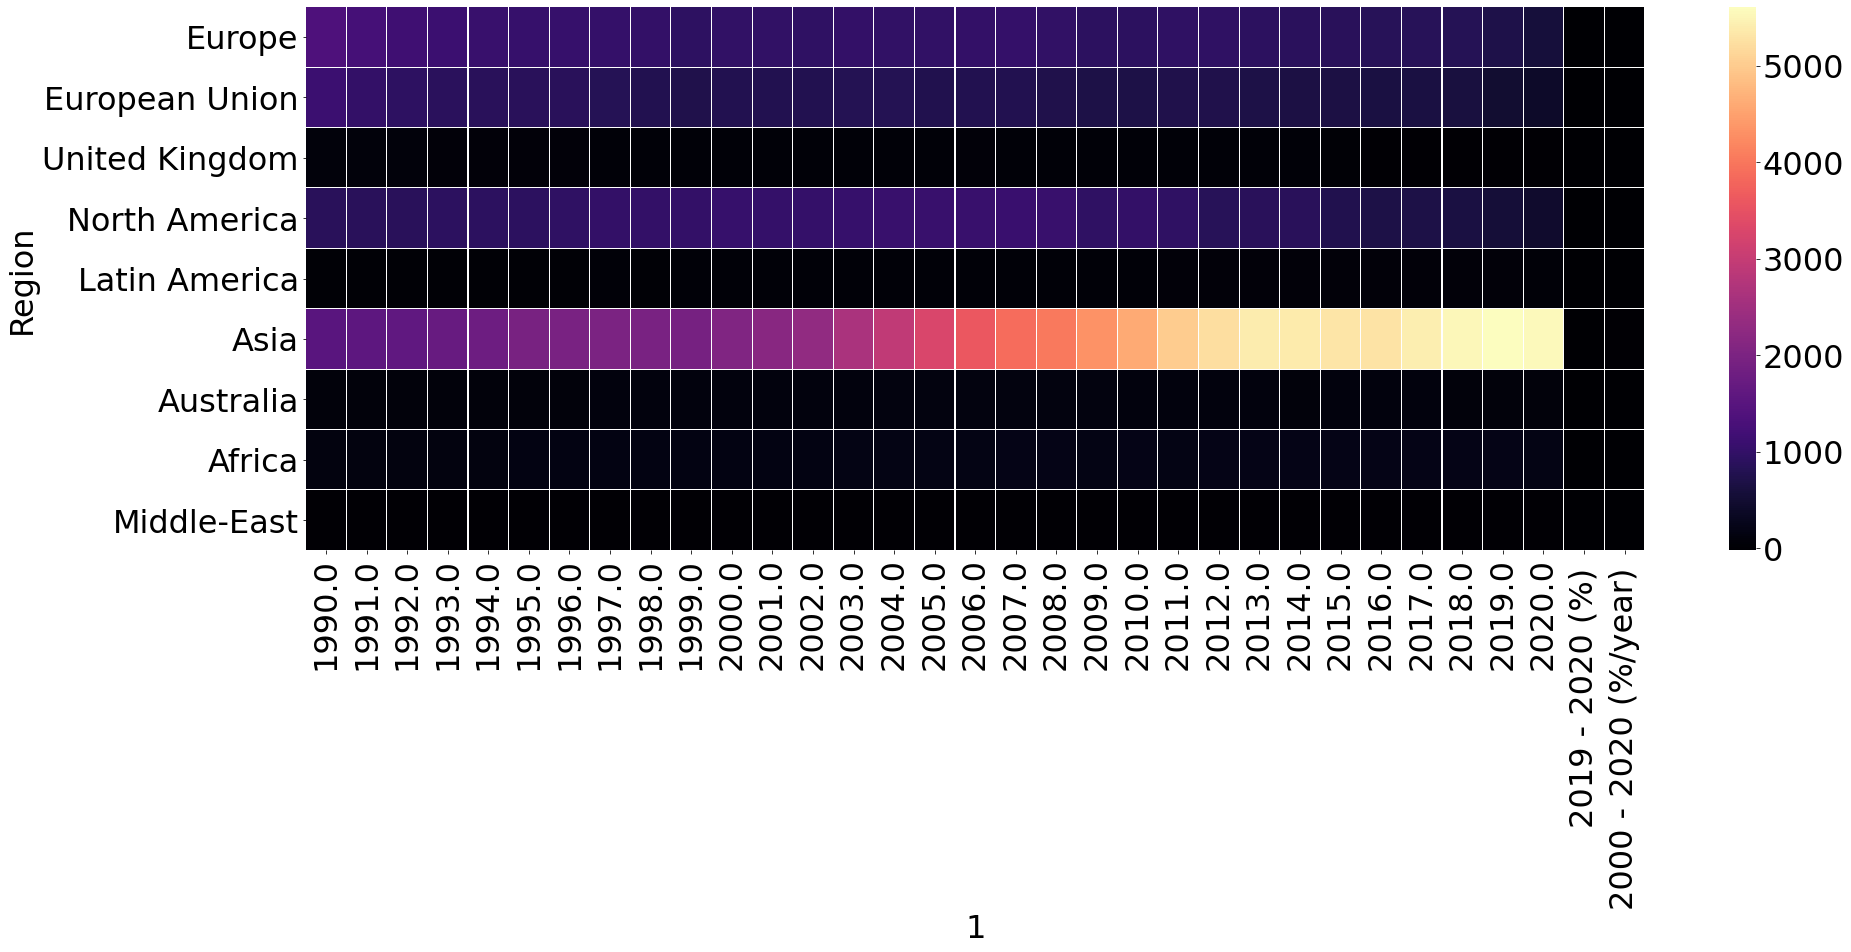

In [36]:
plt.figure(figsize=(30,10))
sns.heatmap(df_large_regions2, cmap="magma", linewidth=0.1)

In [37]:
df_large_regions2_T = df_large_regions2.T
df_large_regions2_T

Region                      Europe  European Union  United Kingdom  \
1                                                                    
1990.0                 1351.414316     1113.682316      106.681000   
1991.0                 1242.582467     1011.699499      106.091968   
1992.0                 1164.802339      942.205041      100.057298   
1993.0                 1104.401298      903.644822       87.341476   
1994.0                 1065.072267      879.087234       82.116033   
1995.0                 1052.297588      862.392885       77.213703   
1996.0                 1053.974712      863.869032       72.158680   
1997.0                 1023.218486      830.094909       63.519576   
1998.0                  992.481481      788.494847       63.598634   
1999.0                  931.945414      749.786676       56.508737   
2000.0                  972.791424      772.070037       60.097386   
2001.0                  977.527447      780.025018       63.855429   
2002.0                  969.787105      782.329806       59.013298   
2003.0                  997.968734      804.490739       63.741994   
2004.0                  988.425175      795.514649       61.326526   
2005.0                  972.118157      770.303121       62.495036   
2006.0                  992.261885      775.858892       68.227993   
2007.0                 1019.142292      790.771628       63.820664   
2008.0                  971.766970      744.072579       59.134453   
2009.0                  904.110472      685.569158       48.741377   
2010.0                  914.047786      698.954809       50.731977   
2011.0                  960.006662      731.929874       50.532820   
2012.0                  967.599285      734.301691       63.798593   
2013.0                  922.027433      705.284143       60.804259   
2014.0                  890.432360      683.752191       48.914200   
2015.0                  880.006874      679.433922       38.531952   
2016.0                  841.200568      643.625453       18.844115   
2017.0                  845.041324      645.325579       15.146659   
2018.0                  826.844886      620.861190       12.844700   
2019.0                  707.003198      502.069184        8.993370   
2020.0                  586.599914      408.300005        8.248658   
2019 - 2020 (%)         -17.030090      -18.676545       -8.280678   
2000 - 2020 (%/year)     -2.497419       -3.135167       -9.452516   

Region                 North America  Latin America         Asia   Australia  \
1                                                                              
1990.0                    868.657000      34.166345  1504.992512   94.100000   
1991.0                    867.350000      35.185368  1572.161419   97.972000   
1992.0                    878.877000      34.100108  1620.919016  100.720000   
1993.0                    906.511000      36.724776  1701.818028   98.927000   
1994.0                    914.832000      39.108064  1793.137467   99.435000   
1995.0                    924.955000      41.130026  1942.925308  101.706000   
1996.0                    966.819000      43.422052  1974.313633  109.236000   
1997.0                    994.691000      45.462222  1990.895809  114.978000   
1998.0                   1003.709000      44.768935  1967.542145  125.080000   
1999.0                   1006.708032      45.528771  1926.684008  127.636000   
2000.0                   1046.377968      47.290258  2059.371698  127.871000   
2001.0                   1024.801968      47.238659  2171.341570  128.067000   
2002.0                   1032.698968      47.187083  2310.360258  130.014000   
2003.0                   1057.884032      51.734691  2641.187745  130.253817   
2004.0                   1065.521000      52.022808  2946.328960  135.624477   
2005.0                   1077.676969      56.155888  3295.919802  137.556932   
2006.0                   1067.788000      58.788040  3606.956624  140.223494   
2007.0                   1084

In [38]:
df_large_regions2_T.drop(df_large_regions2_T.tail(2).index,inplace=True)
df_large_regions2_T

Region       Europe  European Union  United Kingdom  North America  \
1                                                                    
1990.0  1351.414316     1113.682316      106.681000     868.657000   
1991.0  1242.582467     1011.699499      106.091968     867.350000   
1992.0  1164.802339      942.205041      100.057298     878.877000   
1993.0  1104.401298      903.644822       87.341476     906.511000   
1994.0  1065.072267      879.087234       82.116033     914.832000   
1995.0  1052.297588      862.392885       77.213703     924.955000   
1996.0  1053.974712      863.869032       72.158680     966.819000   
1997.0  1023.218486      830.094909       63.519576     994.691000   
1998.0   992.481481      788.494847       63.598634    1003.709000   
1999.0   931.945414      749.786676       56.508737    1006.708032   
2000.0   972.791424      772.070037       60.097386    1046.377968   
2001.0   977.527447      780.025018       63.855429    1024.801968   
2002.0   969.787105      782.329806       59.013298    1032.698968   
2003.0   997.968734      804.490739       63.741994    1057.884032   
2004.0   988.425175      795.514649       61.326526    1065.521000   
2005.0   972.118157      770.303121       62.495036    1077.676969   
2006.0   992.261885      775.858892       68.227993    1067.788000   
2007.0  1019.142292      790.771628       63.820664    1084.743031   
2008.0   971.766970      744.072579       59.134453    1076.246000   
2009.0   904.110472      685.569158       48.741377     953.678000   
2010.0   914.047786      698.954809       50.731977    1004.411000   
2011.0   960.006662      731.929874       50.532820     958.760000   
2012.0   967.599285      734.301691       63.798593     851.281000   
2013.0   922.027433      705.284143       60.804259     879.961000   
2014.0   890.432360      683.752191       48.914200     872.714000   
2015.0   880.006874      679.433922       38.531952     760.821000   
2016.0   841.200568      643.625453       18.844115     702.076000   
2017.0   845.041324      645.325579       15.146659     689.280000   
2018.0   826.844886      620.861190       12.844700     656.575000   
2019.0   707.003198      502.069184        8.993370     563.147547   
2020.0   586.599914      408.300005        8.248658     447.073063   

Region  Latin America         Asia   Australia      Africa  Middle-East  
1                                                                        
1990.0      34.166345  1504.992512   94.100000  145.837919     5.084000  
1991.0      35.185368  1572.161419   97.972000  143.744542     5.910000  
1992.0      34.100108  1620.919016  100.720000  141.803525     6.645000  
1993.0      36.724776  1701.818028   98.927000  145.490110     7.820000  
1994.0      39.108064  1793.137467   99.435000  146.641074     8.155000  
1995.0      41.130026  1942.925308  101.706000  155.627570     8.777000  
1996.0      43.422052  1974.313633  109.236000  161.352428    10.082000  
1997.0      45.462222  1990.895809  114.978000  166.907050    10.976000  
1998.0      44.768935  1967.542145  125.080000  170.884313    11.906000  
1999.0      45.528771  1926.684008  127.636000  163.917566    11.627494  
2000.0      47.290258  2059.371698  127.871000  170.103791    12.821569  
2001.0      47.238659  2171.341570  128.067000  169.224510    14.080800  
2002.0      47.187083  2310.360258  130.014000  175.050349    14.813153  
2003.0      51.734691  2641.187745  130.253817  183.501937    15.445869  
2004.0      52.022808  2946.328960  135.624477  194.209791    15.601102  
2005.0      56.155888  3295.919802  137.556932  191.887841    15.916514  
2006.0      58.788040  3606.956624  140.223494  193.845840    16.056321  
2007.0      58.766741  3896.435969  141.048367  199.563780    16.600521  
2008.0      58.098364  4047.600235  140.207166  213.367224    15.708297  
2009.0      53.029546  4333.440338  144.489414  197.318400    15.479034  
2010.0      64.848992  4617.311585  133.158359  204.245320   

Text(0, 0.5, 'Consumption in Mt')

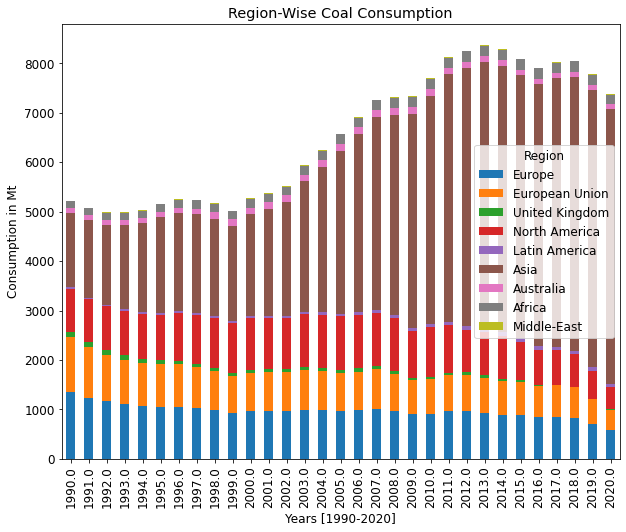

In [39]:
plt.rcParams.update({'font.size': 12})
df_large_regions2_T.plot(kind="bar",stacked=True,figsize=(10,8))
plt.title("Region-Wise Coal Consumption")
plt.xlabel("Years [1990-2020]")
plt.ylabel("Consumption in Mt")

In [40]:
df_large_regions2_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1990.0 to 2020.0
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Europe          31 non-null     float64
 1   European Union  31 non-null     float64
 2   United Kingdom  31 non-null     float64
 3   North America   31 non-null     float64
 4   Latin America   31 non-null     float64
 5   Asia            31 non-null     float64
 6   Australia       31 non-null     float64
 7   Africa          31 non-null     float64
 8   Middle-East     31 non-null     float64
dtypes: float64(9)
memory usage: 2.4+ KB


In [41]:
df_large_regions2_T.describe()

Region       Europe  European Union  United Kingdom  North America  \
count     31.000000       31.000000       31.000000      31.000000   
mean     970.609688      764.509708       58.165567     909.891115   
std      141.503937      135.531281       25.660176     160.139674   
min      586.599914      408.300005        8.248658     447.073063   
25%      909.079129      692.261984       49.723510     868.003500   
50%      972.118157      772.070037       61.326526     953.678000   
75%     1021.180389      817.292824       66.041711    1028.750468   
max     1351.414316     1113.682316      106.681000    1084.743031   

Region  Latin America         Asia   Australia      Africa  Middle-East  
count       31.000000    31.000000   31.000000   31.000000    31.000000  
mean        55.456514  3474.175480  119.213768  183.325342    13.473908  
std         14.212097  1565.272800   15.374710   23.870371     3.779969  
min         34.100108  1504.992512   94.100000  141.803525     5.084000  
25%         45.115578  1970.927889  103.920696  165.412308    11.301747  
50%         53.029546  3295.919802  118.357000  193.845840    14.915824  
75%         70.467506  5261.361868  130.133908  203.939431    15.972486  
max         79.491471  5614.579719  144.489414  215.824160    19.136636

In [42]:
corr_matrix_large_regions = df_large_regions2_T.corr()
corr_matrix_large_regions

Region            Europe  European Union  United Kingdom  North America  \
Region                                                                    
Europe          1.000000        0.994026        0.939953       0.537081   
European Union  0.994026        1.000000        0.940738       0.544503   
United Kingdom  0.939953        0.940738        1.000000       0.592494   
North America   0.537081        0.544503        0.592494       1.000000   
Latin America  -0.714968       -0.758324       -0.766821      -0.410700   
Asia           -0.759194       -0.811267       -0.796711      -0.553948   
Australia      -0.160335       -0.183732       -0.121645       0.642282   
Africa         -0.722514       -0.768767       -0.764042      -0.233890   
Middle-East    -0.667160       -0.701940       -0.638460       0.003101   

Region          Latin America      Asia  Australia    Africa  Middle-East  
Region                                                                     
Europe              -0.714968 -0.759194  -0.160335 -0.722514    -0.667160  
European Union      -0.758324 -0.811267  -0.183732 -0.768767    -0.701940  
United Kingdom      -0.766821 -0.796711  -0.121645 -0.764042    -0.638460  
North America       -0.410700 -0.553948   0.642282 -0.233890     0.003101  
Latin America        1.000000  0.954378   0.229805  0.919198     0.844570  
Asia                 0.954378  1.000000   0.145369  0.907388     0.774240  
Australia            0.229805  0.145369   1.000000  0.468175     0.654000  
Africa               0.919198  0.907388   0.468175  1.000000     0.914236  
Middle-East          0.844570  0.774240   0.654000  0.914236     1.000000

<AxesSubplot:xlabel='Region', ylabel='Region'>

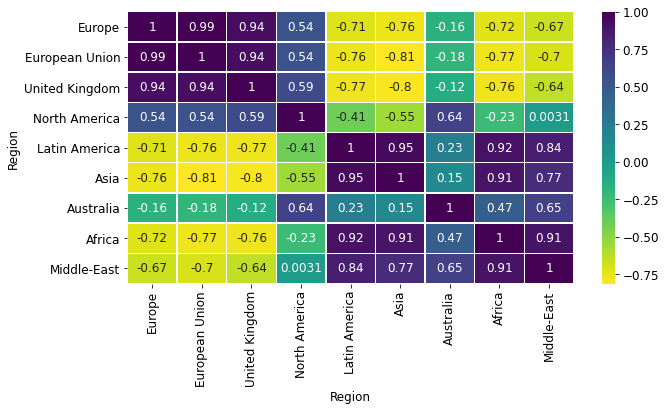

In [43]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix_large_regions, cmap='viridis_r', linewidths=0.4, annot=True)

In [44]:
df_large_regions2_per = df_large_regions2.copy()
df_large_regions2_per

1                    1990.0       1991.0       1992.0       1993.0  \
Region                                                               
Europe          1351.414316  1242.582467  1164.802339  1104.401298   
European Union  1113.682316  1011.699499   942.205041   903.644822   
United Kingdom   106.681000   106.091968   100.057298    87.341476   
North America    868.657000   867.350000   878.877000   906.511000   
Latin America     34.166345    35.185368    34.100108    36.724776   
Asia            1504.992512  1572.161419  1620.919016  1701.818028   
Australia         94.100000    97.972000   100.720000    98.927000   
Africa           145.837919   143.744542   141.803525   145.490110   
Middle-East        5.084000     5.910000     6.645000     7.820000   

1                    1994.0       1995.0       1996.0       1997.0  \
Region                                                               
Europe          1065.072267  1052.297588  1053.974712  1023.218486   
European Union   879.087234   862.392885   863.869032   830.094909   
United Kingdom    82.116033    77.213703    72.158680    63.519576   
North America    914.832000   924.955000   966.819000   994.691000   
Latin America     39.108064    41.130026    43.422052    45.462222   
Asia            1793.137467  1942.925308  1974.313633  1990.895809   
Australia         99.435000   101.706000   109.236000   114.978000   
Africa           146.641074   155.627570   161.352428   166.907050   
Middle-East        8.155000     8.777000    10.082000    10.976000   

1                    1998.0       1999.0       2000.0       2001.0  \
Region                                                               
Europe           992.481481   931.945414   972.791424   977.527447   
European Union   788.494847   749.786676   772.070037   780.025018   
United Kingdom    63.598634    56.508737    60.097386    63.855429   
North America   1003.709000  1006.708032  1046.377968  1024.801968   
Latin America     44.768935    45.528771    47.290258    47.238659   
Asia            1967.542145  1926.684008  2059.371698  2171.341570   
Australia        125.080000   127.636000   127.871000   128.067000   
Africa           170.884313   163.917566   170.103791   169.224510   
Middle-East       11.906000    11.627494    12.821569    14.080800   

1                    2002.0       2003.0       2004.0       2005.0  \
Region                                                               
Europe           969.787105   997.968734   988.425175   972.118157   
European Union   782.329806   804.490739   795.514649   770.303121   
United Kingdom    59.013298    63.741994    61.326526    62.495036   
North America   1032.698968  1057.884032  1065.521000  1077.676969   
Latin America     47.187083    51.734691    52.022808    56.155888   
Asia            2310.360258  2641.187745  2946.328960  3295.919802   
Australia        130.014000   130.253817   135.624477   137.556932   
Africa           175.050349   183.501937   194.209791   191.887841   
Middle-East       14.813153    15.445869    15.601102    15.916514   

1                    2006.0       2007.0       2008.0       2009.0  \
Region                                                               
Europe           992.261885  1019.142292   971.766970   904.110472   
European Union   775.858892   790.771628   744.072579   685.569158   
United Kingdom    68.227993    63.820664    59.134453    48.741377   
North America   1067.788000  1084.743031  1076.246000   953.678000   
Latin America     58.788040    58.766741    58.098364    53.029546   
Asia            3606.956624  3896.435969  4047.600235  4333.440338   
Australia        140.223494   141.048367   140.207166   144.489414   
Africa           193.845840   199.563780   213.367224   197.318400   
Middle-East       16.056321    16.600521    15.708297    15.479034   

1                    2010.0       2011.0       2012.0       2013.0  \
Region                                                               
Europ

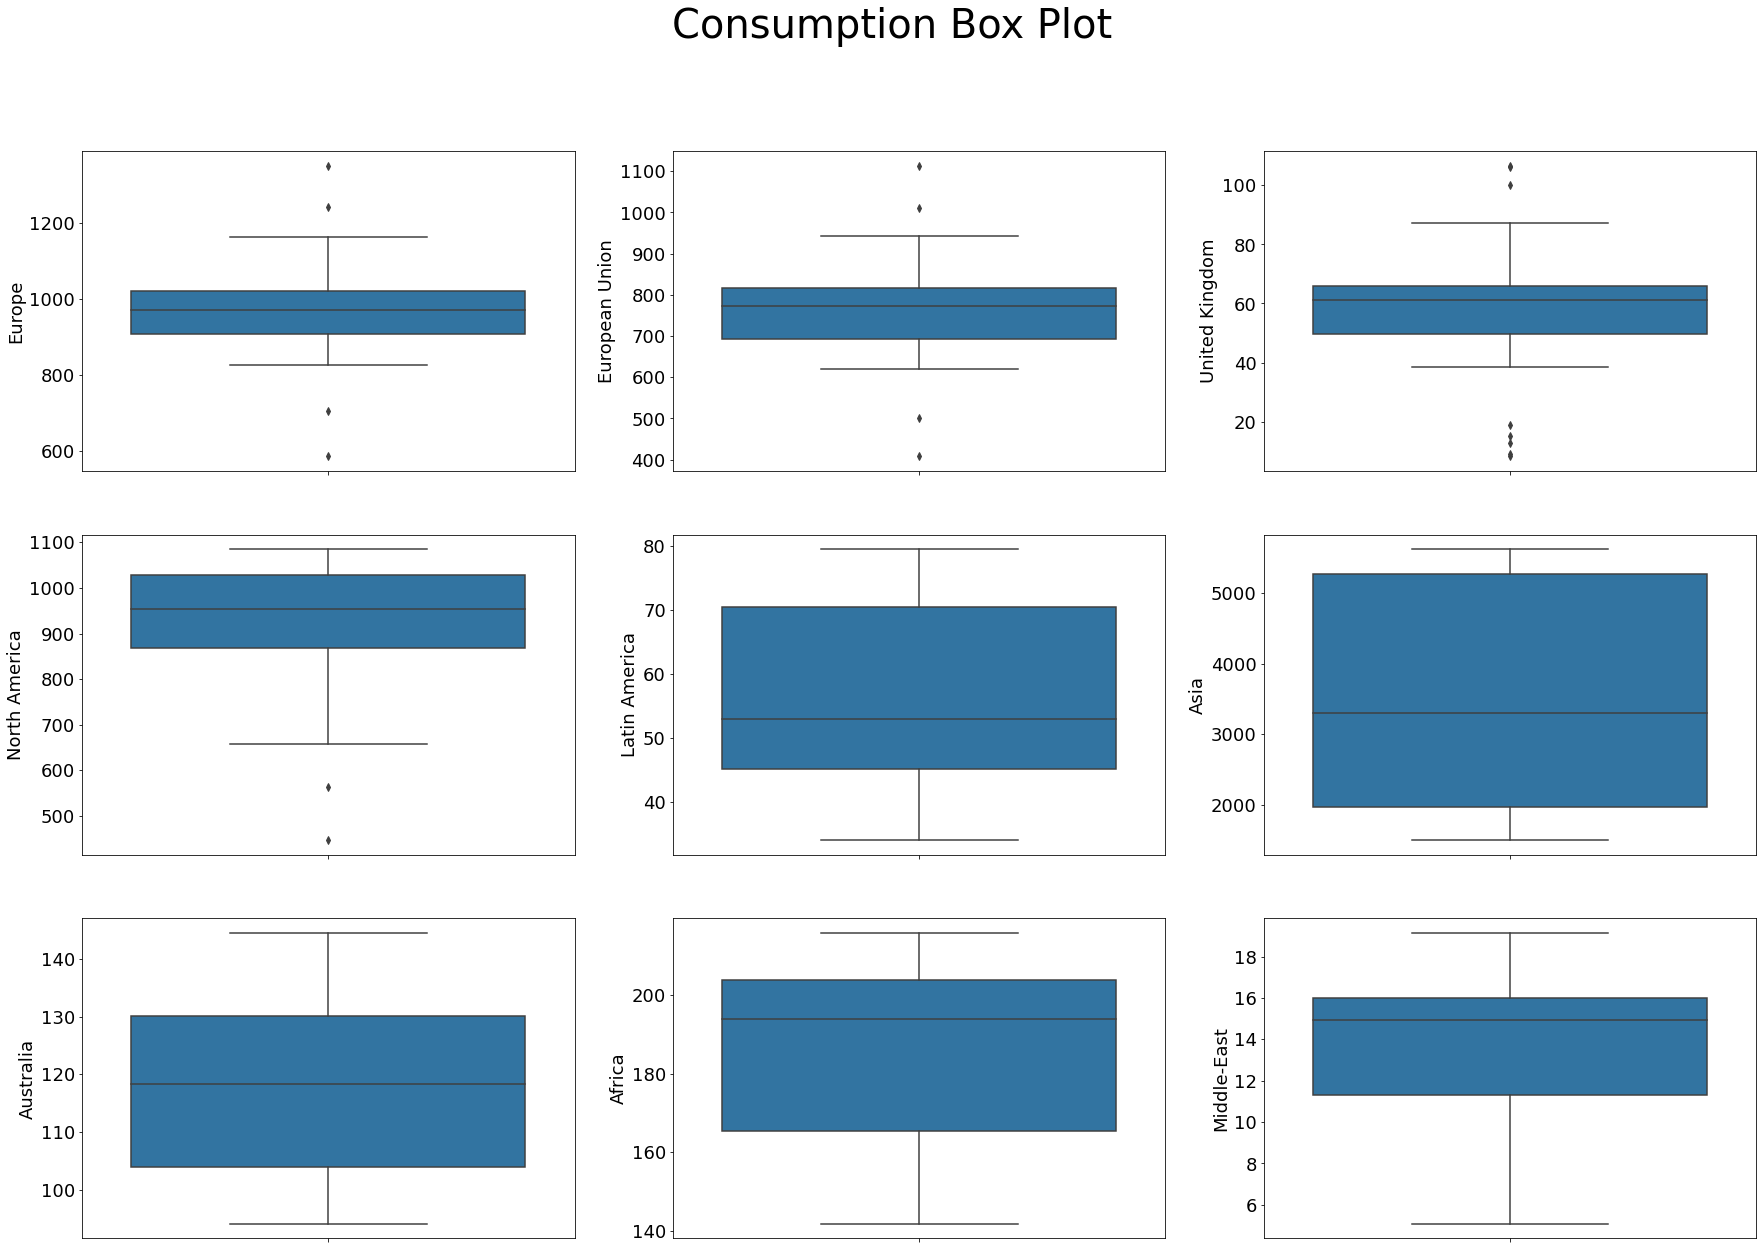

In [45]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(3,3, figsize=(30, 20))
sns.boxplot(y=df_large_regions2_T['Europe'], ax=ax[0,0])
sns.boxplot(y=df_large_regions2_T['European Union'], ax=ax[0,1])
sns.boxplot(y=df_large_regions2_T['United Kingdom'], ax=ax[0,2])
sns.boxplot(y=df_large_regions2_T['North America'], ax=ax[1,0])
sns.boxplot(y=df_large_regions2_T['Latin America'], ax=ax[1,1])
sns.boxplot(y=df_large_regions2_T['Asia'], ax=ax[1,2])
sns.boxplot(y=df_large_regions2_T['Australia'], ax=ax[2,0])
sns.boxplot(y=df_large_regions2_T['Africa'], ax=ax[2,1])
sns.boxplot(y=df_large_regions2_T['Middle-East'], ax=ax[2,2])
fig.suptitle("Consumption Box Plot", fontsize=40)
plt.show()

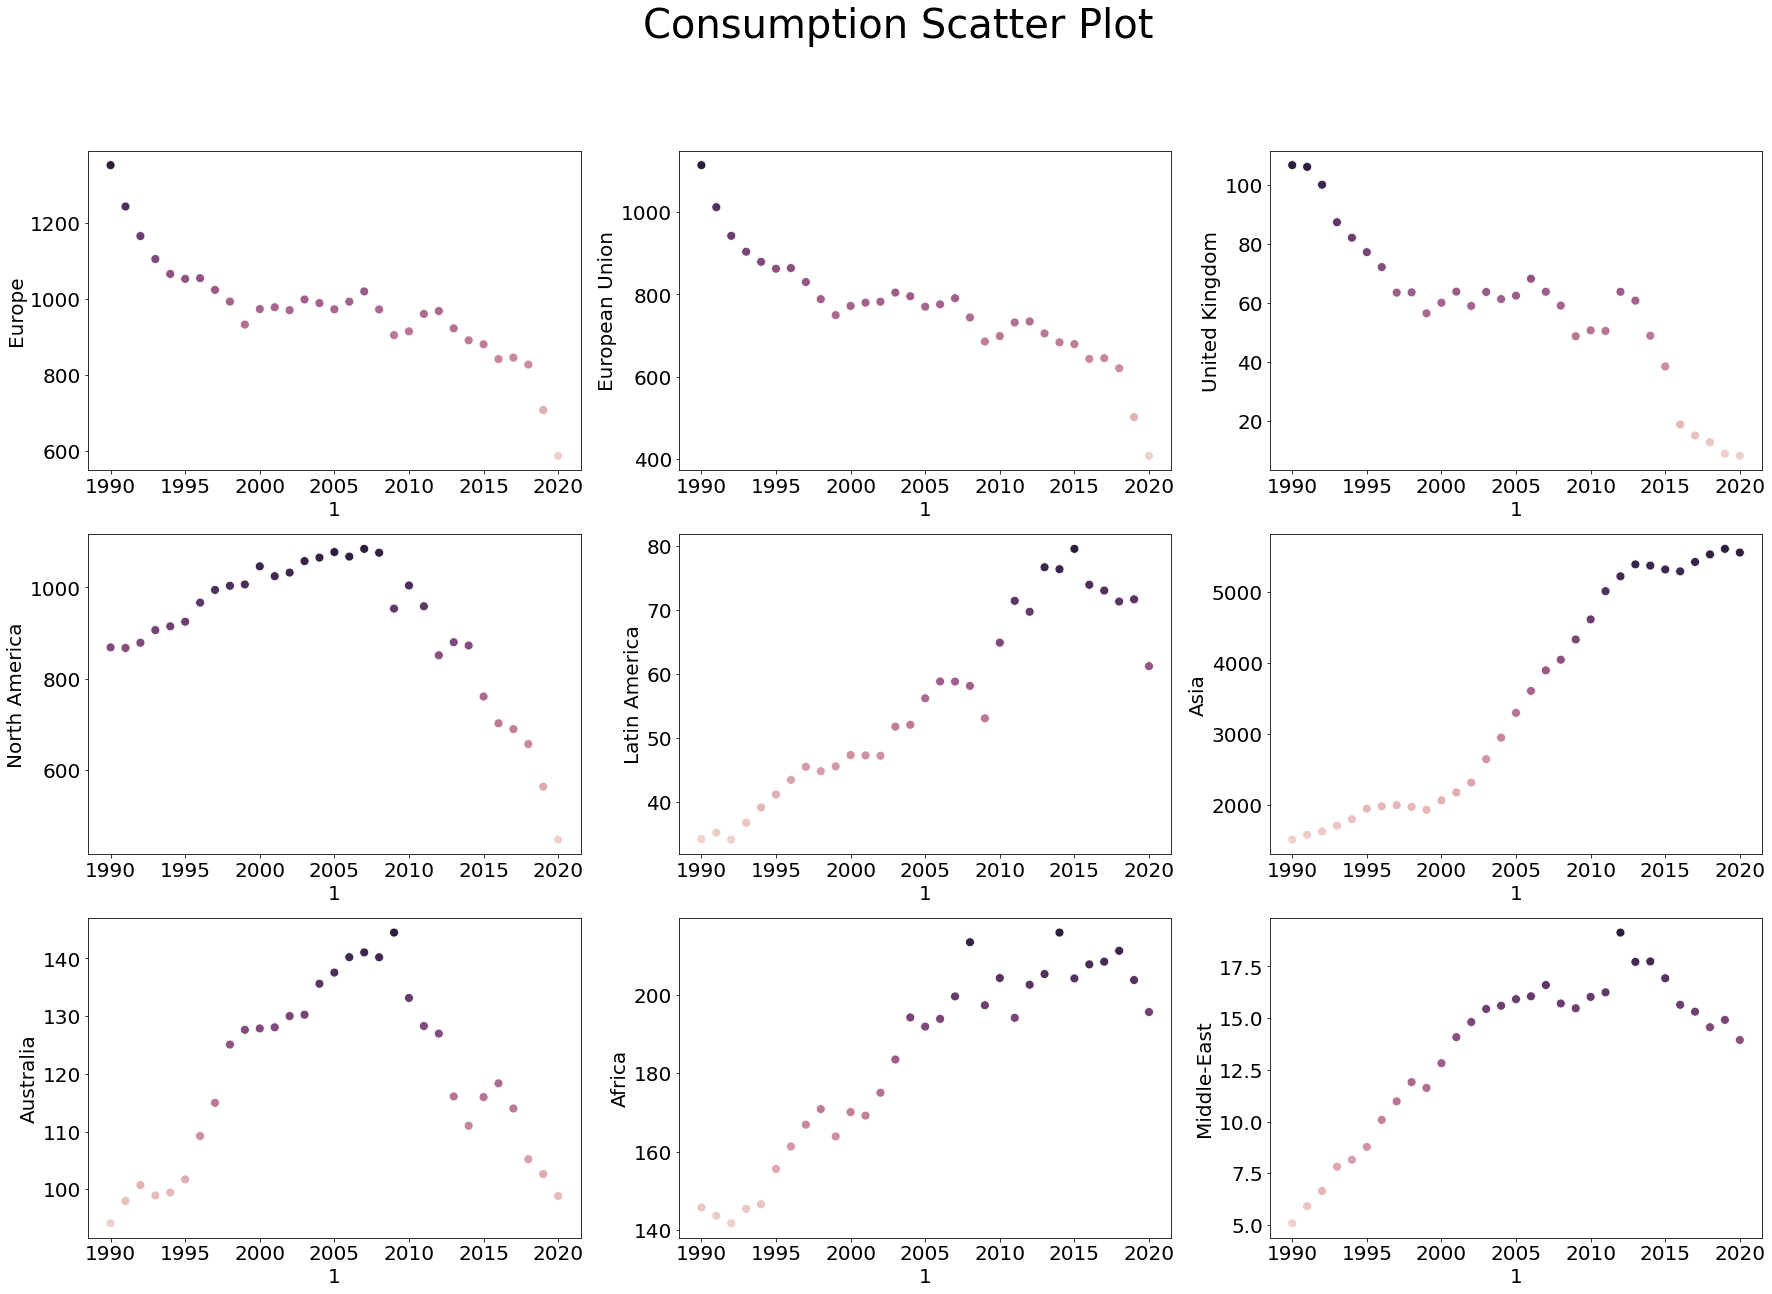

In [46]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(3,3, figsize=(30, 20))
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y="Europe", hue="Europe", s=80, legend=None, ax=ax[0,0])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='European Union',hue="European Union", s=80, legend=None, ax=ax[0,1])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='United Kingdom', hue="United Kingdom", s=80, legend=None,ax=ax[0,2])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='North America', hue="North America", s=80, legend=None,ax=ax[1,0])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='Latin America', hue="Latin America", s=80, legend=None,ax=ax[1,1])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='Asia', hue="Asia", s=80, legend=None,ax=ax[1,2])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='Australia', hue="Australia", s=80, legend=None,ax=ax[2,0])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='Africa', hue="Africa", s=80, legend=None,ax=ax[2,1])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='Middle-East', hue="Middle-East", s=80, legend=None,ax=ax[2,2])
fig.suptitle("Consumption Scatter Plot", fontsize=40)
plt.show()

In [48]:
df_large_regions2_per = df_large_regions2_per.drop(df_large_regions2_per.columns[:-2], axis=1)

In [49]:
df_large_regions2_per

1               2019 - 2020 (%)   2000 - 2020 (%/year) 
Region                                                 
Europe                -17.030090              -2.497419
European Union        -18.676545              -3.135167
United Kingdom         -8.280678              -9.452516
North America         -20.611736              -4.162716
Latin America         -14.558159               1.295998
Asia                   -0.927704               5.093713
Australia              -3.719128              -1.280622
Africa                 -3.995989               0.700473
Middle-East            -6.512744               0.420626

Text(0, 0.5, '% Change')

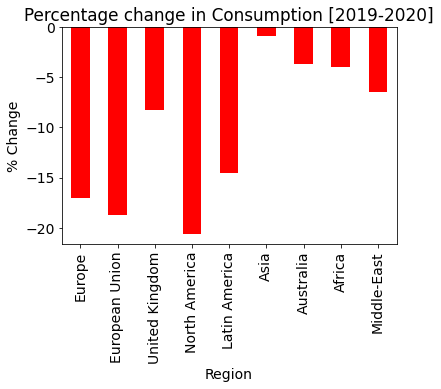

In [50]:
plt.rcParams.update({'font.size': 14})
df_large_regions2_per['2019 - 2020 (%) '].plot.bar(color=(df_large_regions2_per['2019 - 2020 (%) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Consumption [2019-2020]')
plt.ylabel('% Change')

Text(0, 0.5, '% Change')

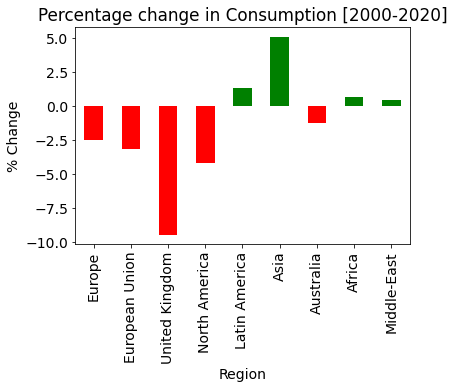

In [51]:
df_large_regions2_per['2000 - 2020 (%/year) '].plot.bar(color=(df_large_regions2_per['2000 - 2020 (%/year) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Consumption [2000-2020]')
plt.ylabel('% Change')

# <p style="line-height:1.4"><font face='Montserrat'>Univariate Time Series Prediction</font></p>

### <p style="line-height:1.4"><font face='Montserrat'>Based on the individual regions</font></p>

In [52]:
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### <h3 style="line-height:1.4"><font face='Montserrat'>Region Input</font></h3>

#### <p style="line-height:1.4"><font face='Montserrat'>Taking input of the region for Forecasting</font></p>

In [434]:
print("Please enter a region: ")
place = input()

Please enter a region: 
Middle-East


In [435]:
data = df_large_regions2_T.filter([place], axis=1)
data

Region  Middle-East
1                  
1990.0     5.084000
1991.0     5.910000
1992.0     6.645000
1993.0     7.820000
1994.0     8.155000
1995.0     8.777000
1996.0    10.082000
1997.0    10.976000
1998.0    11.906000
1999.0    11.627494
2000.0    12.821569
2001.0    14.080800
2002.0    14.813153
2003.0    15.445869
2004.0    15.601102
2005.0    15.916514
2006.0    16.056321
2007.0    16.600521
2008.0    15.708297
2009.0    15.479034
2010.0    16.028458
2011.0    16.247726
2012.0    19.136636
2013.0    17.720556
2014.0    17.741453
2015.0    16.928240
2016.0    15.646016
2017.0    15.313172
2018.0    14.562992
2019.0    14.915824
2020.0    13.944394

In [436]:
data2 = data.copy()
data2.index.names = [None]
data2.index = pd.to_numeric(data2.index, downcast='integer')
data2.index

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64')

In [437]:
data2.index.dtype

dtype('int64')

In [438]:
data2.index=pd.to_datetime(data2.index,format='%Y', errors='coerce')
data2

Region      Middle-East
1990-01-01     5.084000
1991-01-01     5.910000
1992-01-01     6.645000
1993-01-01     7.820000
1994-01-01     8.155000
1995-01-01     8.777000
1996-01-01    10.082000
1997-01-01    10.976000
1998-01-01    11.906000
1999-01-01    11.627494
2000-01-01    12.821569
2001-01-01    14.080800
2002-01-01    14.813153
2003-01-01    15.445869
2004-01-01    15.601102
2005-01-01    15.916514
2006-01-01    16.056321
2007-01-01    16.600521
2008-01-01    15.708297
2009-01-01    15.479034
2010-01-01    16.028458
2011-01-01    16.247726
2012-01-01    19.136636
2013-01-01    17.720556
2014-01-01    17.741453
2015-01-01    16.928240
2016-01-01    15.646016
2017-01-01    15.313172
2018-01-01    14.562992
2019-01-01    14.915824
2020-01-01    13.944394

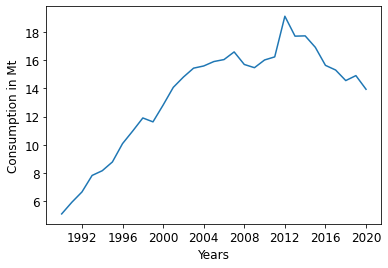

In [439]:
plt.rcParams.update({'font.size': 12})
plt.xlabel('Years')
plt.ylabel('Consumption in Mt')
plt.plot(data2[place])

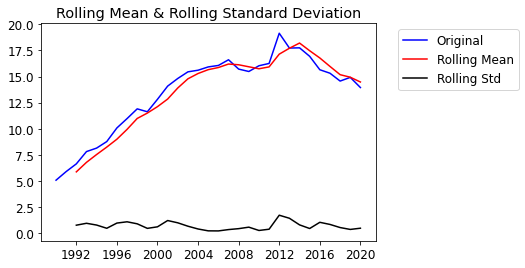

In [440]:
rolling_mean = data2.rolling(window = 3).mean()
rolling_std = data2.rolling(window = 3).std()
plt.plot(data2, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#### <p style="line-height:1.4"><font face='Montserrat'>Rolling Statistics: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).</font></p>
#### <p style="line-height:1.4"><font face='Montserrat'>Augmented Dickey-Fuller Test: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics</font></p>

### <p style="line-height:1.4"><font face='Montserrat'>ADF Statistic</font></p>
##### <p style="line-height:1.4"><font face='Montserrat'>This statistic helps us check if the ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.</font></p>

In [441]:
result = adfuller(data2[place])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.3454607664352616
p-value: 0.1577246978665528
Critical Values:
	1%: -3.7883858816542486
	5%: -3.013097747543462
	10%: -2.6463967573696143


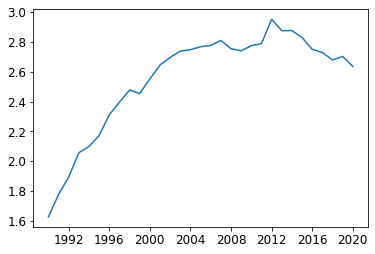

In [442]:
df_log = np.log(data2)
plt.plot(df_log)

In [350]:
def get_stationarity(timeseries, place):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries[place])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

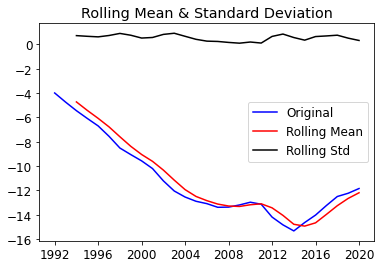

ADF Statistic: -2.4565081423414132
p-value: 0.1264180488778423
Critical Values:
	1%: -3.8326031418574136
	5%: -3.0312271701414204
	10%: -2.655519584487535


In [443]:
rolling_mean = data2.rolling(window=3).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean, place)

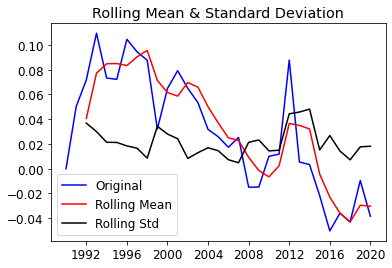

ADF Statistic: -1.0920310152996067
p-value: 0.7182393588030433
Critical Values:
	1%: -3.6790595944893187
	5%: -2.9678817237279103
	10%: -2.6231583472057074


In [444]:
rolling_mean_exp_decay = df_log.ewm(halflife=1, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay, place)

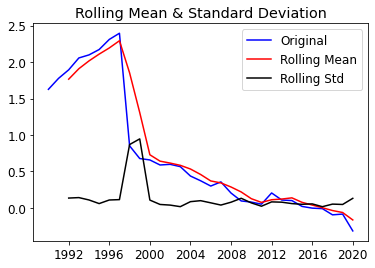

ADF Statistic: -1.0588503463153849
p-value: 0.7311999851267849
Critical Values:
	1%: -3.6790595944893187
	5%: -2.9678817237279103
	10%: -2.6231583472057074


In [445]:
df_log_shift = df_log - df_log.shift(periods=8, fill_value=0)
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift, place)

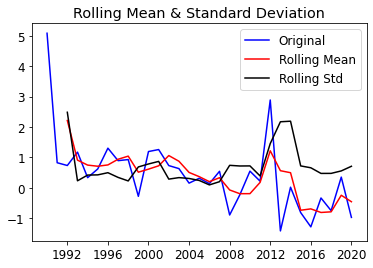

ADF Statistic: 0.27505741078790164
p-value: 0.9761707460460691
Critical Values:
	1%: -3.7883858816542486
	5%: -3.013097747543462
	10%: -2.6463967573696143


In [446]:
df_new1 = data2 - data2.shift(1, fill_value=0)
get_stationarity(df_new1, place)

In [447]:
# rolling_mean_exp_decay = df_log.ewm(halflife=1, min_periods=0, adjust=True).mean()
# data2['First Difference'] = df_log - rolling_mean_exp_decay

rolling_mean = data2.rolling(window=3).mean()
data2['First Difference'] = df_log - rolling_mean

# data2['First Difference'] = df_log - df_log.shift(periods=8, fill_value=0)

# data2['First Difference'] = data2.rolling(window = 3).mean()

# data2['First Difference'] = data2[place] - data2[place].shift(1, fill_value=0)

In [448]:
data2['First Difference']

1990-01-01          NaN
1991-01-01          NaN
1992-01-01    -3.985802
1993-01-01    -4.734982
1994-01-01    -5.441369
1995-01-01    -6.078532
1996-01-01    -6.693915
1997-01-01    -7.549289
1998-01-01    -8.510958
1999-01-01    -9.049792
2000-01-01    -9.567226
2001-01-01   -10.198476
2002-01-01   -11.209659
2003-01-01   -12.042599
2004-01-01   -12.539366
2005-01-01   -12.887138
2006-01-01   -13.081877
2007-01-01   -13.381685
2008-01-01   -13.367524
2009-01-01   -13.189798
2010-01-01   -12.964231
2011-01-01   -13.130453
2012-01-01   -14.186002
2013-01-01   -14.826914
2014-01-01   -15.323644
2015-01-01   -14.634433
2016-01-01   -14.021687
2017-01-01   -13.233762
2018-01-01   -12.495576
2019-01-01   -12.228240
2020-01-01   -11.839326
Name: First Difference, dtype: float64

In [449]:
adfuller(data2['First Difference'].dropna())

(-2.4565081423414132,
 0.1264180488778423,
 9,
 19,
 {'1%': -3.8326031418574136,
  '5%': -3.0312271701414204,
  '10%': -2.655519584487535},
 -6.176454983105792)

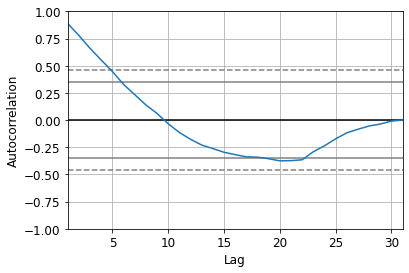

In [450]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data2[place])
plt.show()

<AxesSubplot:>

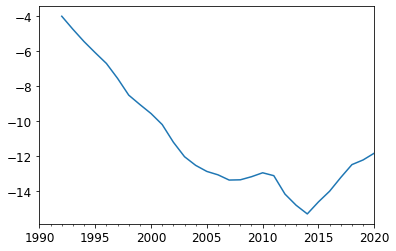

In [451]:
data2['First Difference'].plot()

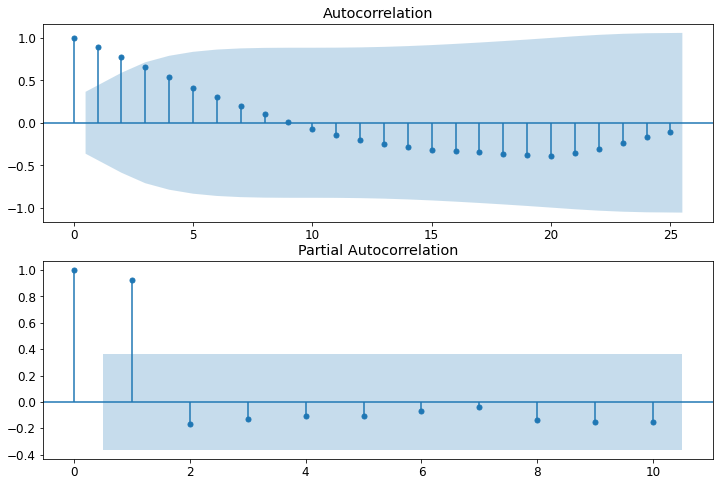

In [452]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data2['First Difference'].dropna(),lags=25,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data2['First Difference'].dropna(),lags=10,ax=ax2)

In [453]:
data2.index.dtype

dtype('<M8[ns]')

In [455]:
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data2[place],order=(2,1,2))
model_fit=model.fit()
model_fit.summary()

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Middle-East   No. Observations:                   30
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -36.852
Method:                       css-mle   S.D. of innovations              0.820
Date:                Wed, 10 Nov 2021   AIC                             85.704
Time:                        15:19:42   BIC                             94.111
Sample:                    01-01-1991   HQIC                            88.393
                         - 01-01-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2857      0.200      1.429      0.153      -0.106       0.677
ar.L1.D.Middle-East    -0.2483      0.635     -0.391      0.696      -1.492       0.995
ar.L2.D.Middle-East    -0.1361      0.431     -0.316      0.752      -0.980       0.708
ma.L1.D.Middle-East     0.3158      0.590      0.536      0.592      -0.840       1.471
ma.L2.D.Middle-East     0.5492      0.380      1.447      0.148      -0.195       1.293
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9124           -2.5528j            2.7110           -0.3046
AR.2           -0.9124           +2.5528j            2.7110            0.3046
MA.1           -0.2876           -1.3184j            1.3494           -0.2842
MA.2           -0.2876           +1.3184j            1.3494            0.2842
-----------------------------------------------------------------------------
"""

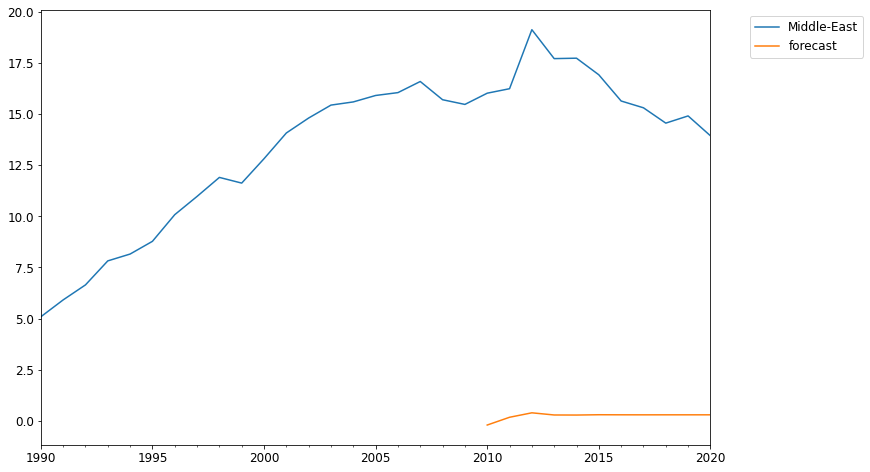

In [456]:
data2['forecast']=model_fit.predict(start=20, end=30, dynamic=True)
data2[[place,'forecast']].plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [457]:
data2

Region      Middle-East  First Difference  forecast
1990-01-01     5.084000               NaN       NaN
1991-01-01     5.910000               NaN       NaN
1992-01-01     6.645000         -3.985802       NaN
1993-01-01     7.820000         -4.734982       NaN
1994-01-01     8.155000         -5.441369       NaN
1995-01-01     8.777000         -6.078532       NaN
1996-01-01    10.082000         -6.693915       NaN
1997-01-01    10.976000         -7.549289       NaN
1998-01-01    11.906000         -8.510958       NaN
1999-01-01    11.627494         -9.049792       NaN
2000-01-01    12.821569         -9.567226       NaN
2001-01-01    14.080800        -10.198476       NaN
2002-01-01    14.813153        -11.209659       NaN
2003-01-01    15.445869        -12.042599       NaN
2004-01-01    15.601102        -12.539366       NaN
2005-01-01    15.916514        -12.887138       NaN
2006-01-01    16.056321        -13.081877       NaN
2007-01-01    16.600521        -13.381685       NaN
2008-01-01    15.708297        -13.367524       NaN
2009-01-01    15.479034        -13.189798       NaN
2010-01-01    16.028458        -12.964231 -0.214393
2011-01-01    16.247726        -13.130453  0.165557
2012-01-01    19.136636        -14.186002  0.383530
2013-01-01    17.720556        -14.826914  0.277707
2014-01-01    17.741453        -15.323644  0.274325
2015-01-01    16.928240        -14.634433  0.289564
2016-01-01    15.646016        -14.021687  0.286240
2017-01-01    15.313172        -13.233762  0.284992
2018-01-01    14.562992        -12.495576  0.285754
2019-01-01    14.915824        -12.228240  0.285734
2020-01-01    13.944394        -11.839326  0.285635

## <p style="line-height:1.4"><font face='Montserrat'>Remember to make changes to "order" based on autocorrelation and partial autocor/relation</font></p>

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimat

<AxesSubplot:>

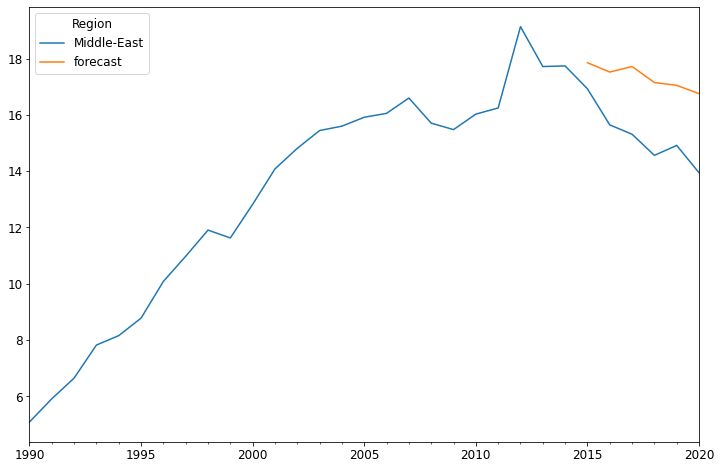

In [459]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data2[place],order=(2, 1, 2), seasonal_order=(2,1,2,12))
results=model.fit()
data2['forecast']=results.predict(start=25,end=30,dynamic=True)
data2[[place,'forecast']].plot(figsize=(12,8))

In [460]:
data2

Region      Middle-East  First Difference   forecast
1990-01-01     5.084000               NaN        NaN
1991-01-01     5.910000               NaN        NaN
1992-01-01     6.645000         -3.985802        NaN
1993-01-01     7.820000         -4.734982        NaN
1994-01-01     8.155000         -5.441369        NaN
1995-01-01     8.777000         -6.078532        NaN
1996-01-01    10.082000         -6.693915        NaN
1997-01-01    10.976000         -7.549289        NaN
1998-01-01    11.906000         -8.510958        NaN
1999-01-01    11.627494         -9.049792        NaN
2000-01-01    12.821569         -9.567226        NaN
2001-01-01    14.080800        -10.198476        NaN
2002-01-01    14.813153        -11.209659        NaN
2003-01-01    15.445869        -12.042599        NaN
2004-01-01    15.601102        -12.539366        NaN
2005-01-01    15.916514        -12.887138        NaN
2006-01-01    16.056321        -13.081877        NaN
2007-01-01    16.600521        -13.381685        NaN
2008-01-01    15.708297        -13.367524        NaN
2009-01-01    15.479034        -13.189798        NaN
2010-01-01    16.028458        -12.964231        NaN
2011-01-01    16.247726        -13.130453        NaN
2012-01-01    19.136636        -14.186002        NaN
2013-01-01    17.720556        -14.826914        NaN
2014-01-01    17.741453        -15.323644        NaN
2015-01-01    16.928240        -14.634433  17.855790
2016-01-01    15.646016        -14.021687  17.524315
2017-01-01    15.313172        -13.233762  17.720234
2018-01-01    14.562992        -12.495576  17.151378
2019-01-01    14.915824        -12.228240  17.051871
2020-01-01    13.944394        -11.839326  16.756579

In [461]:
future = np.arange(data.index[-1]+1, 2046,1)
print(future)
future = pd.to_numeric(future, downcast='integer')
print(future)
future_dates=pd.to_datetime(future,format='%Y', errors='coerce')
print(future_dates)

[2021. 2022. 2023. 2024. 2025. 2026. 2027. 2028. 2029. 2030. 2031. 2032.
 2033. 2034. 2035. 2036. 2037. 2038. 2039. 2040. 2041. 2042. 2043. 2044.
 2045.]
[2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034
 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045]
DatetimeIndex(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01',
               '2025-01-01', '2026-01-01', '2027-01-01', '2028-01-01',
               '2029-01-01', '2030-01-01', '2031-01-01', '2032-01-01',
               '2033-01-01', '2034-01-01', '2035-01-01', '2036-01-01',
               '2037-01-01', '2038-01-01', '2039-01-01', '2040-01-01',
               '2041-01-01', '2042-01-01', '2043-01-01', '2044-01-01',
               '2045-01-01'],
              dtype='datetime64[ns]', freq=None)


<AxesSubplot:>

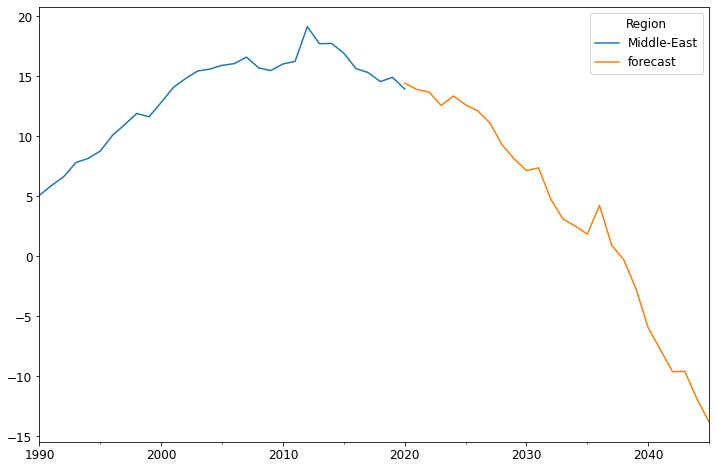

In [462]:
from pandas.tseries.offsets import DateOffset

future_datest_df=pd.DataFrame(index=future_dates[0:],columns=data2.columns)
future_datest_df.tail()
future_df=pd.concat([data2,future_datest_df])

future_df['forecast'] = results.predict(start = 30, end = 60, dynamic= True)
future_df[[place, 'forecast']].plot(figsize=(12, 8))

In [463]:
future_datest_df.tail()

Region     Middle-East First Difference forecast
2041-01-01         NaN              NaN      NaN
2042-01-01         NaN              NaN      NaN
2043-01-01         NaN              NaN      NaN
2044-01-01         NaN              NaN      NaN
2045-01-01         NaN              NaN      NaN

In [464]:
future_df

Region      Middle-East  First Difference   forecast
1990-01-01     5.084000               NaN        NaN
1991-01-01     5.910000               NaN        NaN
1992-01-01     6.645000         -3.985802        NaN
1993-01-01     7.820000         -4.734982        NaN
1994-01-01     8.155000         -5.441369        NaN
1995-01-01     8.777000         -6.078532        NaN
1996-01-01    10.082000         -6.693915        NaN
1997-01-01    10.976000         -7.549289        NaN
1998-01-01    11.906000         -8.510958        NaN
1999-01-01    11.627494         -9.049792        NaN
2000-01-01    12.821569         -9.567226        NaN
2001-01-01    14.080800        -10.198476        NaN
2002-01-01    14.813153        -11.209659        NaN
2003-01-01    15.445869        -12.042599        NaN
2004-01-01    15.601102        -12.539366        NaN
2005-01-01    15.916514        -12.887138        NaN
2006-01-01    16.056321        -13.081877        NaN
2007-01-01    16.600521        -13.381685        NaN
2008-01-01    15.708297        -13.367524        NaN
2009-01-01    15.479034        -13.189798        NaN
2010-01-01    16.028458        -12.964231        NaN
2011-01-01    16.247726        -13.130453        NaN
2012-01-01    19.136636        -14.186002        NaN
2013-01-01    17.720556        -14.826914        NaN
2014-01-01    17.741453        -15.323644        NaN
2015-01-01    16.928240        -14.634433        NaN
2016-01-01    15.646016        -14.021687        NaN
2017-01-01    15.313172        -13.233762        NaN
2018-01-01    14.562992        -12.495576        NaN
2019-01-01    14.915824        -12.228240        NaN
2020-01-01    13.944394        -11.839326  14.429781
2021-01-01          NaN               NaN  13.899179
2022-01-01          NaN               NaN  13.688864
2023-01-01          NaN               NaN  12.562171
2024-01-01          NaN               NaN  13.359978
2025-01-01          NaN               NaN  12.634518
2026-01-01          NaN               NaN  12.115515
2027-01-01          NaN               NaN  11.116332
2028-01-01          NaN               NaN   9.288069
2029-01-01          NaN               NaN   8.113396
2030-01-01          NaN               NaN   7.151762
2031-01-01          NaN               NaN   7.371384
2032-01-01          NaN               NaN   4.751478
2033-01-01          NaN               NaN   3.118073
2034-01-01          NaN               NaN   2.518137
2035-01-01          NaN               NaN   1.845015
2036-01-01          NaN               NaN   4.245887
2037-01-01          NaN               NaN   0.927534
2038-01-01          NaN               NaN  -0.298587
2039-01-01          NaN               NaN  -2.711882
2040-01-01          NaN               NaN  -5.953291
2041-01-01          NaN               NaN  -7.778837
2042-01-01          NaN               NaN  -9.614960
2043-01-01          NaN               NaN  -9.588357
2044-01-01          NaN               NaN -11.859062
2045-01-01          NaN               NaN -13.810679

In [188]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [465]:
true = data2[place].loc[(data2.index > '2014-01-01') & (data2.index <= '2021-01-01')]
pred = data2['forecast'].loc[(data2.index > '2014-01-01') & (data2.index <= '2021-01-01')]
print("\n\nPredictions are off by: {}%".format(mean_absolute_percentage_error(true, pred)))
print("\n\n",true,"\n\n",pred)



Predictions are off by: 14.244118833123872%


 2015-01-01    16.928240
2016-01-01    15.646016
2017-01-01    15.313172
2018-01-01    14.562992
2019-01-01    14.915824
2020-01-01    13.944394
Name: Middle-East, dtype: float64 

 2015-01-01    17.855790
2016-01-01    17.524315
2017-01-01    17.720234
2018-01-01    17.151378
2019-01-01    17.051871
2020-01-01    16.756579
Name: forecast, dtype: float64


# For Associations

In [124]:
df_assoc

1 Region       1990.0       1991.0       1992.0       1993.0       1994.0  \
0  World  4665.270216  4583.369359  4531.347710  4511.045899  4513.215489   
1   OECD  2334.307792  2248.659876  2182.300053  2157.945177  2150.652107   
2     G7  1599.553542  1518.817582  1476.398159  1463.367441  1454.338738   
3  BRICS  1760.786720  1801.582347  1829.946257  1859.980934  1918.809454   

1       1995.0       1996.0       1997.0       1998.0       1999.0  \
0  4659.157161  4722.178375  4706.297878  4667.073308  4566.473025   
1  2149.349649  2213.607453  2226.785885  2212.308354  2189.682550   
2  1452.297106  1489.862321  1497.107400  1489.999269  1480.356209   
3  2070.619920  2096.348355  2075.147676  2050.827136  1989.753842   

1       2000.0       2001.0       2002.0       2003.0       2004.0  \
0  4794.303577  4879.644644  5026.368656  5441.840272  5750.984234   
1  2277.367473  2267.863256  2276.774664  2337.095011  2346.520342   
2  1541.394839  1530.687131  1546.071202  1586.274510  1596.315537   
3  2090.842228  2169.451917  2295.973961  2607.105858  2902.664565   

1       2005.0       2006.0       2007.0       2008.0       2009.0  \
0  6100.755565  6445.770703  6783.015332  6918.962110  6953.849353   
1  2362.936100  2371.635201  2424.494268  2367.900663  2186.426823   
2  1608.019591  1602.289267  1631.945813  1596.688430  1434.123077   
3  3224.569276  3528.349960  3781.431345  3959.338081  4211.143595   

1       2010.0       2011.0       2012.0       2013.0       2014.0  \
0  7324.825274  7737.299736  7871.178678  7995.490614  7921.585718   
1  2267.964844  2250.632114  2172.117873  2164.504425  2128.365615   
2  1511.093994  1464.982238  1392.562467  1427.096481  1393.399662   
3  4463.053655  4839.794824  5057.194284  5209.068627  5164.101711   

1       2015.0       2016.0       2017.0       2018.0       2019.0  \
0  7733.457884  7606.043758  7724.293627  7792.358976  7644.214490   
1  2002.471531  1906.671815  1893.422529  1832.263743  1610.954275   
2  1267.164714  1176.102660  1150.902729  1100.890428   946.623481   
3  5092.479636  5032.890709  5131.577588  5220.310818  5251.313328   

1       2020.0  2019 - 2020 (%)   2000 - 2020 (%/year)   
0  7305.633140         -4.429250               2.128421  
1  1355.351126        -15.866568              -2.561422  
2   780.408464        -17.558725              -3.345873  
3  5202.035822         -0.938384               4.662861

In [125]:
df_assoc2 = df_assoc.copy()
df_assoc2

1 Region       1990.0       1991.0       1992.0       1993.0       1994.0  \
0  World  4665.270216  4583.369359  4531.347710  4511.045899  4513.215489   
1   OECD  2334.307792  2248.659876  2182.300053  2157.945177  2150.652107   
2     G7  1599.553542  1518.817582  1476.398159  1463.367441  1454.338738   
3  BRICS  1760.786720  1801.582347  1829.946257  1859.980934  1918.809454   

1       1995.0       1996.0       1997.0       1998.0       1999.0  \
0  4659.157161  4722.178375  4706.297878  4667.073308  4566.473025   
1  2149.349649  2213.607453  2226.785885  2212.308354  2189.682550   
2  1452.297106  1489.862321  1497.107400  1489.999269  1480.356209   
3  2070.619920  2096.348355  2075.147676  2050.827136  1989.753842   

1       2000.0       2001.0       2002.0       2003.0       2004.0  \
0  4794.303577  4879.644644  5026.368656  5441.840272  5750.984234   
1  2277.367473  2267.863256  2276.774664  2337.095011  2346.520342   
2  1541.394839  1530.687131  1546.071202  1586.274510  1596.315537   
3  2090.842228  2169.451917  2295.973961  2607.105858  2902.664565   

1       2005.0       2006.0       2007.0       2008.0       2009.0  \
0  6100.755565  6445.770703  6783.015332  6918.962110  6953.849353   
1  2362.936100  2371.635201  2424.494268  2367.900663  2186.426823   
2  1608.019591  1602.289267  1631.945813  1596.688430  1434.123077   
3  3224.569276  3528.349960  3781.431345  3959.338081  4211.143595   

1       2010.0       2011.0       2012.0       2013.0       2014.0  \
0  7324.825274  7737.299736  7871.178678  7995.490614  7921.585718   
1  2267.964844  2250.632114  2172.117873  2164.504425  2128.365615   
2  1511.093994  1464.982238  1392.562467  1427.096481  1393.399662   
3  4463.053655  4839.794824  5057.194284  5209.068627  5164.101711   

1       2015.0       2016.0       2017.0       2018.0       2019.0  \
0  7733.457884  7606.043758  7724.293627  7792.358976  7644.214490   
1  2002.471531  1906.671815  1893.422529  1832.263743  1610.954275   
2  1267.164714  1176.102660  1150.902729  1100.890428   946.623481   
3  5092.479636  5032.890709  5131.577588  5220.310818  5251.313328   

1       2020.0  2019 - 2020 (%)   2000 - 2020 (%/year)   
0  7305.633140         -4.429250               2.128421  
1  1355.351126        -15.866568              -2.561422  
2   780.408464        -17.558725              -3.345873  
3  5202.035822         -0.938384               4.662861

In [126]:
df_assoc2.set_index('Region', inplace=True)
df_assoc2

1            1990.0       1991.0       1992.0       1993.0       1994.0  \
Region                                                                    
World   4665.270216  4583.369359  4531.347710  4511.045899  4513.215489   
OECD    2334.307792  2248.659876  2182.300053  2157.945177  2150.652107   
G7      1599.553542  1518.817582  1476.398159  1463.367441  1454.338738   
BRICS   1760.786720  1801.582347  1829.946257  1859.980934  1918.809454   

1            1995.0       1996.0       1997.0       1998.0       1999.0  \
Region                                                                    
World   4659.157161  4722.178375  4706.297878  4667.073308  4566.473025   
OECD    2149.349649  2213.607453  2226.785885  2212.308354  2189.682550   
G7      1452.297106  1489.862321  1497.107400  1489.999269  1480.356209   
BRICS   2070.619920  2096.348355  2075.147676  2050.827136  1989.753842   

1            2000.0       2001.0       2002.0       2003.0       2004.0  \
Region                                                                    
World   4794.303577  4879.644644  5026.368656  5441.840272  5750.984234   
OECD    2277.367473  2267.863256  2276.774664  2337.095011  2346.520342   
G7      1541.394839  1530.687131  1546.071202  1586.274510  1596.315537   
BRICS   2090.842228  2169.451917  2295.973961  2607.105858  2902.664565   

1            2005.0       2006.0       2007.0       2008.0       2009.0  \
Region                                                                    
World   6100.755565  6445.770703  6783.015332  6918.962110  6953.849353   
OECD    2362.936100  2371.635201  2424.494268  2367.900663  2186.426823   
G7      1608.019591  1602.289267  1631.945813  1596.688430  1434.123077   
BRICS   3224.569276  3528.349960  3781.431345  3959.338081  4211.143595   

1            2010.0       2011.0       2012.0       2013.0       2014.0  \
Region                                                                    
World   7324.825274  7737.299736  7871.178678  7995.490614  7921.585718   
OECD    2267.964844  2250.632114  2172.117873  2164.504425  2128.365615   
G7      1511.093994  1464.982238  1392.562467  1427.096481  1393.399662   
BRICS   4463.053655  4839.794824  5057.194284  5209.068627  5164.101711   

1            2015.0       2016.0       2017.0       2018.0       2019.0  \
Region                                                                    
World   7733.457884  7606.043758  7724.293627  7792.358976  7644.214490   
OECD    2002.471531  1906.671815  1893.422529  1832.263743  1610.954275   
G7      1267.164714  1176.102660  1150.902729  1100.890428   946.623481   
BRICS   5092.479636  5032.890709  5131.577588  5220.310818  5251.313328   

1            2020.0  2019 - 2020 (%)   2000 - 2020 (%/year)   
Region                                                        
World   7305.633140         -4.429250               2.128421  
OECD    1355.351126        -15.866568              -2.561422  
G7       780.408464        -17.558725              -3.345873  
BRICS   5202.035822         -0.938384               4.662861

In [127]:
plt.rcParams.update({'font.size': 12})

<AxesSubplot:xlabel='1', ylabel='Region'>

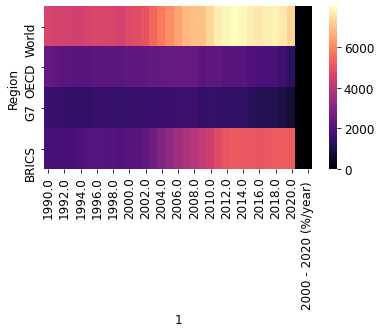

In [128]:
plt.figure(figsize=(6,3))
sns.heatmap(df_assoc2, cmap="magma")

In [129]:
df_assoc2_T = df_assoc2.T
df_assoc2_T

Region                       World         OECD           G7        BRICS
1                                                                        
1990.0                 4665.270216  2334.307792  1599.553542  1760.786720
1991.0                 4583.369359  2248.659876  1518.817582  1801.582347
1992.0                 4531.347710  2182.300053  1476.398159  1829.946257
1993.0                 4511.045899  2157.945177  1463.367441  1859.980934
1994.0                 4513.215489  2150.652107  1454.338738  1918.809454
1995.0                 4659.157161  2149.349649  1452.297106  2070.619920
1996.0                 4722.178375  2213.607453  1489.862321  2096.348355
1997.0                 4706.297878  2226.785885  1497.107400  2075.147676
1998.0                 4667.073308  2212.308354  1489.999269  2050.827136
1999.0                 4566.473025  2189.682550  1480.356209  1989.753842
2000.0                 4794.303577  2277.367473  1541.394839  2090.842228
2001.0                 4879.644644  2267.863256  1530.687131  2169.451917
2002.0                 5026.368656  2276.774664  1546.071202  2295.973961
2003.0                 5441.840272  2337.095011  1586.274510  2607.105858
2004.0                 5750.984234  2346.520342  1596.315537  2902.664565
2005.0                 6100.755565  2362.936100  1608.019591  3224.569276
2006.0                 6445.770703  2371.635201  1602.289267  3528.349960
2007.0                 6783.015332  2424.494268  1631.945813  3781.431345
2008.0                 6918.962110  2367.900663  1596.688430  3959.338081
2009.0                 6953.849353  2186.426823  1434.123077  4211.143595
2010.0                 7324.825274  2267.964844  1511.093994  4463.053655
2011.0                 7737.299736  2250.632114  1464.982238  4839.794824
2012.0                 7871.178678  2172.117873  1392.562467  5057.194284
2013.0                 7995.490614  2164.504425  1427.096481  5209.068627
2014.0                 7921.585718  2128.365615  1393.399662  5164.101711
2015.0                 7733.457884  2002.471531  1267.164714  5092.479636
2016.0                 7606.043758  1906.671815  1176.102660  5032.890709
2017.0                 7724.293627  1893.422529  1150.902729  5131.577588
2018.0                 7792.358976  1832.263743  1100.890428  5220.310818
2019.0                 7644.214490  1610.954275   946.623481  5251.313328
2020.0                 7305.633140  1355.351126   780.408464  5202.035822
2019 - 2020 (%)          -4.429250   -15.866568   -17.558725    -0.938384
2000 - 2020 (%/year)      2.128421    -2.561422    -3.345873     4.662861

In [130]:
df_assoc2_T.drop(df_assoc2_T.tail(2).index,inplace=True)
df_assoc2_T

Region        World         OECD           G7        BRICS
1                                                         
1990.0  4665.270216  2334.307792  1599.553542  1760.786720
1991.0  4583.369359  2248.659876  1518.817582  1801.582347
1992.0  4531.347710  2182.300053  1476.398159  1829.946257
1993.0  4511.045899  2157.945177  1463.367441  1859.980934
1994.0  4513.215489  2150.652107  1454.338738  1918.809454
1995.0  4659.157161  2149.349649  1452.297106  2070.619920
1996.0  4722.178375  2213.607453  1489.862321  2096.348355
1997.0  4706.297878  2226.785885  1497.107400  2075.147676
1998.0  4667.073308  2212.308354  1489.999269  2050.827136
1999.0  4566.473025  2189.682550  1480.356209  1989.753842
2000.0  4794.303577  2277.367473  1541.394839  2090.842228
2001.0  4879.644644  2267.863256  1530.687131  2169.451917
2002.0  5026.368656  2276.774664  1546.071202  2295.973961
2003.0  5441.840272  2337.095011  1586.274510  2607.105858
2004.0  5750.984234  2346.520342  1596.315537  2902.664565
2005.0  6100.755565  2362.936100  1608.019591  3224.569276
2006.0  6445.770703  2371.635201  1602.289267  3528.349960
2007.0  6783.015332  2424.494268  1631.945813  3781.431345
2008.0  6918.962110  2367.900663  1596.688430  3959.338081
2009.0  6953.849353  2186.426823  1434.123077  4211.143595
2010.0  7324.825274  2267.964844  1511.093994  4463.053655
2011.0  7737.299736  2250.632114  1464.982238  4839.794824
2012.0  7871.178678  2172.117873  1392.562467  5057.194284
2013.0  7995.490614  2164.504425  1427.096481  5209.068627
2014.0  7921.585718  2128.365615  1393.399662  5164.101711
2015.0  7733.457884  2002.471531  1267.164714  5092.479636
2016.0  7606.043758  1906.671815  1176.102660  5032.890709
2017.0  7724.293627  1893.422529  1150.902729  5131.577588
2018.0  7792.358976  1832.263743  1100.890428  5220.310818
2019.0  7644.214490  1610.954275   946.623481  5251.313328
2020.0  7305.633140  1355.351126   780.408464  5202.035822

Text(0, 0.5, 'Consumption in Mt')

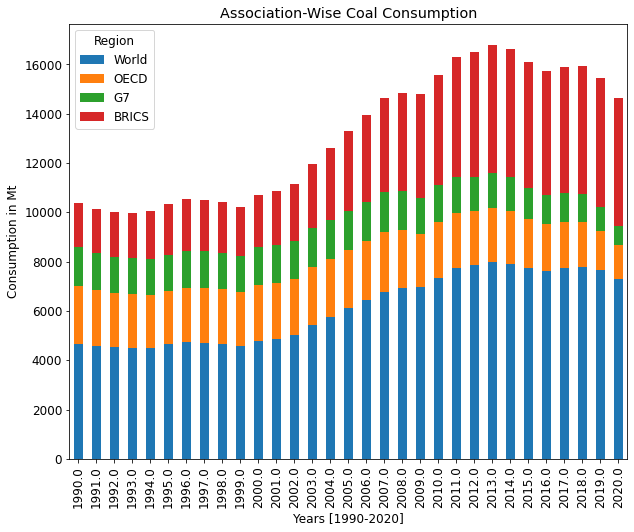

In [131]:
plt.rcParams.update({'font.size': 12})
df_assoc2_T.plot(kind="bar",stacked=True,figsize=(10,8))
plt.title("Association-Wise Coal Consumption")
plt.xlabel("Years [1990-2020]")
plt.ylabel("Consumption in Mt")

In [132]:
corr_assoc_regions = df_assoc2_T.corr()
corr_assoc_regions

Region     World      OECD        G7     BRICS
Region                                        
World   1.000000 -0.418663 -0.513590  0.991691
OECD   -0.418663  1.000000  0.991593 -0.528491
G7     -0.513590  0.991593  1.000000 -0.615806
BRICS   0.991691 -0.528491 -0.615806  1.000000

<AxesSubplot:xlabel='Region', ylabel='Region'>

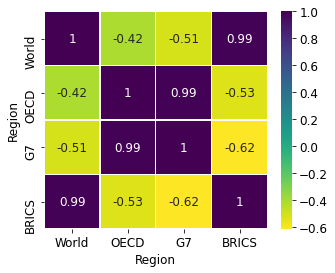

In [133]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(5, 4))
sns.heatmap(corr_assoc_regions, cmap='viridis_r', linewidths=0.4, annot=True)

In [134]:
df_assoc2_per = df_assoc2.copy()
df_assoc2_per

1            1990.0       1991.0       1992.0       1993.0       1994.0  \
Region                                                                    
World   4665.270216  4583.369359  4531.347710  4511.045899  4513.215489   
OECD    2334.307792  2248.659876  2182.300053  2157.945177  2150.652107   
G7      1599.553542  1518.817582  1476.398159  1463.367441  1454.338738   
BRICS   1760.786720  1801.582347  1829.946257  1859.980934  1918.809454   

1            1995.0       1996.0       1997.0       1998.0       1999.0  \
Region                                                                    
World   4659.157161  4722.178375  4706.297878  4667.073308  4566.473025   
OECD    2149.349649  2213.607453  2226.785885  2212.308354  2189.682550   
G7      1452.297106  1489.862321  1497.107400  1489.999269  1480.356209   
BRICS   2070.619920  2096.348355  2075.147676  2050.827136  1989.753842   

1            2000.0       2001.0       2002.0       2003.0       2004.0  \
Region                                                                    
World   4794.303577  4879.644644  5026.368656  5441.840272  5750.984234   
OECD    2277.367473  2267.863256  2276.774664  2337.095011  2346.520342   
G7      1541.394839  1530.687131  1546.071202  1586.274510  1596.315537   
BRICS   2090.842228  2169.451917  2295.973961  2607.105858  2902.664565   

1            2005.0       2006.0       2007.0       2008.0       2009.0  \
Region                                                                    
World   6100.755565  6445.770703  6783.015332  6918.962110  6953.849353   
OECD    2362.936100  2371.635201  2424.494268  2367.900663  2186.426823   
G7      1608.019591  1602.289267  1631.945813  1596.688430  1434.123077   
BRICS   3224.569276  3528.349960  3781.431345  3959.338081  4211.143595   

1            2010.0       2011.0       2012.0       2013.0       2014.0  \
Region                                                                    
World   7324.825274  7737.299736  7871.178678  7995.490614  7921.585718   
OECD    2267.964844  2250.632114  2172.117873  2164.504425  2128.365615   
G7      1511.093994  1464.982238  1392.562467  1427.096481  1393.399662   
BRICS   4463.053655  4839.794824  5057.194284  5209.068627  5164.101711   

1            2015.0       2016.0       2017.0       2018.0       2019.0  \
Region                                                                    
World   7733.457884  7606.043758  7724.293627  7792.358976  7644.214490   
OECD    2002.471531  1906.671815  1893.422529  1832.263743  1610.954275   
G7      1267.164714  1176.102660  1150.902729  1100.890428   946.623481   
BRICS   5092.479636  5032.890709  5131.577588  5220.310818  5251.313328   

1            2020.0  2019 - 2020 (%)   2000 - 2020 (%/year)   
Region                                                        
World   7305.633140         -4.429250               2.128421  
OECD    1355.351126        -15.866568              -2.561422  
G7       780.408464        -17.558725              -3.345873  
BRICS   5202.035822         -0.938384               4.662861

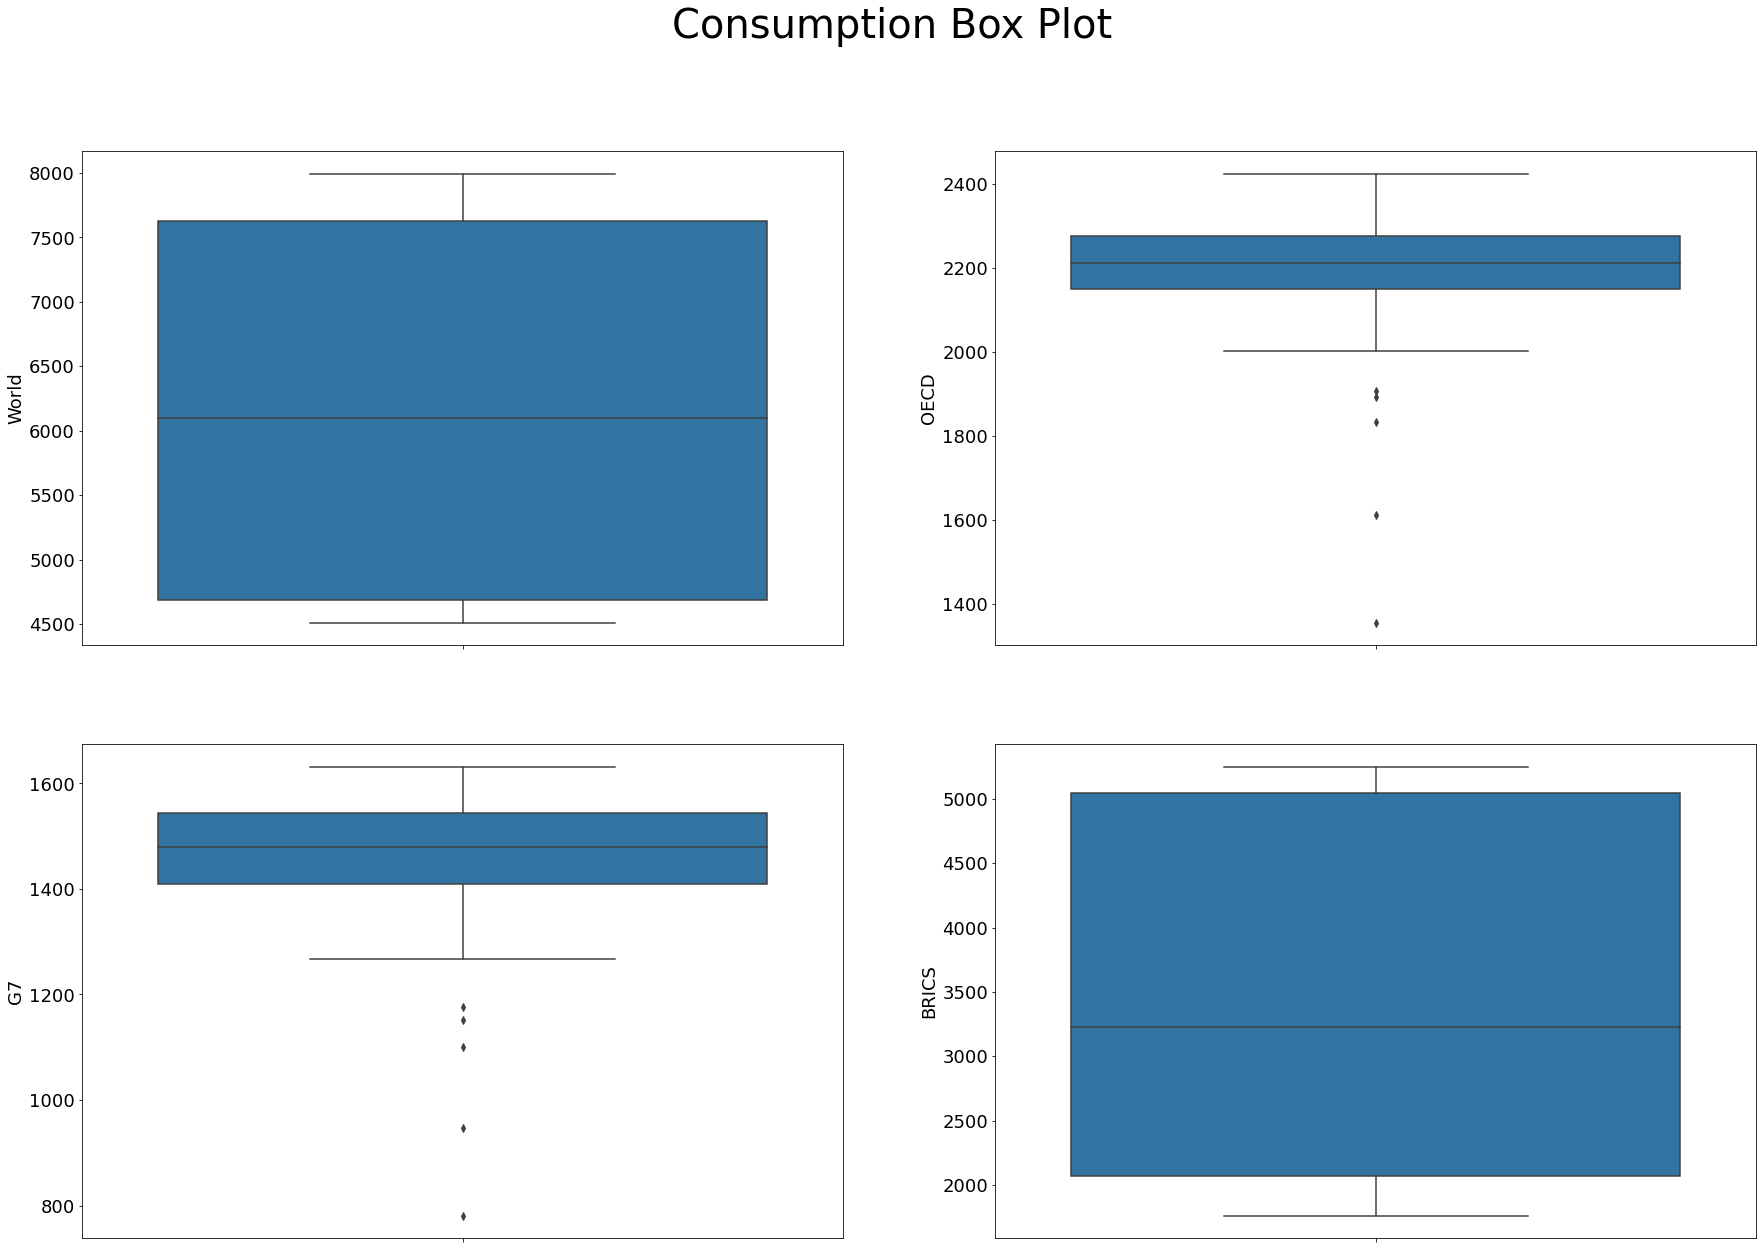

In [135]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(2,2, figsize=(30, 20))
sns.boxplot(y=df_assoc2_T['World'], ax=ax[0,0])
sns.boxplot(y=df_assoc2_T['OECD'], ax=ax[0,1])
sns.boxplot(y=df_assoc2_T['G7'], ax=ax[1,0])
sns.boxplot(y=df_assoc2_T['BRICS'], ax=ax[1,1])
fig.suptitle("Consumption Box Plot", fontsize=40)
plt.show()

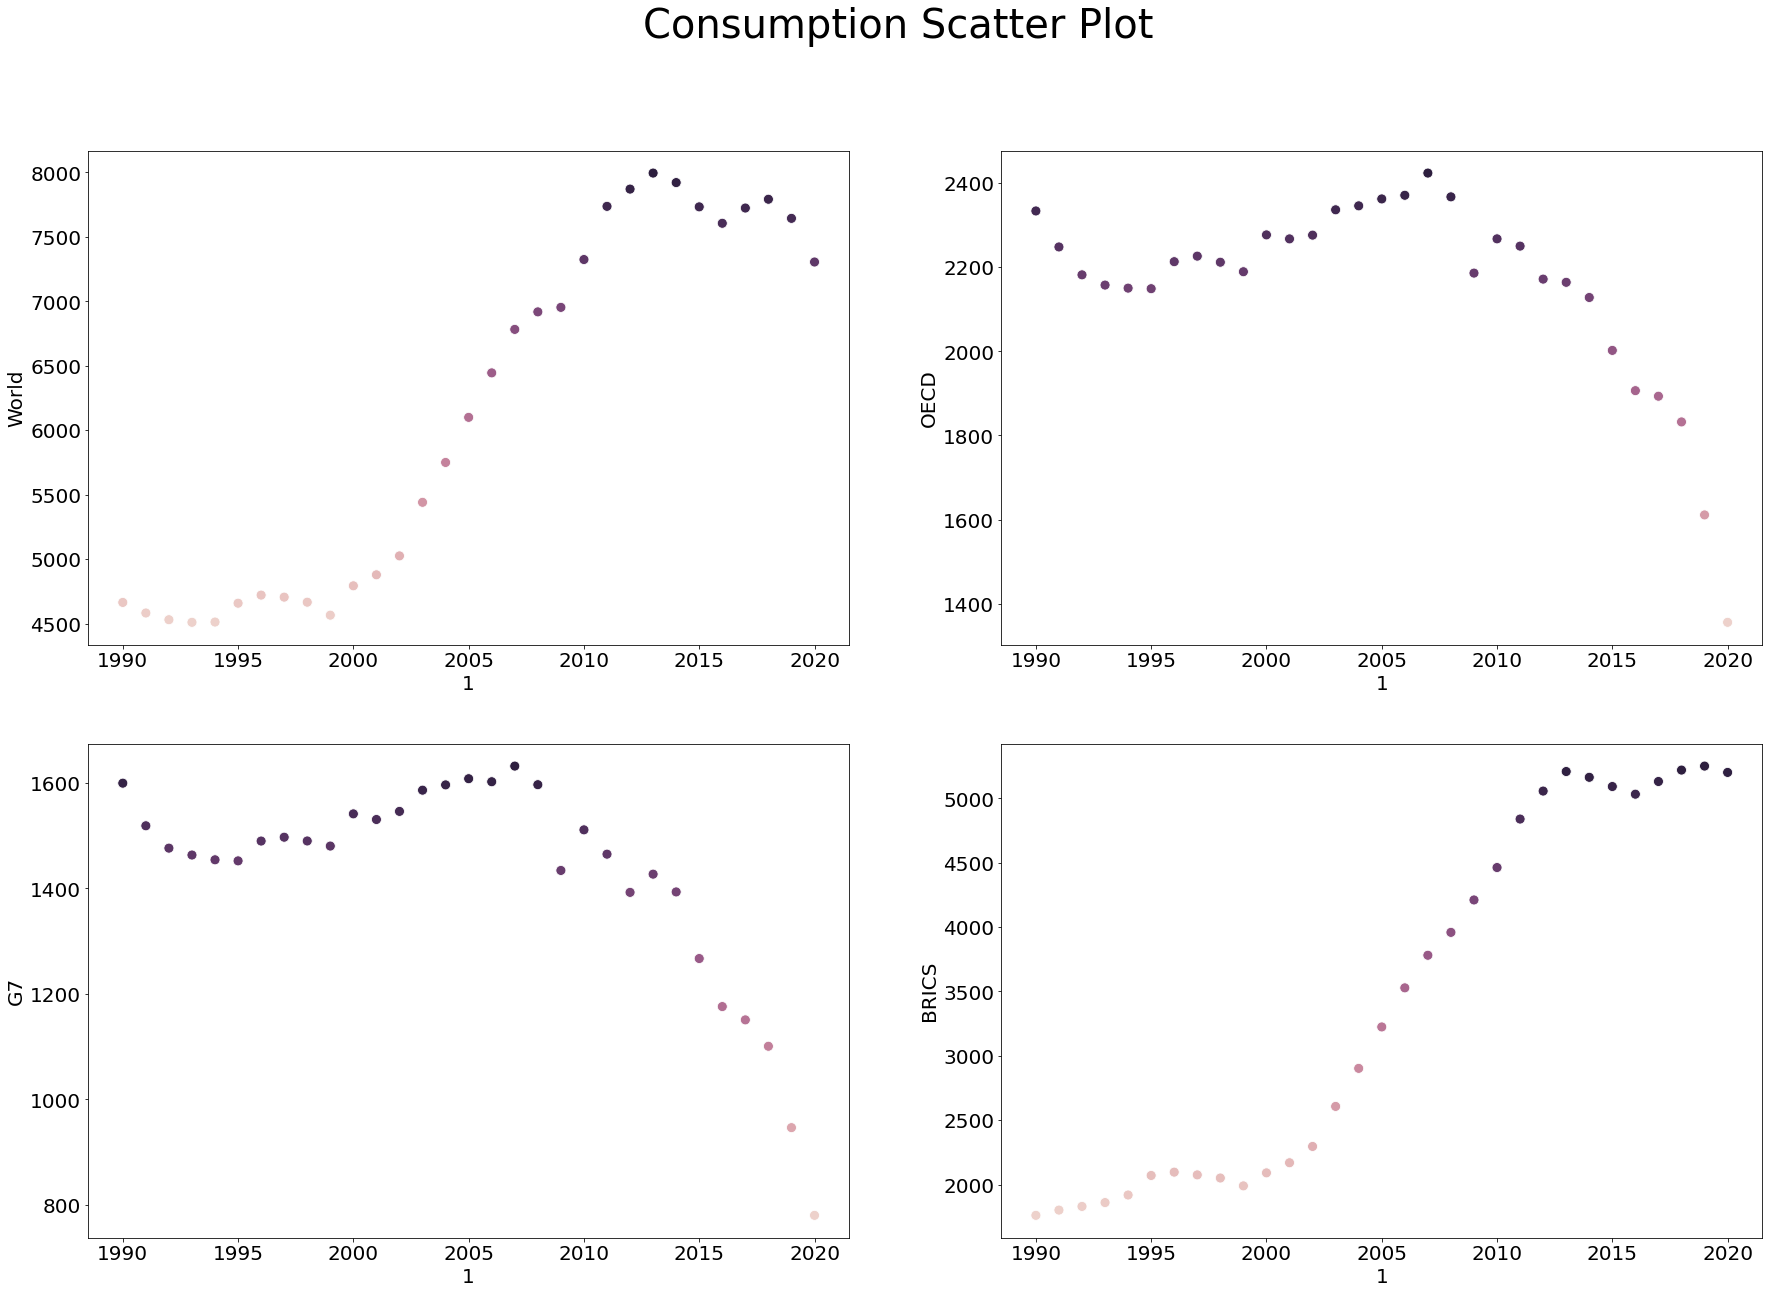

In [136]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(2,2, figsize=(30, 20))
sns.scatterplot(data=df_assoc2_T, x=df_large_regions2_T.index, y="World", hue="World", s=100, legend=None, ax=ax[0,0])
sns.scatterplot(data=df_assoc2_T, x=df_large_regions2_T.index, y='OECD',hue="OECD", s=100, legend=None, ax=ax[0,1])
sns.scatterplot(data=df_assoc2_T, x=df_large_regions2_T.index, y='G7', hue="G7", s=100, legend=None,ax=ax[1,0])
sns.scatterplot(data=df_assoc2_T, x=df_large_regions2_T.index, y='BRICS', hue="BRICS", s=100, legend=None,ax=ax[1,1])
fig.suptitle("Consumption Scatter Plot", fontsize=40)
plt.show()

In [137]:
df_assoc2_per = df_assoc2_per.drop(df_assoc2_per.columns[:-2], axis=1)

In [138]:
df_assoc2_per

1       2019 - 2020 (%)   2000 - 2020 (%/year) 
Region                                         
World          -4.429250               2.128421
OECD          -15.866568              -2.561422
G7            -17.558725              -3.345873
BRICS          -0.938384               4.662861

Text(0, 0.5, '% Change')

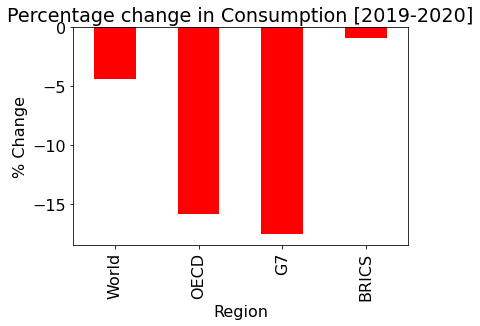

In [139]:
plt.rcParams.update({'font.size': 16})
df_assoc2_per['2019 - 2020 (%) '].plot.bar(color=(df_assoc2_per['2019 - 2020 (%) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Consumption [2019-2020]')
plt.ylabel('% Change')

Text(0, 0.5, '% Change')

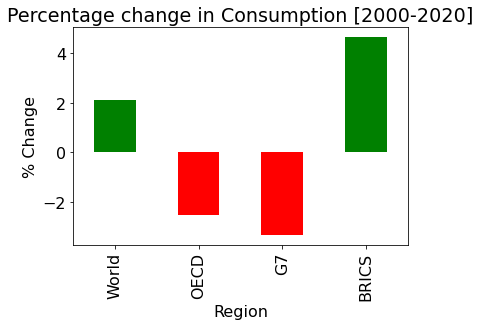

In [140]:
df_assoc2_per['2000 - 2020 (%/year) '].plot.bar(color=(df_assoc2_per['2000 - 2020 (%/year) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Consumption [2000-2020]')
plt.ylabel('% Change')

# For Countries

In [141]:
df_countries

1                 Region       1990.0       1991.0       1992.0       1993.0  \
0                Belgium    16.620146    16.023028    14.235690    13.513577   
1                Czechia    84.788000    79.201000    73.631000    71.871000   
2                 France    31.208986    33.504171    29.658704    23.271134   
3                Germany   448.766260   368.315450   327.824000   305.929502   
4                  Italy    22.485274    21.174694    18.479219    16.098610   
5            Netherlands    12.528968    11.453563    11.435032    11.485031   
6                 Poland   183.638681   183.185591   174.243867   175.808665   
7               Portugal     4.399000     4.619000     4.713000     4.982000   
8                Romania    46.953000    39.661000    43.853530    44.965304   
9                  Spain    47.563000    47.720000    47.222000    44.527000   
10                Sweden     4.878000     4.906000     4.577000     4.654000   
11                Norway     1.277000     1.156000     1.159000     1.239000   
12                Turkey    54.451000    57.877000    59.828000    54.862000   
13                   CIS   658.672000   616.165000   580.928000   506.880000   
14            Kazakhstan    90.361000    89.870000    90.809000    83.019000   
15                Russia   388.194000   365.580000   341.700000   291.703000   
16               Ukraine   149.853000   132.574000   129.105000   116.648000   
17            Uzbekistan     8.940000     9.290000     6.712000     5.193000   
18               America   902.823345   902.535368   912.977108   943.235776   
19                Canada    49.373000    51.486000    53.182000    50.198000   
20         United States   819.284000   815.864000   825.695000   856.313000   
21             Argentina     1.304016     1.039820     0.873526     1.046000   
22                Brazil    15.374000    17.757000    17.023000    17.216000   
23                 Chile     3.741330     2.976548     2.649448     2.672776   
24              Colombia     5.055000     5.210000     5.315000     5.922000   
25                Mexico     7.496000     7.402000     7.349135     8.910000   
26             Venezuela     0.646000     0.000000     0.005000     0.039000   
27                 China  1004.808980  1050.176724  1090.394176  1152.136287   
28                 India   218.234740   236.717623   251.135081   265.246647   
29             Indonesia     7.320000     8.101000     8.329000     8.297000   
30                 Japan   121.755022   122.381298   121.501939   124.215719   
31              Malaysia     2.104000     2.478000     2.602000     2.175000   
32           South Korea    44.776000    43.257000    40.144000    42.068000   
33                Taiwan    17.364769    19.035774    21.924820    23.904375   
34              Thailand    12.780000    15.063000    16.079000    16.822000   
35               Pacific    96.446124   100.270563   103.272722   101.400688   
36           New Zealand     2.322124     2.280563     2.532722     2.453688   
37               Algeria     0.940000     1.171000     1.056000     1.015000   
38                 Egypt     1.199000     1.307000     1.343000     1.614000   
39               Nigeria     0.075000     0.073000     0.052000     0.008000   
40          South Africa   134.175000   131.351000   129.694000   133.679000   
41                  Iran     1.061000     1.512000     1.331000     1.645000   
42          Saudi Arabia     0.000000     0.000000     0.000000     0.000000   
43  United Arab Emirates     0.000000     0.000000     0.000000     0.000000   

1        1994.0       1995.0       1996.0       1997.0       1998.0  \
0     14.472836    13.796649    13.125451    12.190577    12.144000   
1     66.895000    65.807000    65.873000    64.531000    59.083000   
2     23.037458    24.849950    25.417408    23.170766    27.108470   
3    289.426000   274.485000   272.610000   260.474000   247.647000   
4     16.804003    17.950095    16.545987   

In [142]:
df_countries2 = df_countries.copy()
df_countries2

1                 Region       1990.0       1991.0       1992.0       1993.0  \
0                Belgium    16.620146    16.023028    14.235690    13.513577   
1                Czechia    84.788000    79.201000    73.631000    71.871000   
2                 France    31.208986    33.504171    29.658704    23.271134   
3                Germany   448.766260   368.315450   327.824000   305.929502   
4                  Italy    22.485274    21.174694    18.479219    16.098610   
5            Netherlands    12.528968    11.453563    11.435032    11.485031   
6                 Poland   183.638681   183.185591   174.243867   175.808665   
7               Portugal     4.399000     4.619000     4.713000     4.982000   
8                Romania    46.953000    39.661000    43.853530    44.965304   
9                  Spain    47.563000    47.720000    47.222000    44.527000   
10                Sweden     4.878000     4.906000     4.577000     4.654000   
11                Norway     1.277000     1.156000     1.159000     1.239000   
12                Turkey    54.451000    57.877000    59.828000    54.862000   
13                   CIS   658.672000   616.165000   580.928000   506.880000   
14            Kazakhstan    90.361000    89.870000    90.809000    83.019000   
15                Russia   388.194000   365.580000   341.700000   291.703000   
16               Ukraine   149.853000   132.574000   129.105000   116.648000   
17            Uzbekistan     8.940000     9.290000     6.712000     5.193000   
18               America   902.823345   902.535368   912.977108   943.235776   
19                Canada    49.373000    51.486000    53.182000    50.198000   
20         United States   819.284000   815.864000   825.695000   856.313000   
21             Argentina     1.304016     1.039820     0.873526     1.046000   
22                Brazil    15.374000    17.757000    17.023000    17.216000   
23                 Chile     3.741330     2.976548     2.649448     2.672776   
24              Colombia     5.055000     5.210000     5.315000     5.922000   
25                Mexico     7.496000     7.402000     7.349135     8.910000   
26             Venezuela     0.646000     0.000000     0.005000     0.039000   
27                 China  1004.808980  1050.176724  1090.394176  1152.136287   
28                 India   218.234740   236.717623   251.135081   265.246647   
29             Indonesia     7.320000     8.101000     8.329000     8.297000   
30                 Japan   121.755022   122.381298   121.501939   124.215719   
31              Malaysia     2.104000     2.478000     2.602000     2.175000   
32           South Korea    44.776000    43.257000    40.144000    42.068000   
33                Taiwan    17.364769    19.035774    21.924820    23.904375   
34              Thailand    12.780000    15.063000    16.079000    16.822000   
35               Pacific    96.446124   100.270563   103.272722   101.400688   
36           New Zealand     2.322124     2.280563     2.532722     2.453688   
37               Algeria     0.940000     1.171000     1.056000     1.015000   
38                 Egypt     1.199000     1.307000     1.343000     1.614000   
39               Nigeria     0.075000     0.073000     0.052000     0.008000   
40          South Africa   134.175000   131.351000   129.694000   133.679000   
41                  Iran     1.061000     1.512000     1.331000     1.645000   
42          Saudi Arabia     0.000000     0.000000     0.000000     0.000000   
43  United Arab Emirates     0.000000     0.000000     0.000000     0.000000   

1        1994.0       1995.0       1996.0       1997.0       1998.0  \
0     14.472836    13.796649    13.125451    12.190577    12.144000   
1     66.895000    65.807000    65.873000    64.531000    59.083000   
2     23.037458    24.849950    25.417408    23.170766    27.108470   
3    289.426000   274.485000   272.610000   260.474000   247.647000   
4     16.804003    17.950095    16.545987   

In [143]:
df_countries2.set_index('Region', inplace=True)
df_countries2

1                          1990.0       1991.0       1992.0       1993.0  \
Region                                                                     
Belgium                 16.620146    16.023028    14.235690    13.513577   
Czechia                 84.788000    79.201000    73.631000    71.871000   
France                  31.208986    33.504171    29.658704    23.271134   
Germany                448.766260   368.315450   327.824000   305.929502   
Italy                   22.485274    21.174694    18.479219    16.098610   
Netherlands             12.528968    11.453563    11.435032    11.485031   
Poland                 183.638681   183.185591   174.243867   175.808665   
Portugal                 4.399000     4.619000     4.713000     4.982000   
Romania                 46.953000    39.661000    43.853530    44.965304   
Spain                   47.563000    47.720000    47.222000    44.527000   
Sweden                   4.878000     4.906000     4.577000     4.654000   
Norway                   1.277000     1.156000     1.159000     1.239000   
Turkey                  54.451000    57.877000    59.828000    54.862000   
CIS                    658.672000   616.165000   580.928000   506.880000   
Kazakhstan              90.361000    89.870000    90.809000    83.019000   
Russia                 388.194000   365.580000   341.700000   291.703000   
Ukraine                149.853000   132.574000   129.105000   116.648000   
Uzbekistan               8.940000     9.290000     6.712000     5.193000   
America                902.823345   902.535368   912.977108   943.235776   
Canada                  49.373000    51.486000    53.182000    50.198000   
United States          819.284000   815.864000   825.695000   856.313000   
Argentina                1.304016     1.039820     0.873526     1.046000   
Brazil                  15.374000    17.757000    17.023000    17.216000   
Chile                    3.741330     2.976548     2.649448     2.672776   
Colombia                 5.055000     5.210000     5.315000     5.922000   
Mexico                   7.496000     7.402000     7.349135     8.910000   
Venezuela                0.646000     0.000000     0.005000     0.039000   
China                 1004.808980  1050.176724  1090.394176  1152.136287   
India                  218.234740   236.717623   251.135081   265.246647   
Indonesia                7.320000     8.101000     8.329000     8.297000   
Japan                  121.755022   122.381298   121.501939   124.215719   
Malaysia                 2.104000     2.478000     2.602000     2.175000   
South Korea             44.776000    43.257000    40.144000    42.068000   
Taiwan                  17.364769    19.035774    21.924820    23.904375   
Thailand                12.780000    15.063000    16.079000    16.822000   
Pacific                 96.446124   100.270563   103.272722   101.400688   
New Zealand              2.322124     2.280563     2.532722     2.453688   
Algeria                  0.940000     1.171000     1.056000     1.015000   
Egypt                    1.199000     1.307000     1.343000     1.614000   
Nigeria                  0.075000     0.073000     0.052000     0.008000   
South Africa           134.175000   131.351000   129.694000   133.679000   
Iran                     1.061000     1.512000     1.331000     1.645000   
Saudi Arabia             0.000000     0.000000     0.000000     0.000000   
United Arab Emirates     0.000000     0.000000     0.000000     0.000000   

1                          1994.0       1995.0       1996.0       1997.0  \
Region                                                                     
Belgium                 14.472836    13.796649    13.125451    12.190577   
Czechia                 66.895000    65.807000    65.873000    64.531000   
France                  23.037458    24.849950    25.417408    23.170766   
Germany                289.426000   274.485000   272.610000   260.474000   
Italy                   16.804003    17.950095 

In [144]:
plt.rcParams.update({'font.size': 14})

<AxesSubplot:xlabel='1', ylabel='Region'>

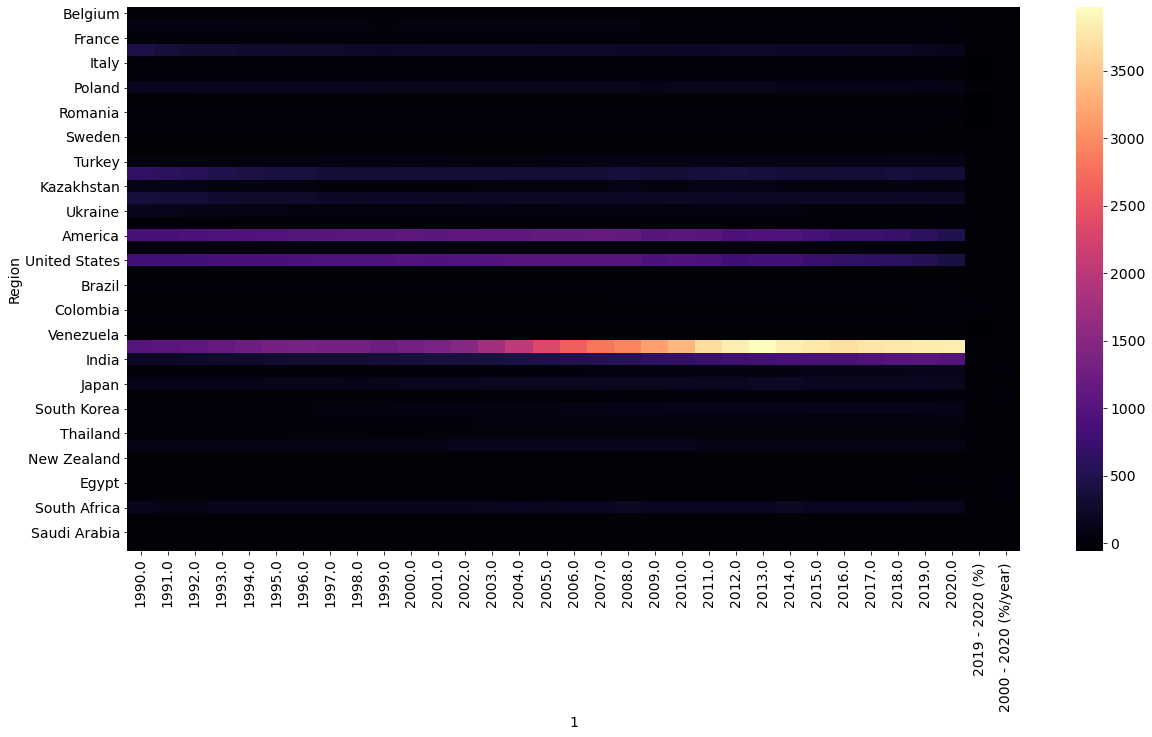

In [145]:
plt.figure(figsize=(20,10))
sns.heatmap(df_countries2, cmap="magma")

In [146]:
df_countries2_T = df_countries2.T
df_countries2_T

Region                   Belgium    Czechia     France     Germany      Italy  \
1                                                                               
1990.0                 16.620146  84.788000  31.208986  448.766260  22.485274   
1991.0                 16.023028  79.201000  33.504171  368.315450  21.174694   
1992.0                 14.235690  73.631000  29.658704  327.824000  18.479219   
1993.0                 13.513577  71.871000  23.271134  305.929502  16.098610   
1994.0                 14.472836  66.895000  23.037458  289.426000  16.804003   
1995.0                 13.796649  65.807000  24.849950  274.485000  17.950095   
1996.0                 13.125451  65.873000  25.417408  272.610000  16.545987   
1997.0                 12.190577  64.531000  23.170766  260.474000  16.741259   
1998.0                 12.144000  59.083000  27.108470  247.647000  17.462187   
1999.0                 10.545000  51.791000  24.409051  236.446191  17.444032   
2000.0                 11.614000  61.507137  23.548989  244.264095  18.581100   
2001.0                 10.974000  59.517838  20.438969  249.134000  19.855219   
2002.0                  9.529000  57.845000  21.052000  252.782000  20.635813   
2003.0                  9.204000  59.344000  21.142154  254.552210  22.369032   
2004.0                  8.526720  58.218000  20.424287  253.412533  25.215530   
2005.0                  7.885000  56.924000  22.179513  243.744418  24.945000   
2006.0                  7.693969  57.231000  20.579271  245.355728  25.217000   
2007.0                  7.023000  58.508000  21.556596  253.782793  25.378000   
2008.0                  6.901000  55.061000  20.046479  240.368988  24.679000   
2009.0                  4.505000  51.930000  16.648165  225.850231  19.681000   
2010.0                  5.710895  52.129746  17.658725  232.394452  21.600000   
2011.0                  5.372575  52.836070  16.260360  236.335764  24.172000   
2012.0                  5.103494  50.496805  17.958101  247.287149  24.950000   
2013.0                  5.445395  47.579656  18.817869  247.164526  21.632000   
2014.0                  5.202691  46.282119  14.283219  239.285846  21.292000   
2015.0                  5.062395  46.075410  13.804400  239.304455  19.974000   
2016.0                  4.706761  46.126702  13.063806  231.402121  17.755000   
2017.0                  4.566685  45.888747  14.819003  222.240000  15.536615   
2018.0                  4.561951  45.474094  13.009222  215.711000  14.283772   
2019.0                  4.481862  41.341608  10.203106  168.314808  10.022902   
2020.0                  3.612398  33.078802   8.256662  138.406729   7.422522   
2019 - 2020 (%)       -19.399616 -19.986658 -19.076977  -17.769131 -25.944381   
2000 - 2020 (%/year)   -5.671986  -3.053706  -5.105375   -2.800310  -4.484467   

Region                 Netherlands      Poland   Portugal    Romania  \
1                                                                      
1990.0                   12.528968  183.638681   4.399000  46.953000   
1991.0                   11.453563  183.185591   4.619000  39.661000   
1992.0                   11.435032  174.243867   4.713000  43.853530   
1993.0                   11.485031  175.808665   4.982000  44.965304   
1994.0                   12.524828  170.723086   5.236000  43.845024   
1995.0                   13.865000  168.449324   5.672000  45.010866   
1996.0                   13.520969  171.256003   5.438000  45.335214   
1997.0                   13.561031  164.616253   5.464000  37.801024   
1998.0                   13.900000  151.927225   4.985000  31.361964   
1999.0                   11.891969  146.273402   6.083000  27.957000   
2000.0                   12.649000  141.293000   6.102000  32.006717   
2001.0                   13.439032  140.620128   5.157000  34.422833   
2002.0                   13.392968  136.548464   5.689000  34.812530   
2003.0                   13.723000  140.677984   5.364000  37.954565   
2004.0      

In [147]:
df_countries2_T.drop(df_countries2_T.tail(2).index,inplace=True)
df_countries2_T

Region    Belgium    Czechia     France     Germany      Italy  Netherlands  \
1                                                                             
1990.0  16.620146  84.788000  31.208986  448.766260  22.485274    12.528968   
1991.0  16.023028  79.201000  33.504171  368.315450  21.174694    11.453563   
1992.0  14.235690  73.631000  29.658704  327.824000  18.479219    11.435032   
1993.0  13.513577  71.871000  23.271134  305.929502  16.098610    11.485031   
1994.0  14.472836  66.895000  23.037458  289.426000  16.804003    12.524828   
1995.0  13.796649  65.807000  24.849950  274.485000  17.950095    13.865000   
1996.0  13.125451  65.873000  25.417408  272.610000  16.545987    13.520969   
1997.0  12.190577  64.531000  23.170766  260.474000  16.741259    13.561031   
1998.0  12.144000  59.083000  27.108470  247.647000  17.462187    13.900000   
1999.0  10.545000  51.791000  24.409051  236.446191  17.444032    11.891969   
2000.0  11.614000  61.507137  23.548989  244.264095  18.581100    12.649000   
2001.0  10.974000  59.517838  20.438969  249.134000  19.855219    13.439032   
2002.0   9.529000  57.845000  21.052000  252.782000  20.635813    13.392968   
2003.0   9.204000  59.344000  21.142154  254.552210  22.369032    13.723000   
2004.0   8.526720  58.218000  20.424287  253.412533  25.215530    13.501032   
2005.0   7.885000  56.924000  22.179513  243.744418  24.945000    12.859000   
2006.0   7.693969  57.231000  20.579271  245.355728  25.217000    12.401000   
2007.0   7.023000  58.508000  21.556596  253.782793  25.378000    13.494969   
2008.0   6.901000  55.061000  20.046479  240.368988  24.679000    12.813000   
2009.0   4.505000  51.930000  16.648165  225.850231  19.681000    12.054000   
2010.0   5.710895  52.129746  17.658725  232.394452  21.600000    12.097031   
2011.0   5.372575  52.836070  16.260360  236.335764  24.172000    11.938000   
2012.0   5.103494  50.496805  17.958101  247.287149  24.950000    13.127968   
2013.0   5.445395  47.579656  18.817869  247.164526  21.632000    13.105063   
2014.0   5.202691  46.282119  14.283219  239.285846  21.292000    14.616000   
2015.0   5.062395  46.075410  13.804400  239.304455  19.974000    17.875032   
2016.0   4.706761  46.126702  13.063806  231.402121  17.755000    16.424000   
2017.0   4.566685  45.888747  14.819003  222.240000  15.536615    14.717435   
2018.0   4.561951  45.474094  13.009222  215.711000  14.283772    13.074749   
2019.0   4.481862  41.341608  10.203106  168.314808  10.022902    10.106433   
2020.0   3.612398  33.078802   8.256662  138.406729   7.422522     6.326573   

Region      Poland  Portugal    Romania      Spain    Sweden    Norway  \
1                                                                        
1990.0  183.638681  4.399000  46.953000  47.563000  4.878000  1.277000   
1991.0  183.185591  4.619000  39.661000  47.720000  4.906000  1.156000   
1992.0  174.243867  4.713000  43.853530  47.222000  4.577000  1.159000   
1993.0  175.808665  4.982000  44.965304  44.527000  4.654000  1.239000   
1994.0  170.723086  5.236000  43.845024  43.196000  4.694000  1.403000   
1995.0  168.449324  5.672000  45.010866  43.395000  4.734000  1.523000   
1996.0  171.256003  5.438000  45.335214  37.046000  5.173000  1.513000   
1997.0  164.616253  5.464000  37.801024  40.967000  4.412000  1.504000   
1998.0  151.927225  4.985000  31.361964  39.519000  4.462000  1.639000   
1999.0  146.273402  6.083000  27.957000  43.398000  4.187000  1.554000   
2000.0  141.293000  6.102000  32.006717  45.736000  4.166000  1.571000   
2001.0  140.620128  5.157000  34.422833  41.613000  4.555000  1.401000   
2002.0  136.548464  5.689000  34.812530  45.908000  5.009000  1.210000   
2003.0  140.677984  5.364000  37.954565  42.486632  4.922000  1.176000   
2004.0  139.597000  5.424000  36.202403  44.674000  5.097000  1.347000   
2005.0  137.240921  5.459000  36.440964  43.898000  4.563000  1.153000   
2006.0  140.238031  5.460000  41.425992  38.816000  4.899000

In [148]:
# sns.set_palette("turbo", n_colors=40)

In [149]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

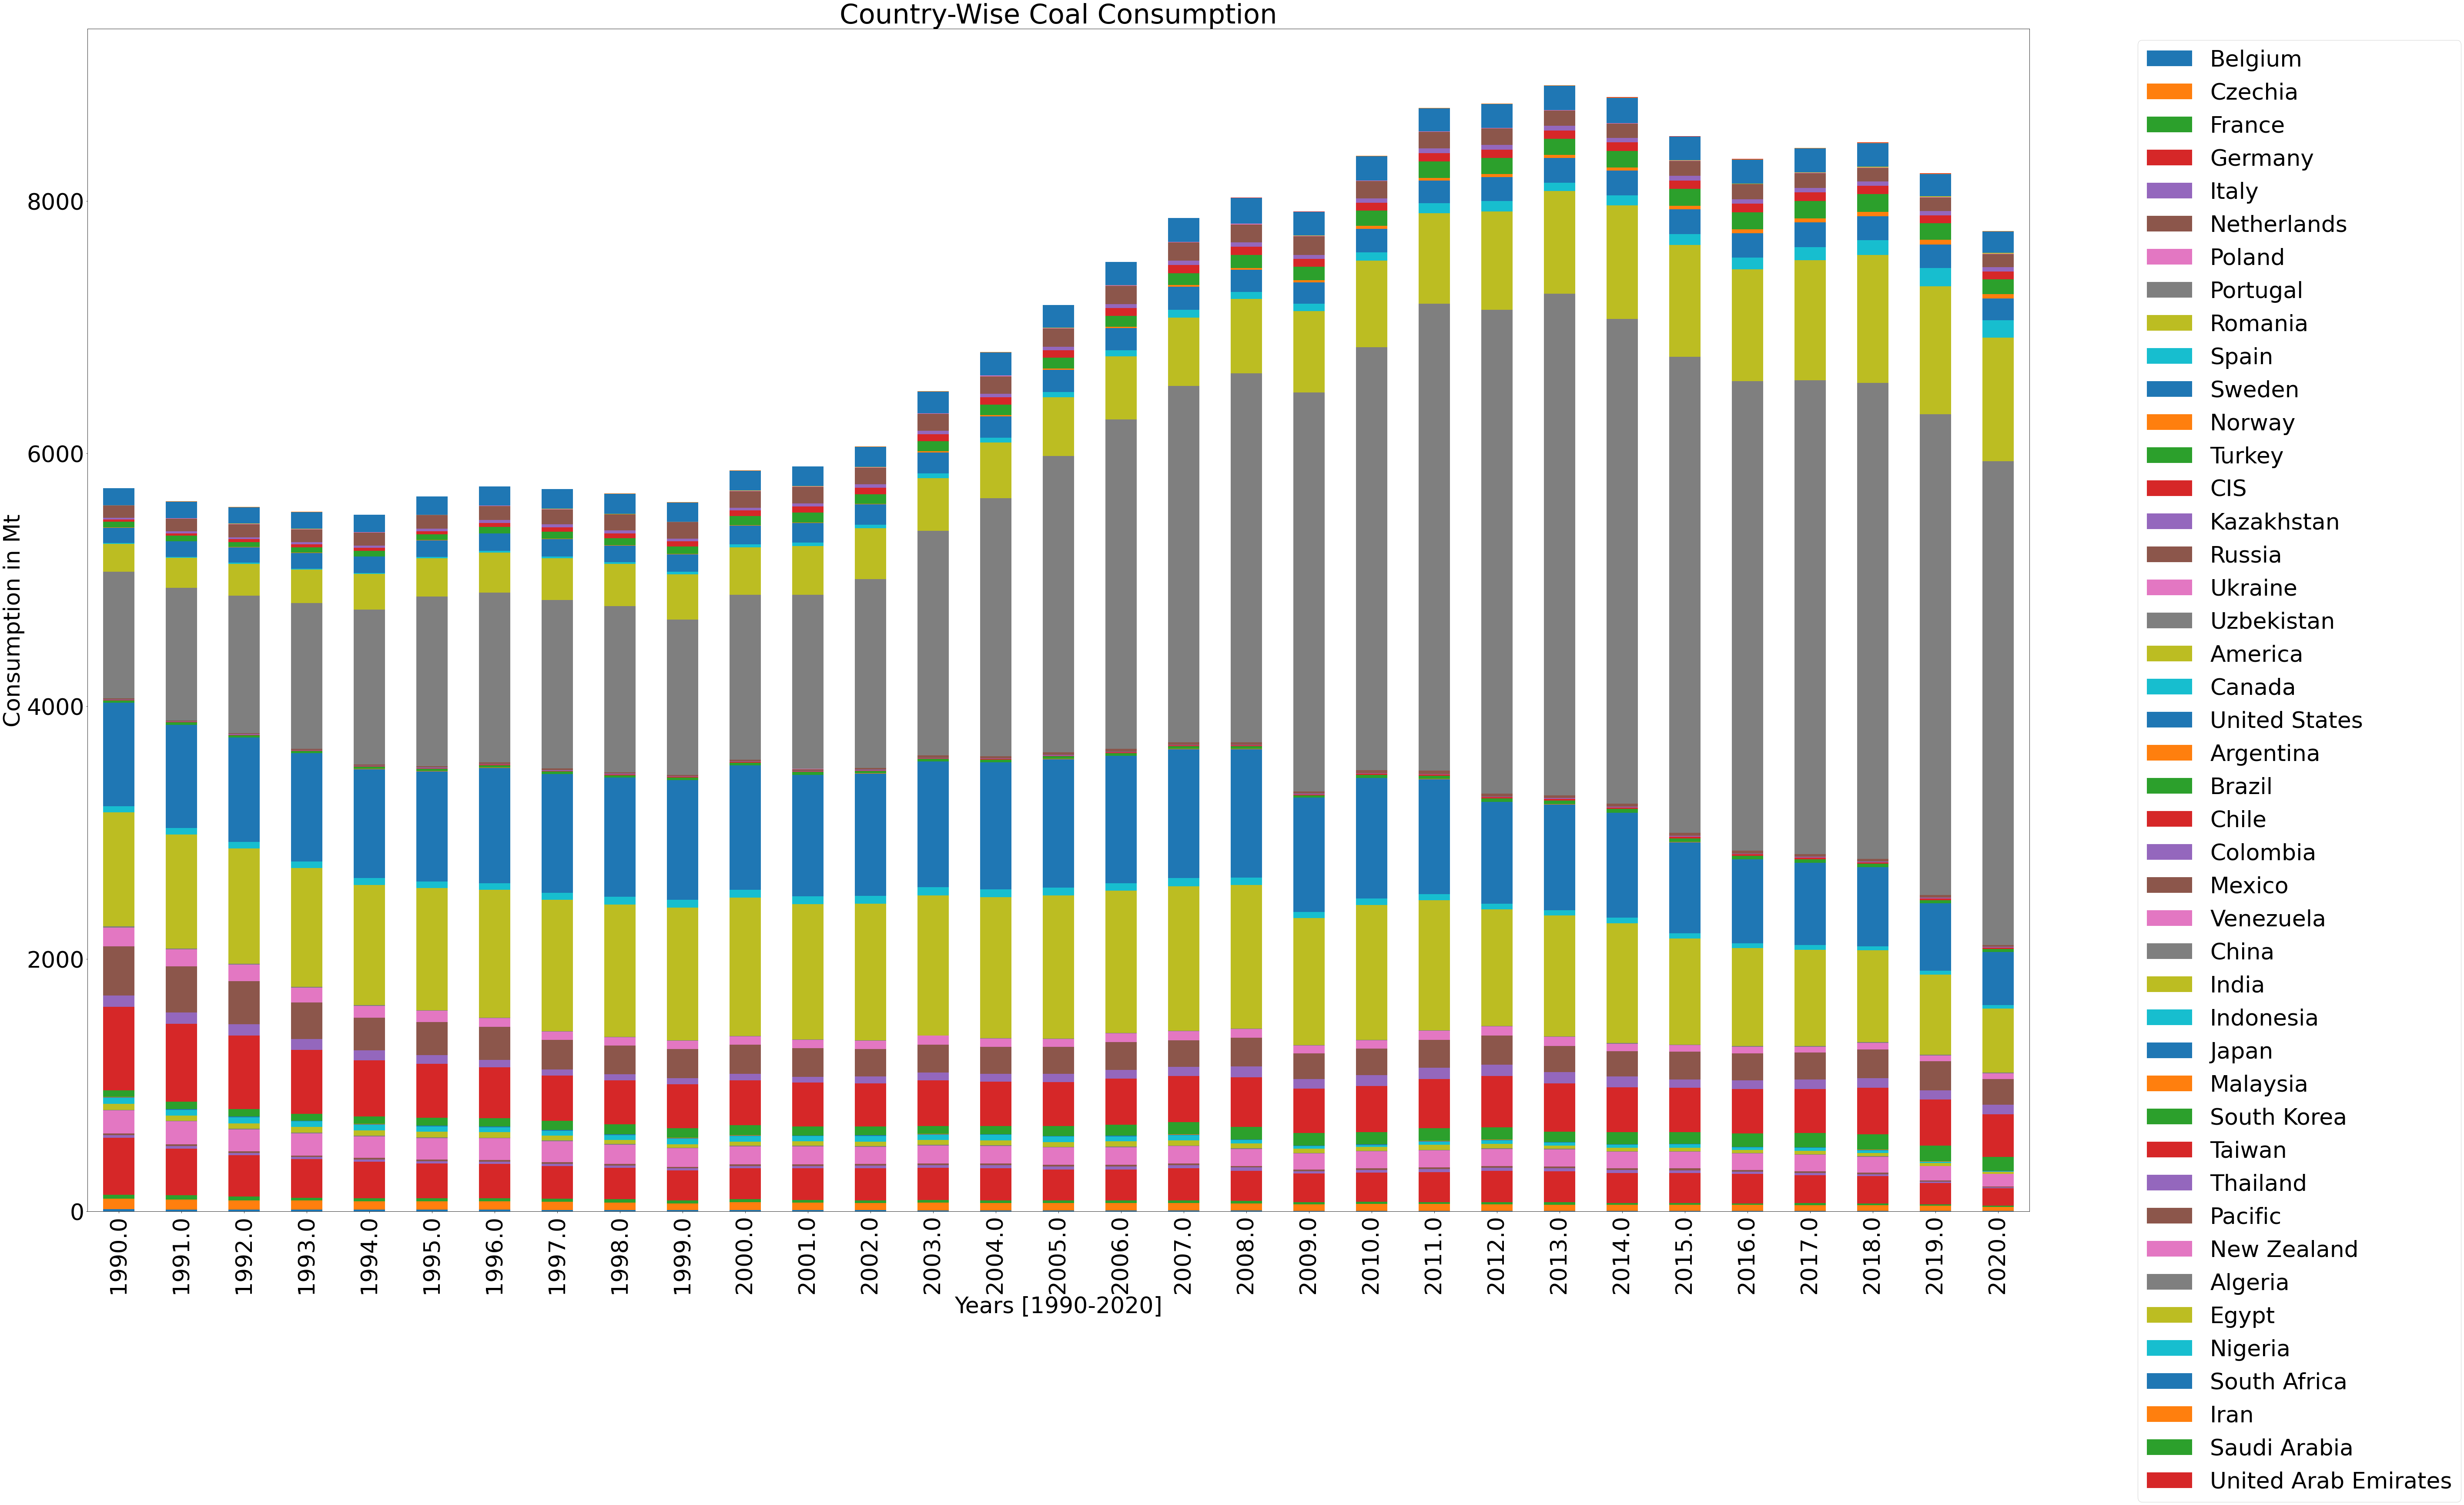

In [150]:
plt.rcParams.update({'font.size': 52})
# my_cmap = plt.get_cmap("viridis")
# y=df_countries2_T.index
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))


# df_countries2_T.plot(kind="bar",stacked=True,figsize=(10,8), color=my_cmap(rescale(y)))
df_countries2_T.plot(kind="bar",stacked=True,figsize=(80,50))
plt.title("Country-Wise Coal Consumption")
plt.xlabel("Years [1990-2020]")
plt.ylabel("Consumption in Mt")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [151]:
corr_countries2_corr = df_countries2_T.corr()
corr_countries2_corr

Region                 Belgium   Czechia    France   Germany     Italy  \
Region                                                                   
Belgium               1.000000  0.922091  0.906782  0.789338  0.030665   
Czechia               0.922091  1.000000  0.923069  0.914541  0.294977   
France                0.906782  0.923069  1.000000  0.830711  0.328252   
Germany               0.789338  0.914541  0.830711  1.000000  0.360168   
Italy                 0.030665  0.294977  0.328252  0.360168  1.000000   
Netherlands          -0.050999  0.024214  0.021519  0.139272  0.391320   
Poland                0.926862  0.941484  0.895227  0.873520  0.165094   
Portugal              0.418200  0.417809  0.490377  0.354110  0.397734   
Romania               0.702771  0.853419  0.738239  0.727660  0.483518   
Spain                 0.823350  0.822052  0.853324  0.685963  0.394396   
Sweden                0.716748  0.778714  0.780719  0.588260  0.501663   
Norway                0.590184  0.315612  0.433571  0.153295 -0.259363   
Turkey               -0.884098 -0.844127 -0.838488 -0.731808 -0.252809   
CIS                   0.681987  0.782684  0.674102  0.873817  0.082601   
Kazakhstan           -0.168949  0.047306 -0.082592  0.260049  0.156373   
Russia                0.774513  0.823600  0.733026  0.875592 -0.006547   
Ukraine               0.786492  0.888147  0.802337  0.924183  0.235099   
Uzbekistan            0.187895  0.200618  0.103719  0.407670 -0.351586   
America               0.304362  0.418025  0.507684  0.262622  0.763878   
Canada                0.526634  0.560143  0.659158  0.341523  0.578428   
United States         0.363731  0.471616  0.556559  0.307545  0.744469   
Argentina            -0.459794 -0.300813 -0.325515 -0.091402  0.350415   
Brazil               -0.806276 -0.787686 -0.762879 -0.588658 -0.004212   
Chile                -0.834758 -0.832895 -0.813518 -0.603597 -0.270270   
Colombia             -0.173809 -0.323032 -0.434740 -0.233085 -0.711569   
Mexico               -0.875566 -0.724015 -0.706450 -0.589367  0.334546   
Venezuela            -0.172291  0.050596 -0.034409  0.302893  0.442870   
China                -0.941725 -0.839265 -0.861964 -0.633943 -0.042656   
India                -0.918349 -0.890032 -0.913957 -0.694641 -0.264194   
Indonesia            -0.887563 -0.868442 -0.909799 -0.714439 -0.332510   
Japan                -0.942471 -0.821847 -0.819622 -0.647635  0.161802   
Malaysia             -0.894491 -0.850473 -0.893776 -0.654101 -0.278469   
South Korea          -0.950406 -0.852516 -0.872758 -0.649195 -0.020234   
Taiwan               -0.961042 -0.857873 -0.831314 -0.740077  0.158368   
Thailand             -0.959397 -0.871515 -0.849336 -0.744993  0.064807   
Pacific              -0.406684 -0.260660 -0.139473 -0.343982  0.630885   
New Zealand          -0.476746 -0.285288 -0.273980 -0.274654  0.586880   
Algeria               0.569981  0.622944  0.652509  0.429122  0.390781   
Egypt                -0.386867 -0.533154 -0.600976 -0.528198 -0.768599   
Nigeria              -0.143062 -0.032044 -0.088478  0.278744 -0.080523   
South Africa         -0.909586 -0.769430 -0.729608 -0.632242  0.277802   
Iran                 -0.826304 -0.860663 -0.841223 -0.818211 -0.283824   
Saudi Arabia               NaN       NaN       NaN       NaN       NaN   
United Arab Emirates -0.761347 -0.765618 -0.789574 -0.513492 -0.322624   

Region                Netherlands    Poland  Portugal   Romania     Spain  \
Region                                                                      
Belgium                 -0.050999  0.926862  0.418200  0.702771  0.823350   
Czechia                  0.024214  0.941484  0.417809  0.853419  0.822052   
France                   0.021519  0.895227  0.490377  0.738239  0.853324   
Germany                  0.139272  0.873520  0.354110  0.727660  0.685963   
Italy                    0.391320  0.165094  0.397734  0.483518  0.394396   
Netherlands              1.000000  0.084745  0.648111  0

<AxesSubplot:xlabel='Region', ylabel='Region'>

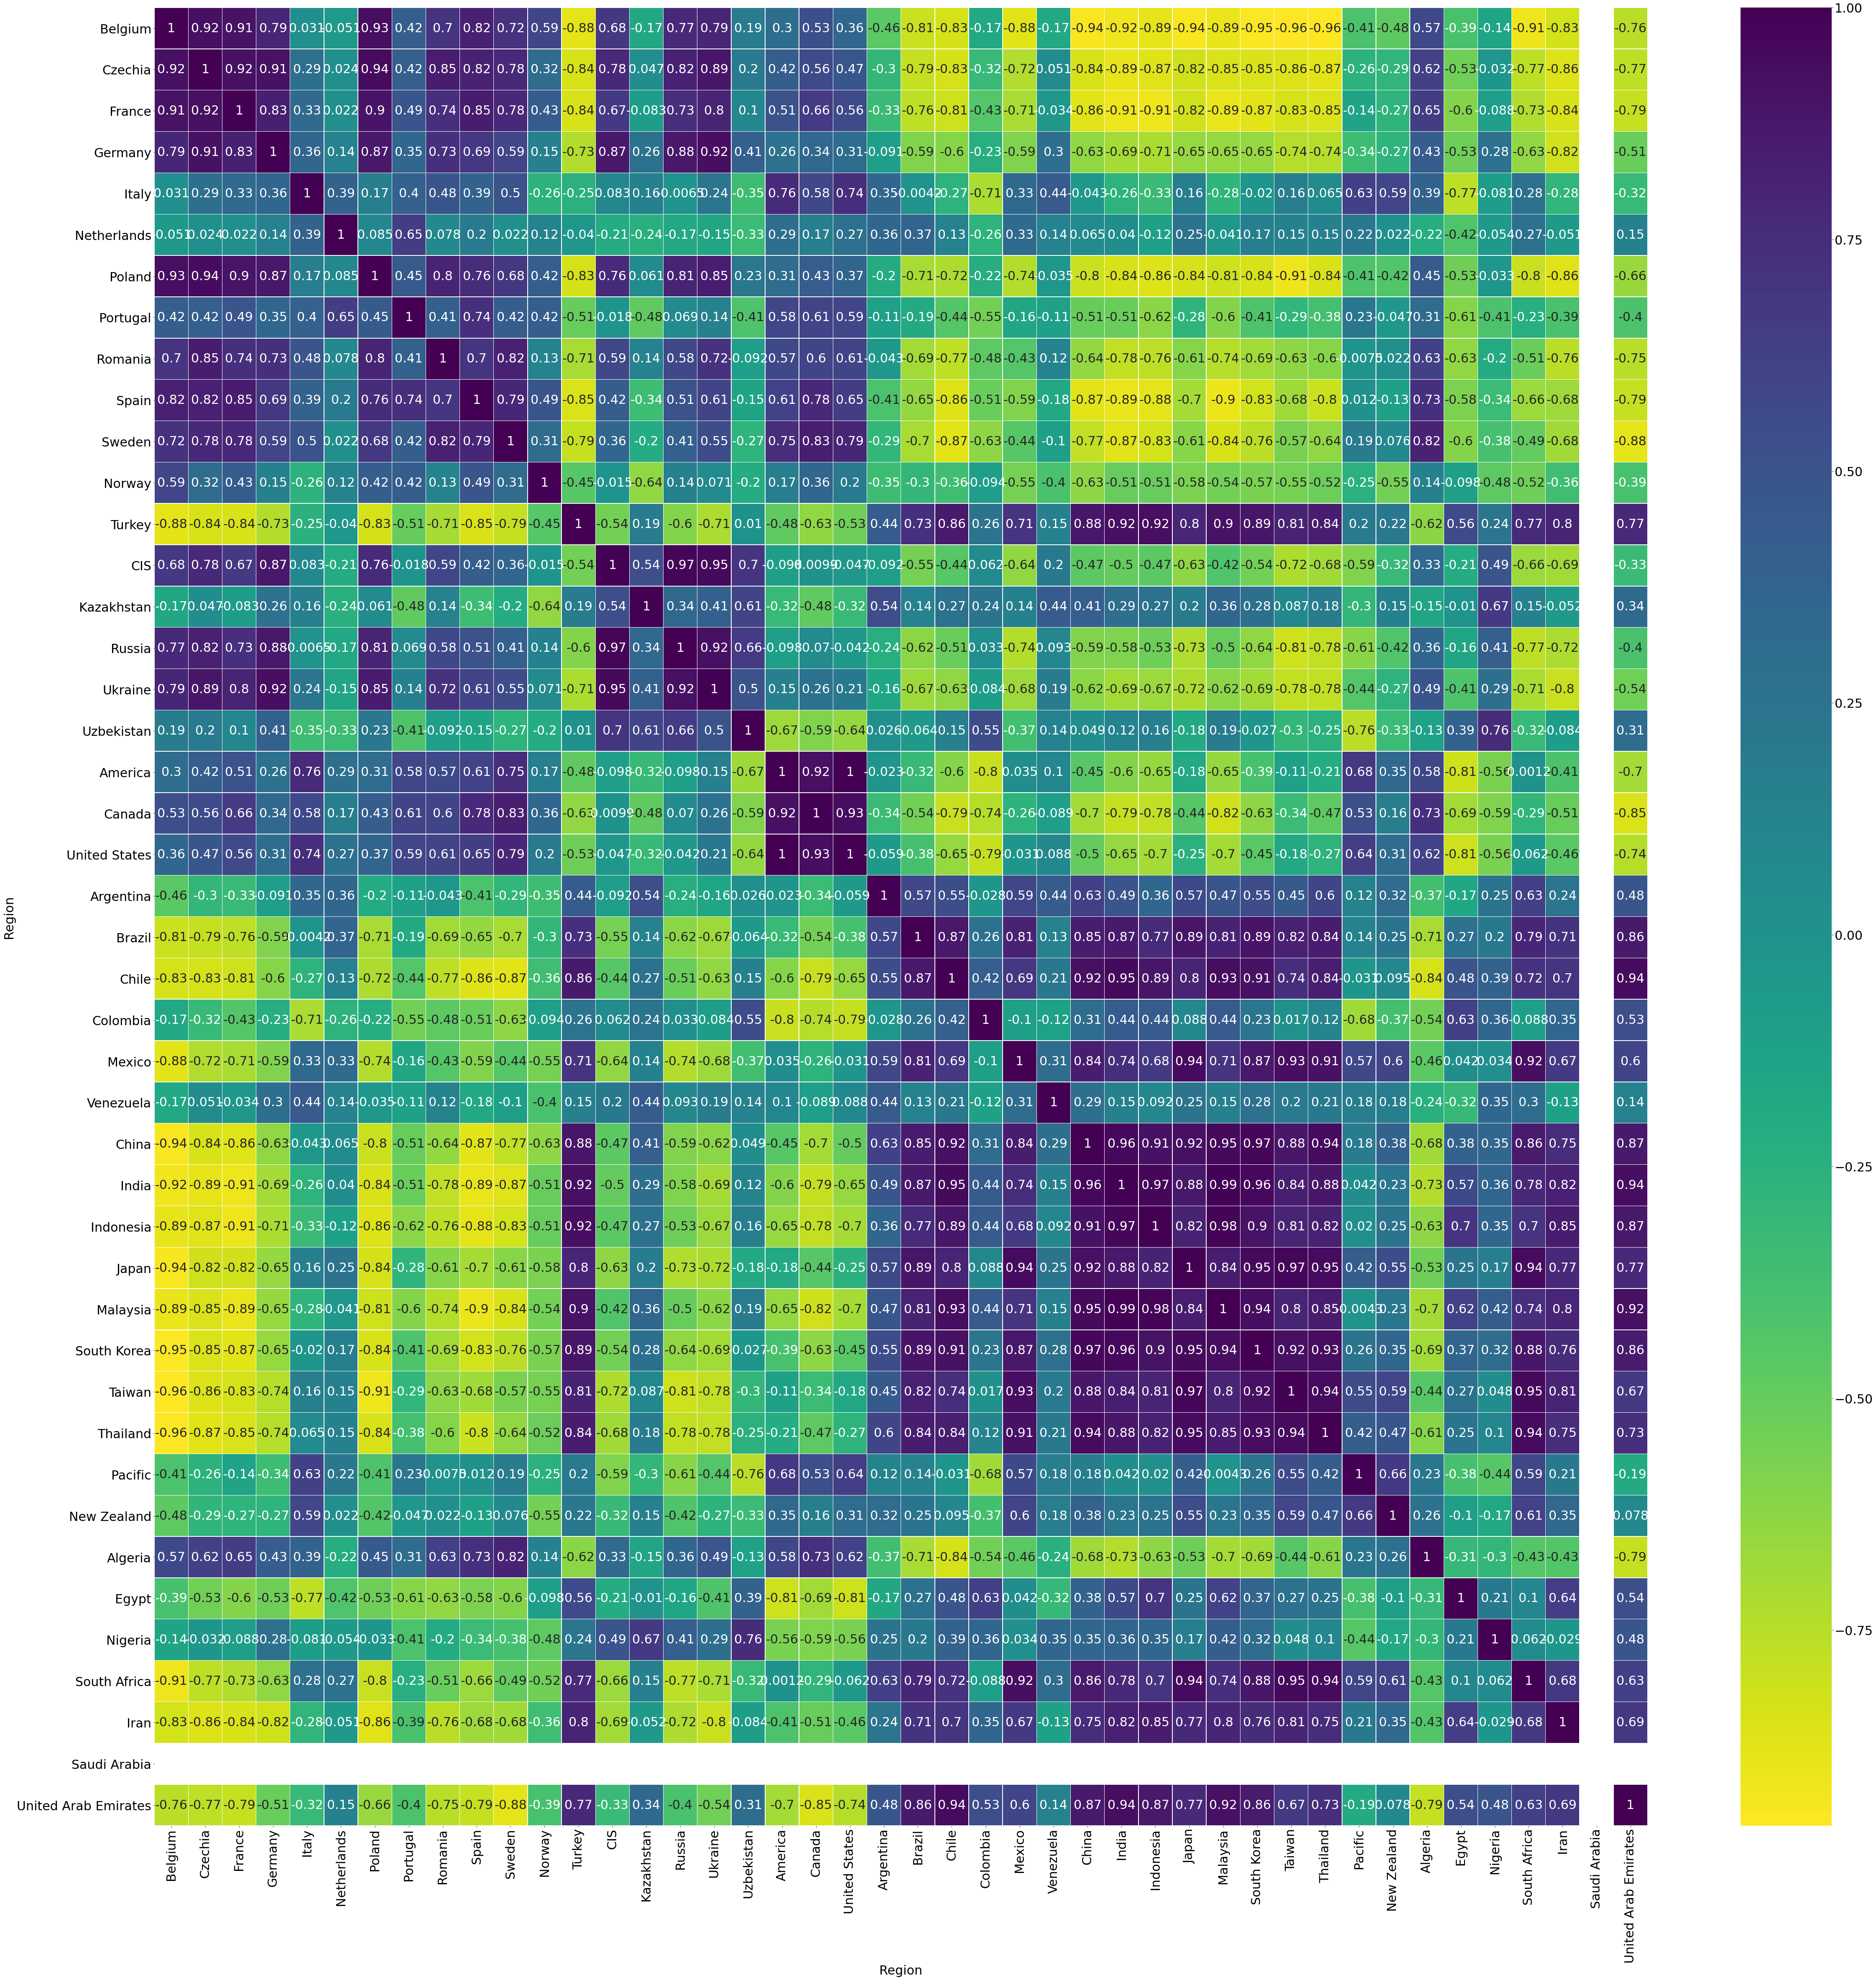

In [152]:
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(80, 80))
sns.heatmap(corr_countries2_corr, cmap='viridis_r', linewidths=0.4, annot=True)

In [153]:
df_countries2_per = df_countries2.copy()
df_countries2_per

1                          1990.0       1991.0       1992.0       1993.0  \
Region                                                                     
Belgium                 16.620146    16.023028    14.235690    13.513577   
Czechia                 84.788000    79.201000    73.631000    71.871000   
France                  31.208986    33.504171    29.658704    23.271134   
Germany                448.766260   368.315450   327.824000   305.929502   
Italy                   22.485274    21.174694    18.479219    16.098610   
Netherlands             12.528968    11.453563    11.435032    11.485031   
Poland                 183.638681   183.185591   174.243867   175.808665   
Portugal                 4.399000     4.619000     4.713000     4.982000   
Romania                 46.953000    39.661000    43.853530    44.965304   
Spain                   47.563000    47.720000    47.222000    44.527000   
Sweden                   4.878000     4.906000     4.577000     4.654000   
Norway                   1.277000     1.156000     1.159000     1.239000   
Turkey                  54.451000    57.877000    59.828000    54.862000   
CIS                    658.672000   616.165000   580.928000   506.880000   
Kazakhstan              90.361000    89.870000    90.809000    83.019000   
Russia                 388.194000   365.580000   341.700000   291.703000   
Ukraine                149.853000   132.574000   129.105000   116.648000   
Uzbekistan               8.940000     9.290000     6.712000     5.193000   
America                902.823345   902.535368   912.977108   943.235776   
Canada                  49.373000    51.486000    53.182000    50.198000   
United States          819.284000   815.864000   825.695000   856.313000   
Argentina                1.304016     1.039820     0.873526     1.046000   
Brazil                  15.374000    17.757000    17.023000    17.216000   
Chile                    3.741330     2.976548     2.649448     2.672776   
Colombia                 5.055000     5.210000     5.315000     5.922000   
Mexico                   7.496000     7.402000     7.349135     8.910000   
Venezuela                0.646000     0.000000     0.005000     0.039000   
China                 1004.808980  1050.176724  1090.394176  1152.136287   
India                  218.234740   236.717623   251.135081   265.246647   
Indonesia                7.320000     8.101000     8.329000     8.297000   
Japan                  121.755022   122.381298   121.501939   124.215719   
Malaysia                 2.104000     2.478000     2.602000     2.175000   
South Korea             44.776000    43.257000    40.144000    42.068000   
Taiwan                  17.364769    19.035774    21.924820    23.904375   
Thailand                12.780000    15.063000    16.079000    16.822000   
Pacific                 96.446124   100.270563   103.272722   101.400688   
New Zealand              2.322124     2.280563     2.532722     2.453688   
Algeria                  0.940000     1.171000     1.056000     1.015000   
Egypt                    1.199000     1.307000     1.343000     1.614000   
Nigeria                  0.075000     0.073000     0.052000     0.008000   
South Africa           134.175000   131.351000   129.694000   133.679000   
Iran                     1.061000     1.512000     1.331000     1.645000   
Saudi Arabia             0.000000     0.000000     0.000000     0.000000   
United Arab Emirates     0.000000     0.000000     0.000000     0.000000   

1                          1994.0       1995.0       1996.0       1997.0  \
Region                                                                     
Belgium                 14.472836    13.796649    13.125451    12.190577   
Czechia                 66.895000    65.807000    65.873000    64.531000   
France                  23.037458    24.849950    25.417408    23.170766   
Germany                289.426000   274.485000   272.610000   260.474000   
Italy                   16.804003    17.950095 

In [154]:
df_countries2_per = df_countries2_per.drop(df_countries2_per.columns[:-2], axis=1)

In [155]:
df_countries2_per

1                     2019 - 2020 (%)   2000 - 2020 (%/year) 
Region                                                       
Belgium                     -19.399616              -5.671986
Czechia                     -19.986658              -3.053706
France                      -19.076977              -5.105375
Germany                     -17.769131              -2.800310
Italy                       -25.944381              -4.484467
Netherlands                 -37.400531              -3.404784
Poland                      -11.546190              -1.724932
Portugal                    -54.589593              -8.828367
Romania                     -29.041288              -3.178685
Spain                       -56.467766             -11.665732
Sweden                      -12.198795              -2.165774
Norway                        0.801377              -1.517978
Turkey                      -12.611354               1.521995
CIS                          -7.288797              -0.264676
Kazakhstan                    1.812041               2.147083
Russia                      -10.600112              -0.620949
Ukraine                      -6.919615              -2.200647
Uzbekistan                    1.975622               3.876653
America                     -19.928841              -3.759079
Canada                       -9.056252              -4.042334
United States               -21.276322              -4.170603
Argentina                   -11.028604               0.423232
Brazil                      -11.550304               0.116373
Chile                        -3.776755               4.720177
Colombia                     14.052428               2.314353
Mexico                      -34.194178               0.118032
Venezuela                   -34.351370             -10.577741
China                         0.600000               5.534640
India                        -3.704621               4.890804
Indonesia                    -3.710575               9.029532
Japan                        -8.035268               0.707053
Malaysia                      3.304939              11.895690
South Korea                 -12.377544               2.373720
Taiwan                       -1.996246               1.616820
Thailand                      3.131663               2.367869
Pacific                      -3.764841              -1.226224
New Zealand                  -5.343656               1.238744
Algeria                      -6.615709              -2.930191
Egypt                         0.586627               7.776861
Nigeria                      -4.800186              14.218478
South Africa                 -4.172577               0.356818
Iran                          3.378058               1.935262
Saudi Arabia                  0.000000               0.000000
United Arab Emirates         -9.512891               0.000000

Text(0, 0.5, '% Change')

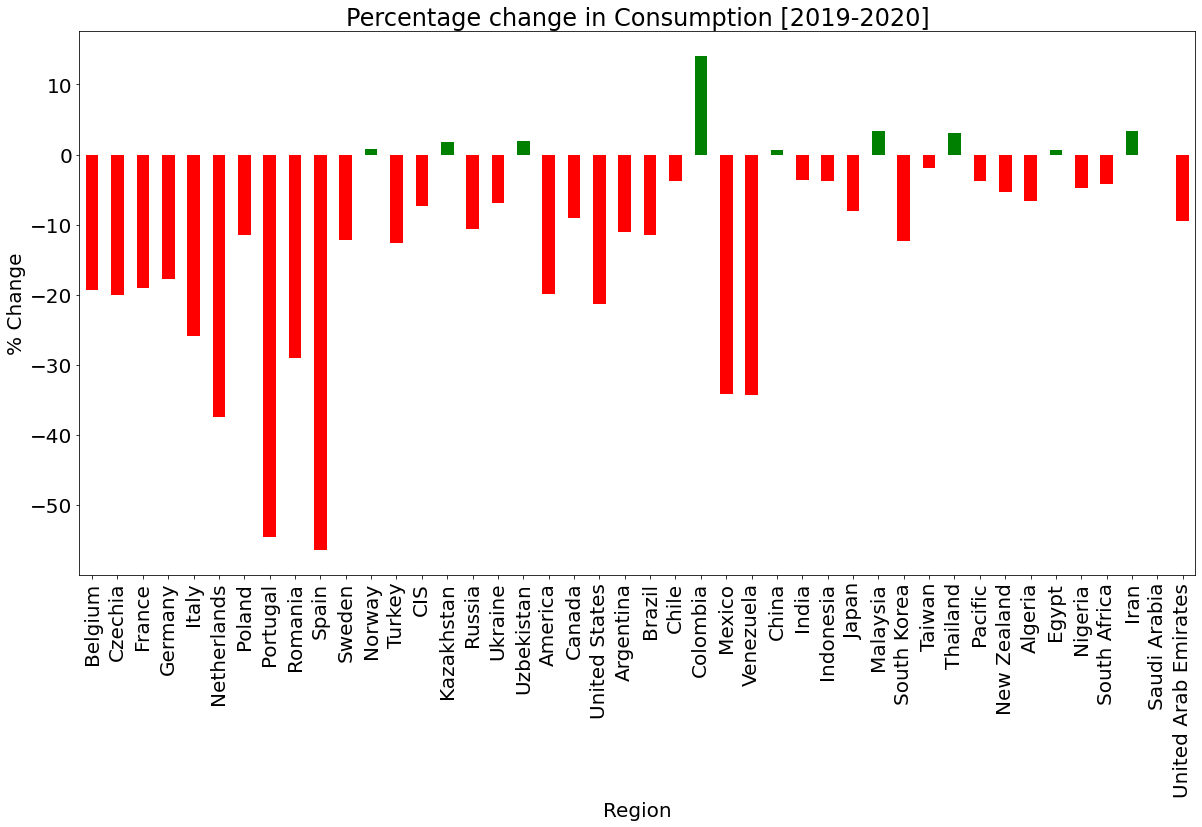

In [156]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,10))
df_countries2_per['2019 - 2020 (%) '].plot.bar(color=(df_countries2_per['2019 - 2020 (%) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Consumption [2019-2020]')
plt.ylabel('% Change')

Text(0, 0.5, '% Change')

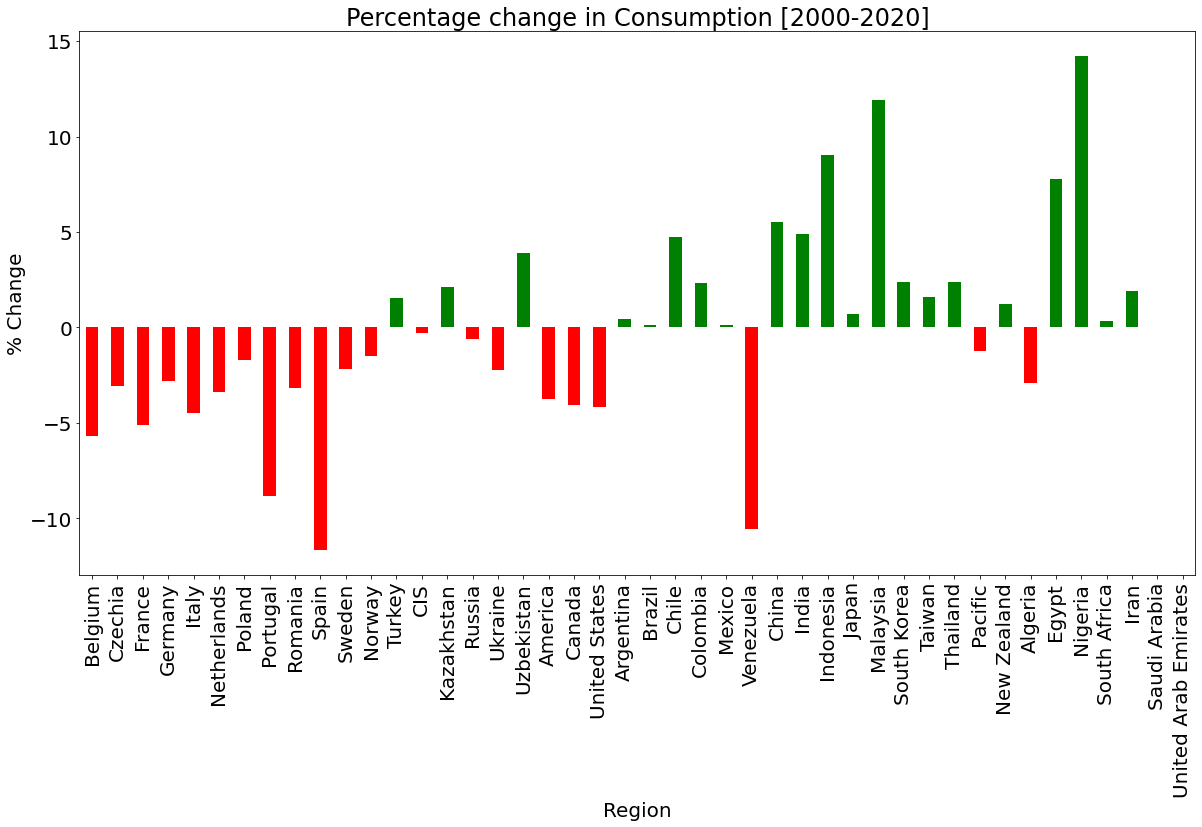

In [157]:
plt.figure(figsize=(20,10))
df_countries2_per['2000 - 2020 (%/year) '].plot.bar(color=(df_countries2_per['2000 - 2020 (%/year) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Consumption [2000-2020]')
plt.ylabel('% Change')